# Primera Parte

BDT2-1 - BDT2-10 https://alkemy-labs.atlassian.net/browse/BDT2-10
# Recopilación de datos.

Descripción

COMO DS DEVELOPER
QUIERO acceder a la fuente de datos
PARA comenzar con la exploracion de los datos

Criterios de aceptación:
Importar librería pandas y acceder el archivo .csv. Poder ver en sus notebooks el dataframe

Diccionario de variables:
- UniqueID: Identifier for customers
- loan_default (target variable): Payment default in the first EMI* on due date
- disbursed_amount: Amount of Loan disbursed
- asset_cost: Cost of the Asset
- ltv: Loan to Value of the asset
- branch_id: Branch where the loan was disbursed
- supplier_id: Vehicle Dealer where the loan was disbursed
- manufacturer_id: Vehicle manufacturer(Hero, Honda, TVS etc.)
- Current_pincode: Current pincode of the customer
- Date.of.Birth: Date of birth of the customer
- Employment.Type: Employment Type of the customer (Salaried/Self Employed)
- DisbursalDate: Date of disbursement
- State_ID: State of disbursement
- Employee_code_ID: Employee of the organization who logged the disbursement
- MobileNo_Avl_Flag: if Mobile no. was shared by the customer then flagged as 1
- Aadhar_flag: if aadhar was shared by the customer then flagged as 1
- PAN_flag: if pan was shared by the customer then flagged as 1
- VoterID_flag: if voter  was shared by the customer then flagged as 1
- Driving_flag: if DL was shared by the customer then flagged as 1
- Passport_flag: if passport was shared by the customer then flagged as 1
- PERFORM_CNS.SCORE: Bureau Score
- PERFORM_CNS.SCORE.DESCRIPTION: Bureau score description
- PRI.NO.OF.ACCTS: count of total loans taken by the customer at the time of disbursement
- PRI.ACTIVE.ACCTS: count of active loans taken by the customer at the time of disbursement
- PRI.OVERDUE.ACCTS: count of default accounts at the time of disbursement
- PRI.CURRENT.BALANCE: total Principal outstanding amount of the active loans at the time of disbursement
- PRI.SANCTIONED.AMOUNT: total amount that was sanctioned for all the loans at the time of disbursement
- PRI.DISBURSED.AMOUNT: total amount that was disbursed for all the loans at the time of disbursement
- SEC.NO.OF.ACCTS: count of total loans taken by the customer at the time of disbursement
- SEC.ACTIVE.ACCTS: count of active loans taken by the customer at the time of disbursement
- SEC.OVERDUE.ACCTS: count of default accounts at the time of disbursement
- SEC.CURRENT.BALANCE: total Principal outstanding amount of the active loans at the time of disbursement
- SEC.SANCTIONED.AMOUNT: total amount that was sanctioned for all the loans at the time of disbursement
- SEC.DISBURSED.AMOUNT: total amount that was disbursed for all the loans at the time of disbursement
- PRIMARY.INSTAL.AMT: EMI Amount of the primary loan
- SEC.INSTAL.AMT: EMI Amount of the secondary loan
- NEW.ACCTS.IN.LAST.SIX.MONTHS: New loans taken by the customer in last 6 months before the disbursment
- DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: Loans defaulted in the last 6 months
- AVERAGE.ACCT.AGE: Average loan tenure
- CREDIT.HISTORY.LENGTH: Time since first loan
- NO.OF_INQUIRIES: Enquries done by the customer for loans


In [1]:
#instalar si no se tiene

#!pip install missingno

In [2]:
import pandas as pd
import missingno as msngo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carga de base

df = pd.read_csv('Dataset.csv', sep= ',')
df

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  \
0         420825             50578       58400  89.55         67        22807   
1         537409             47145       65550  73.23         67        22807   
2         417566             53278       61360  89.63         67        22807   
3         624493             57513       66113  88.48         67        22807   
4         539055             52378       60300  88.39         67        22807   
...          ...               ...         ...    ...        ...          ...   
233149    626432             63213      105405  60.72         34        20700   
233150    606141             73651      100600  74.95         34        23775   
233151    613658             33484       71212  48.45         77        22186   
233152    548084             34259       73286  49.10         77        22186   
233153    630213             75751      116009  66.81         77        22186   

        MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0                    45                1441    01-01-1984        Salaried   
1                    45                1502    31-07-1985   Self employed   
2                    45                1497    24-08-1985   Self employed   
3                    45                1501    30-12-1993   Self employed   
4                    45                1495    09-12-1977   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050    01-08-1988        Salaried   
233150               51                 990    05-12-1988   Self employed   
233151               86                2299    01-06-1976        Salaried   
233152               86                2299    26-03-1994        Salaried   
233153               86                2299    18-02-1984        Salaried   

        ... SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  \
0       ...                     0                     0                   0   
1       ...                     0                     0                1991   
2       ...                     0                     0                   0   
3       ...                     0                     0                  31   
4       ...                     0                     0                   0   
...     ...                   ...                   ...                 ...   
233149  ...                     0                     0                4084   
233150  ...                     0                     0                1565   
233151  ...                     0                     0                   0   
233152  ...                     0                     0                   0   
233153  ...                     0                     0                   0   

        SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   
...                ...                           ...   
233149               0                             0   
233150               0                             0   
233151               0                             0   
233152               0                             0   
233153               0                             0   

        DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  AVERAGE_ACCT_AGE  \
0                                         0         0yrs 0mon   
1                                         1        1yrs 11mon   
2                                         0         0yrs 0mon   
3                                         0         0yrs 8mon   
4                                         0         0yrs 0mon   
...                                     ...               ...   
233149                           

# Segunda parte
BDT2-1 - BDT2-11 https://alkemy-labs.atlassian.net/browse/BDT2-11
# Exploracion del Dataset I

COMO DS DEVELOPER
QUIERO conocer las nociones básicas del dataset
PARA diseñar los next steps

Criterios de aceptación:
Poder responder las siguientes preguntas:

- Cantidad de filas
- Cantidad de columnas
- Cantidad de variables discretas
- Cantidad de variables continuas

In [4]:
# Dataset Train para cantidad de filas y columnas
df.shape

(233154, 41)

- Base con 233.154 datos y 41 columnas


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

- Las Variables Flags no las reconoce como debiese ser (categorias), se recomienda cambiar tipo de dato
- La variable respuesta tambien debiese cambiarse
- Hay dos variables que son fechas en formato yyyy-mm-dd que debiesen cambiarse tambien

In [6]:
coso = ['MOBILENO_AVL_FLAG', 'AADHAR_FLAG',
        'PAN_FLAG', 'VOTERID_FLAG',
        'DRIVING_FLAG', 'PASSPORT_FLAG', 'LOAN_DEFAULT']

df[coso] = df[coso].astype('category')

In [7]:
coso = ['DATE_OF_BIRTH', 'DISBURSAL_DATE']

for i in coso:
        df[i] = pd.to_datetime(df[i])

df

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  \
0         420825             50578       58400  89.55         67        22807   
1         537409             47145       65550  73.23         67        22807   
2         417566             53278       61360  89.63         67        22807   
3         624493             57513       66113  88.48         67        22807   
4         539055             52378       60300  88.39         67        22807   
...          ...               ...         ...    ...        ...          ...   
233149    626432             63213      105405  60.72         34        20700   
233150    606141             73651      100600  74.95         34        23775   
233151    613658             33484       71212  48.45         77        22186   
233152    548084             34259       73286  49.10         77        22186   
233153    630213             75751      116009  66.81         77        22186   

        MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0                    45                1441    1984-01-01        Salaried   
1                    45                1502    1985-07-31   Self employed   
2                    45                1497    1985-08-24   Self employed   
3                    45                1501    1993-12-30   Self employed   
4                    45                1495    1977-09-12   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050    1988-01-08        Salaried   
233150               51                 990    1988-05-12   Self employed   
233151               86                2299    1976-01-06        Salaried   
233152               86                2299    1994-03-26        Salaried   
233153               86                2299    1984-02-18        Salaried   

        ... SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  \
0       ...                     0                     0                   0   
1       ...                     0                     0                1991   
2       ...                     0                     0                   0   
3       ...                     0                     0                  31   
4       ...                     0                     0                   0   
...     ...                   ...                   ...                 ...   
233149  ...                     0                     0                4084   
233150  ...                     0                     0                1565   
233151  ...                     0                     0                   0   
233152  ...                     0                     0                   0   
233153  ...                     0                     0                   0   

       SEC_INSTAL_AMT NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   
...               ...                          ...   
233149              0                            0   
233150              0                            0   
233151              0                            0   
233152              0                            0   
233153              0                            0   

       DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS AVERAGE_ACCT_AGE  \
0                                        0        0yrs 0mon   
1                                        1       1yrs 11mon   
2                                        0        0yrs 0mon   
3                                        0        0yrs 8mon   
4                                        0        0yrs 0mon   
...                                    ...              ...   
233149                                   0        1yrs 9mon   
233150  

In [8]:
df.select_dtypes(include=['number']).shape[1]

28

In [9]:
df.select_dtypes(exclude=['number']).shape[1]

13

- Variables discretas para el dataset = 13
- Variables continuas para el dataset = 28

# Tercera Parte

BDT2-1 - BDT2-12 https://alkemy-labs.atlassian.net/browse/BDT2-12
# Exploracion del Dataset II

COMO DS DEVELOPER
QUIERO conocer las nociones básicas del dataset
PARA diseñar los next steps

Criterios de aceptación:
Poder responder las siguientes preguntas:

- Cantidad de variables que tienen valores nulos
- Cantidad de variables que tienen valores duplicados
- Cantidad de variables que presenten inconsistencias (ej: edades negativas)


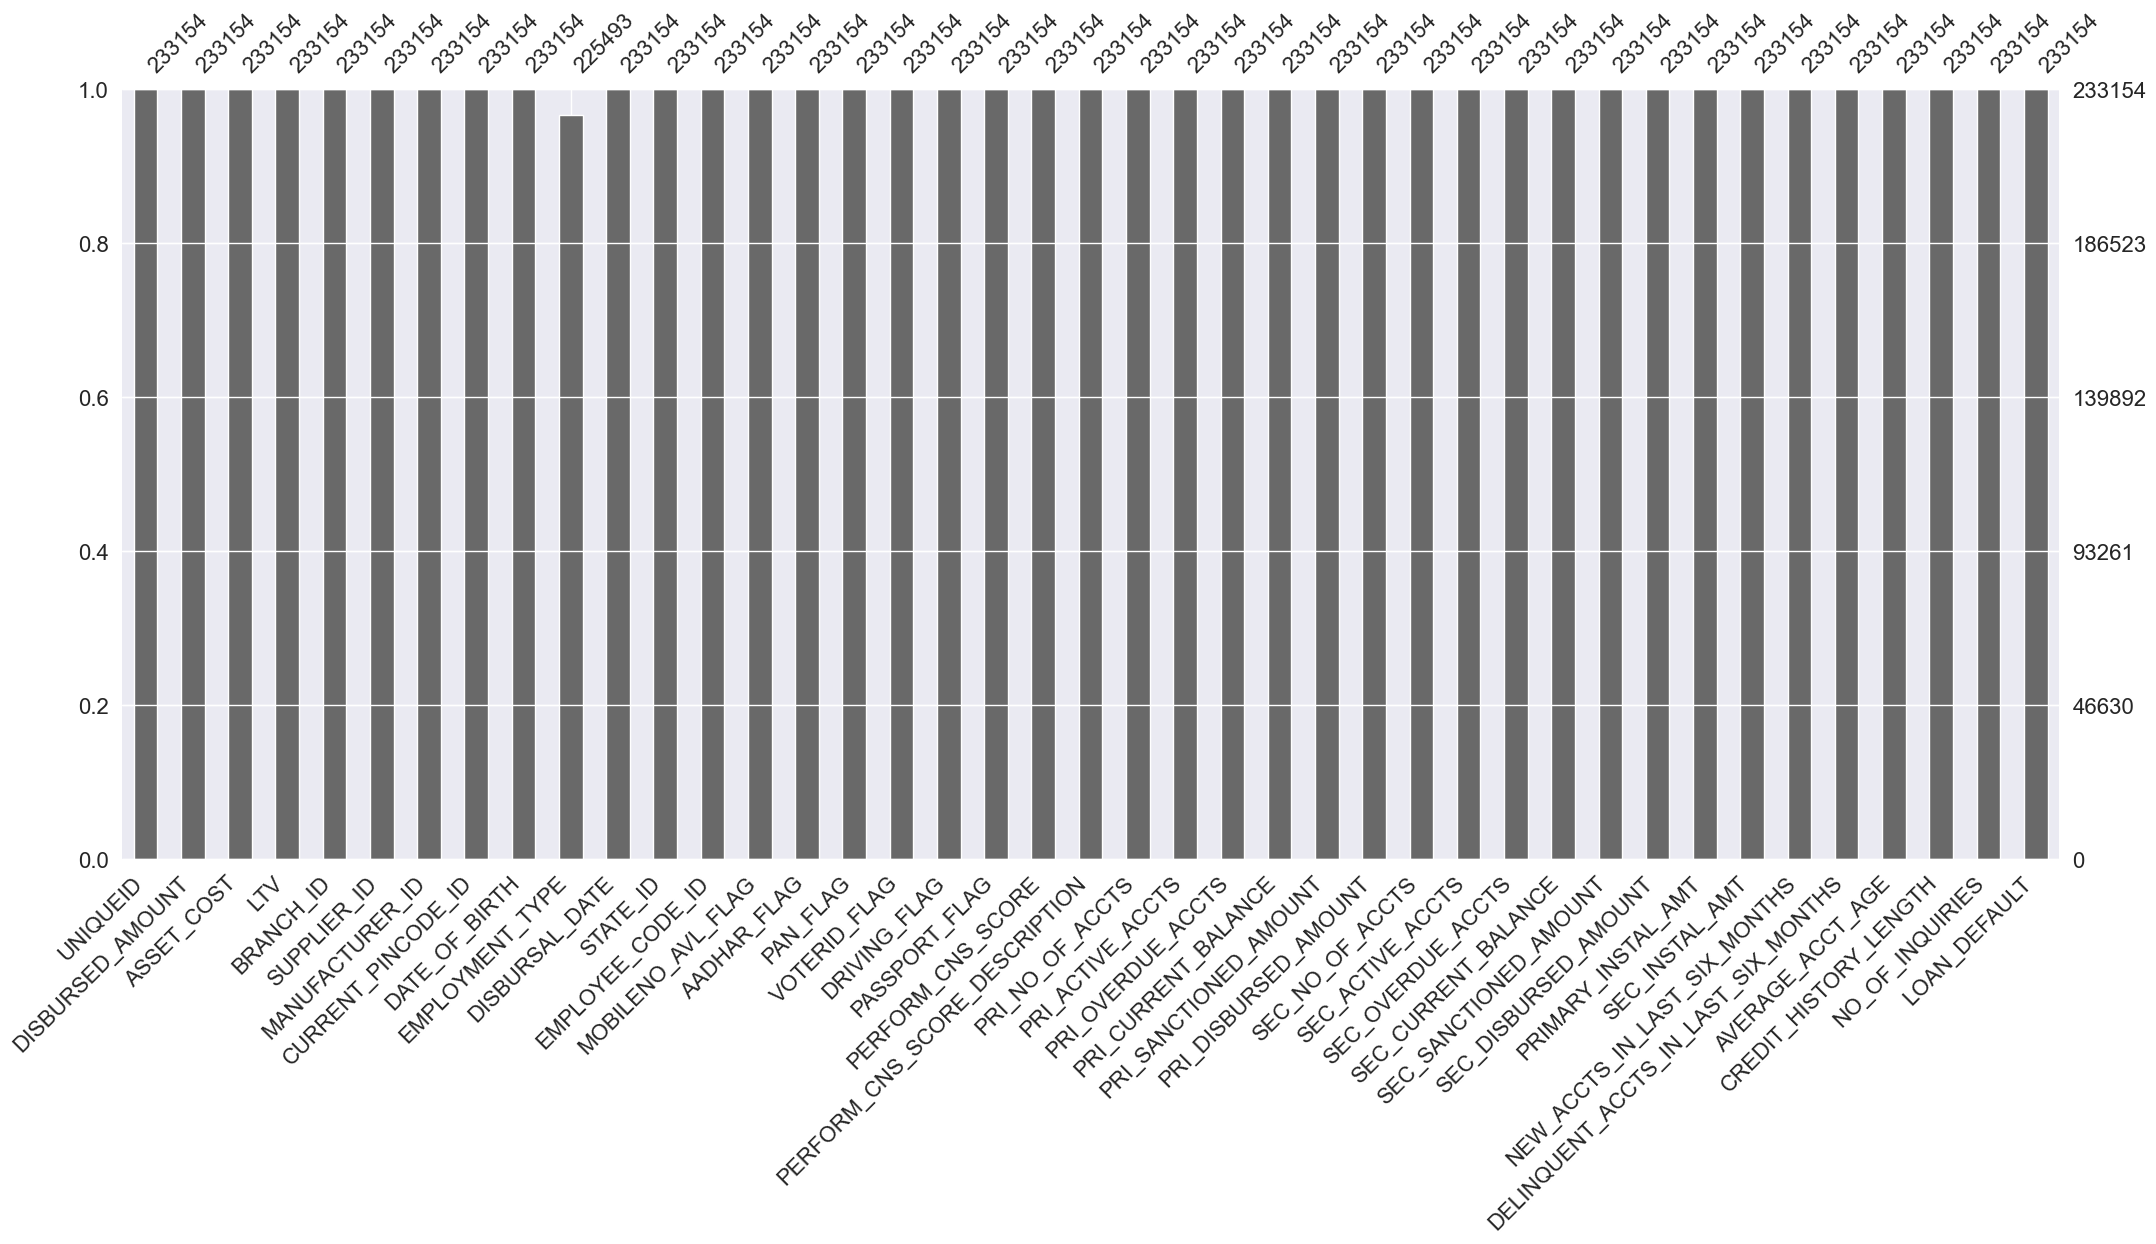

In [10]:
msngo.bar(df);

- Se muestra que una Variable presenta nulos

In [11]:
df.isnull().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

- Se tienen 7661 datos nulos para la variable "EMPLOYMENT_TYPE"

In [12]:
df.describe().round(2).T

count       mean         std  \
UNIQUEID                             233154.0  535917.57    68315.69   
DISBURSED_AMOUNT                     233154.0   54356.99    12971.31   
ASSET_COST                           233154.0   75865.07    18944.78   
LTV                                  233154.0      74.75       11.46   
BRANCH_ID                            233154.0      72.94       69.83   
SUPPLIER_ID                          233154.0   19638.64     3491.95   
MANUFACTURER_ID                      233154.0      69.03       22.14   
CURRENT_PINCODE_ID                   233154.0    3396.88     2238.15   
STATE_ID                             233154.0       7.26        4.48   
EMPLOYEE_CODE_ID                     233154.0    1549.48      975.26   
PERFORM_CNS_SCORE                    233154.0     289.46      338.37   
PRI_NO_OF_ACCTS                      233154.0       2.44        5.22   
PRI_ACTIVE_ACCTS                     233154.0       1.04        1.94   
PRI_OVERDUE_ACCTS                    233154.0       0.16        0.55   
PRI_CURRENT_BALANCE                  233154.0  165900.08   942273.58   
PRI_SANCTIONED_AMOUNT                233154.0  218503.86  2374794.13   
PRI_DISBURSED_AMOUNT                 233154.0  218065.90  2377743.85   
SEC_NO_OF_ACCTS                      233154.0       0.06        0.63   
SEC_ACTIVE_ACCTS                     233154.0       0.03        0.32   
SEC_OVERDUE_ACCTS                    233154.0       0.01        0.11   
SEC_CURRENT_BALANCE                  233154.0    5427.79   170236.99   
SEC_SANCTIONED_AMOUNT                233154.0    7295.92   183155.99   
SEC_DISBURSED_AMOUNT                 233154.0    7180.00   182592.50   
PRIMARY_INSTAL_AMT                   233154.0   13105.48   151367.90   
SEC_INSTAL_AMT                       233154.0     323.27    15553.69   
NEW_ACCTS_IN_LAST_SIX_MONTHS         233154.0       0.38        0.96   
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  233154.0       0.10        0.38   
NO_OF_INQUIRIES                      233154.0       0.21        0.71   

                                            min        25%       50%  \
UNIQUEID                              417428.00  476786.25  535978.5   
DISBURSED_AMOUNT                       13320.00   47145.00   53803.0   
ASSET_COST                             37000.00   65717.00   70946.0   
LTV                                       10.03      68.88      76.8   
BRANCH_ID                                  1.00      14.00      61.0   
SUPPLIER_ID                            10524.00   16535.00   20333.0   
MANUFACTURER_ID                           45.00      48.00      86.0   
CURRENT_PINCODE_ID                         1.00    1511.00    2970.0   
STATE_ID                                   1.00       4.00       6.0   
EMPLOYEE_CODE_ID                           1.00     713.00    1451.0   
PERFORM_CNS_SCORE                          0.00       0.00       0.0   
PRI_NO_OF_ACCTS                            0.00       0.00       0.0   
PRI_ACTIVE_ACCTS                           0.00       0.00       0.0   
PRI_OVERDUE_ACCTS                          0.00       0.00       0.0   
PRI_CURRENT_BALANCE                 -6678296.00       0.00       0.0   
PRI_SANCTIONED_AMOUNT                      0.00       0.00       0.0   
PRI_DISBURSED_AMOUNT                       0.00       0.00       0.0   
SEC_NO_OF_ACCTS                            0.00       0.00       0.0   
SEC_ACTIVE_ACCTS                           0.00       0.00       0.0   
SEC_OVERDUE_ACCTS                          0.00       0.00       0.0   
SEC_CURRENT_BALANCE                  -574647.00       0.00       0.0   
SEC_SANCTIONED_AMOUNT                      0.00       0.00       0.0   
SEC_DISBURSED_AMOUNT                       0.00       0.00       0.0   
PRIMARY_INSTAL_AMT                         0.00       0.00       0.0   
SEC_INSTAL_AMT                             0.00       0.00       0.0   
NEW_ACCTS_IN_LAST_SIX_MONTHS               0.00       0.00       0.0   
DELINQU

- Valores negativos para las Variables "PRI_CURRENT_BALANCE" Y "SEC_CURRENT_BALANCE", se requiere revisar si corresponden los valores o no.

In [13]:
df.describe(exclude='number').T

count unique                          top  \
DATE_OF_BIRTH                    233154  15433          1988-01-01 00:00:00   
EMPLOYMENT_TYPE                  225493      2                Self employed   
DISBURSAL_DATE                   233154     84          2018-10-31 00:00:00   
MOBILENO_AVL_FLAG              233154.0    1.0                          1.0   
AADHAR_FLAG                    233154.0    2.0                          1.0   
PAN_FLAG                       233154.0    2.0                          0.0   
VOTERID_FLAG                   233154.0    2.0                          0.0   
DRIVING_FLAG                   233154.0    2.0                          0.0   
PASSPORT_FLAG                  233154.0    2.0                          0.0   
PERFORM_CNS_SCORE_DESCRIPTION    233154     20  No Bureau History Available   
AVERAGE_ACCT_AGE                 233154    192                    0yrs 0mon   
CREDIT_HISTORY_LENGTH            233154    294                    0yrs 0mon   
LOAN_DEFAULT                   233154.0    2.0                          0.0   

                                   freq      first       last  
DATE_OF_BIRTH                      2173 1949-09-15 2000-12-08  
EMPLOYMENT_TYPE                  127635        NaT        NaT  
DISBURSAL_DATE                     8826 2018-01-08 2018-12-10  
MOBILENO_AVL_FLAG              233154.0        NaT        NaT  
AADHAR_FLAG                    195924.0        NaT        NaT  
PAN_FLAG                       215533.0        NaT        NaT  
VOTERID_FLAG                   199360.0        NaT        NaT  
DRIVING_FLAG                   227735.0        NaT        NaT  
PASSPORT_FLAG                  232658.0        NaT        NaT  
PERFORM_CNS_SCORE_DESCRIPTION    116950        NaT        NaT  
AVERAGE_ACCT_AGE                 119373        NaT        NaT  
CREDIT_HISTORY_LENGTH            119127        NaT        NaT  
LOAN_DEFAULT                   182543.0        NaT        NaT

In [14]:
# Se conoce las variables discretas

df.select_dtypes(exclude=['number']).columns 

Index(['DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'LOAN_DEFAULT'],
      dtype='object')

In [15]:
# Saber la cantidad de repetidos por las variables discretas

coso = ['DATE_OF_BIRTH',
        'EMPLOYMENT_TYPE',
        'DISBURSAL_DATE',
        'MOBILENO_AVL_FLAG',
        'AADHAR_FLAG',
        'PAN_FLAG',
        'VOTERID_FLAG',
        'DRIVING_FLAG',
        'PASSPORT_FLAG',
        'PERFORM_CNS_SCORE_DESCRIPTION',
        'AVERAGE_ACCT_AGE',
        'CREDIT_HISTORY_LENGTH',
        'LOAN_DEFAULT']
        
for i in coso:
    meee = df[i].value_counts()
    print(meee[meee > 1])
    print("-"*100)

1988-01-01    2173
1990-01-01    2170
1987-01-01    2127
1986-01-01    2063
1985-01-01    2005
              ... 
1998-04-16       2
1968-12-27       2
1966-07-24       2
1964-04-09       2
1958-06-10       2
Name: DATE_OF_BIRTH, Length: 14049, dtype: int64
----------------------------------------------------------------------------------------------------
Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
2018-10-31    8826
2018-10-24    6701
2018-08-31    6690
2018-10-23    6440
2018-10-26    6215
              ... 
2018-08-26     705
2018-12-08     572
2018-09-13     330
2018-05-08      42
2018-02-10      25
Name: DISBURSAL_DATE, Length: 84, dtype: int64
----------------------------------------------------------------------------------------------------
1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64
-------------------------------------------------

- Se confirma valores repetidos en 13 de las 13 variables
- La variable 'MOBILENO_AVL_FLAG' solo posee valor '1' en todos sus datos

# Cuarta Parte

BDT2-1 - BDT2-13 https://alkemy-labs.atlassian.net/browse/BDT2-13

# Limpieza y preprocesamiento de datos I

COMO DS DEVELOPER
QUIERO contar con un dataset limpio
PARA poder desarrollar el análisis de los datos

Criterios de aceptación:
Definir y justificar que criterios se utilizaran para:

- Que tratamiento se le realizaran a los valores nulos
- Que tratamiento se le realizará a los valores duplicados
- Que tratamiento se le realizará a las variables que presenten inconsistencias

- Los datos nulos se sugiere partir agregando una nueva categoria llamada "S/I" , esta para no perder datos de Employment_Type y ver si son aporte a las explicaciones.
- Los valores duplicados se encontro en la variable "MOBILENO_AVL_FLAG" y esta se procede a eliminar ya que solo posee una categoria lo cual no aporta a entender comportamiento.
- En cuanto a las variables incosistentes se tomo la decision de eliminar estos datos ya que un prestamo no tiene sentido que tome valores negativos.

# Quinta Parte

BDT2-1 - BDT2-14 https://alkemy-labs.atlassian.net/browse/BDT2-14


# Limpieza y preprocesamiento de datos II

COMO DS DEVELOPER
QUIERO contar con un dataset limpio
PARA poder desarrollar el análisis de los datos

Criterios de aceptación:
- Aplicar en la notebook, los criterios definidos en la task anterior

In [16]:
# Tratamiento de datos nulos

df.fillna('S/I', inplace=True)
df

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  \
0         420825             50578       58400  89.55         67        22807   
1         537409             47145       65550  73.23         67        22807   
2         417566             53278       61360  89.63         67        22807   
3         624493             57513       66113  88.48         67        22807   
4         539055             52378       60300  88.39         67        22807   
...          ...               ...         ...    ...        ...          ...   
233149    626432             63213      105405  60.72         34        20700   
233150    606141             73651      100600  74.95         34        23775   
233151    613658             33484       71212  48.45         77        22186   
233152    548084             34259       73286  49.10         77        22186   
233153    630213             75751      116009  66.81         77        22186   

        MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0                    45                1441    1984-01-01        Salaried   
1                    45                1502    1985-07-31   Self employed   
2                    45                1497    1985-08-24   Self employed   
3                    45                1501    1993-12-30   Self employed   
4                    45                1495    1977-09-12   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050    1988-01-08        Salaried   
233150               51                 990    1988-05-12   Self employed   
233151               86                2299    1976-01-06        Salaried   
233152               86                2299    1994-03-26        Salaried   
233153               86                2299    1984-02-18        Salaried   

        ... SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  \
0       ...                     0                     0                   0   
1       ...                     0                     0                1991   
2       ...                     0                     0                   0   
3       ...                     0                     0                  31   
4       ...                     0                     0                   0   
...     ...                   ...                   ...                 ...   
233149  ...                     0                     0                4084   
233150  ...                     0                     0                1565   
233151  ...                     0                     0                   0   
233152  ...                     0                     0                   0   
233153  ...                     0                     0                   0   

       SEC_INSTAL_AMT NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   
...               ...                          ...   
233149              0                            0   
233150              0                            0   
233151              0                            0   
233152              0                            0   
233153              0                            0   

       DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS AVERAGE_ACCT_AGE  \
0                                        0        0yrs 0mon   
1                                        1       1yrs 11mon   
2                                        0        0yrs 0mon   
3                                        0        0yrs 8mon   
4                                        0        0yrs 0mon   
...                                    ...              ...   
233149                                   0        1yrs 9mon   
233150  

- Se decide dejar los datos nulos como una nueva categoria llamada 'S/I'.
- Con esto se implementa una tercera categoria a la variable 'EMPLOYMENT_TYPE'

In [17]:
# Tratamiento de valores duplicados

df.drop('MOBILENO_AVL_FLAG', axis=1, inplace=True)
df

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  \
0         420825             50578       58400  89.55         67        22807   
1         537409             47145       65550  73.23         67        22807   
2         417566             53278       61360  89.63         67        22807   
3         624493             57513       66113  88.48         67        22807   
4         539055             52378       60300  88.39         67        22807   
...          ...               ...         ...    ...        ...          ...   
233149    626432             63213      105405  60.72         34        20700   
233150    606141             73651      100600  74.95         34        23775   
233151    613658             33484       71212  48.45         77        22186   
233152    548084             34259       73286  49.10         77        22186   
233153    630213             75751      116009  66.81         77        22186   

        MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0                    45                1441    1984-01-01        Salaried   
1                    45                1502    1985-07-31   Self employed   
2                    45                1497    1985-08-24   Self employed   
3                    45                1501    1993-12-30   Self employed   
4                    45                1495    1977-09-12   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050    1988-01-08        Salaried   
233150               51                 990    1988-05-12   Self employed   
233151               86                2299    1976-01-06        Salaried   
233152               86                2299    1994-03-26        Salaried   
233153               86                2299    1984-02-18        Salaried   

        ... SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  \
0       ...                     0                     0                   0   
1       ...                     0                     0                1991   
2       ...                     0                     0                   0   
3       ...                     0                     0                  31   
4       ...                     0                     0                   0   
...     ...                   ...                   ...                 ...   
233149  ...                     0                     0                4084   
233150  ...                     0                     0                1565   
233151  ...                     0                     0                   0   
233152  ...                     0                     0                   0   
233153  ...                     0                     0                   0   

       SEC_INSTAL_AMT NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   
...               ...                          ...   
233149              0                            0   
233150              0                            0   
233151              0                            0   
233152              0                            0   
233153              0                            0   

       DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS AVERAGE_ACCT_AGE  \
0                                        0        0yrs 0mon   
1                                        1       1yrs 11mon   
2                                        0        0yrs 0mon   
3                                        0        0yrs 8mon   
4                                        0        0yrs 0mon   
...                                    ...              ...   
233149                                   0        1yrs 9mon   
233150  

- Se elimina la variable 'MOBILENO_AVL_FLAG' debido a que solo presenta valores 1, no es un aporte para discriminar en el analisis.


In [18]:
# Tratamiento valores que presenten inconsistencias

df = df[(df['PRI_CURRENT_BALANCE'] >= 0) & (df['SEC_CURRENT_BALANCE'] >= 0)]
df

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  \
0         420825             50578       58400  89.55         67        22807   
1         537409             47145       65550  73.23         67        22807   
2         417566             53278       61360  89.63         67        22807   
3         624493             57513       66113  88.48         67        22807   
4         539055             52378       60300  88.39         67        22807   
...          ...               ...         ...    ...        ...          ...   
233149    626432             63213      105405  60.72         34        20700   
233150    606141             73651      100600  74.95         34        23775   
233151    613658             33484       71212  48.45         77        22186   
233152    548084             34259       73286  49.10         77        22186   
233153    630213             75751      116009  66.81         77        22186   

        MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0                    45                1441    1984-01-01        Salaried   
1                    45                1502    1985-07-31   Self employed   
2                    45                1497    1985-08-24   Self employed   
3                    45                1501    1993-12-30   Self employed   
4                    45                1495    1977-09-12   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050    1988-01-08        Salaried   
233150               51                 990    1988-05-12   Self employed   
233151               86                2299    1976-01-06        Salaried   
233152               86                2299    1994-03-26        Salaried   
233153               86                2299    1984-02-18        Salaried   

        ... SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  \
0       ...                     0                     0                   0   
1       ...                     0                     0                1991   
2       ...                     0                     0                   0   
3       ...                     0                     0                  31   
4       ...                     0                     0                   0   
...     ...                   ...                   ...                 ...   
233149  ...                     0                     0                4084   
233150  ...                     0                     0                1565   
233151  ...                     0                     0                   0   
233152  ...                     0                     0                   0   
233153  ...                     0                     0                   0   

       SEC_INSTAL_AMT NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   
...               ...                          ...   
233149              0                            0   
233150              0                            0   
233151              0                            0   
233152              0                            0   
233153              0                            0   

       DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS AVERAGE_ACCT_AGE  \
0                                        0        0yrs 0mon   
1                                        1       1yrs 11mon   
2                                        0        0yrs 0mon   
3                                        0        0yrs 8mon   
4                                        0        0yrs 0mon   
...                                    ...              ...   
233149                                   0        1yrs 9mon   
233150  

- Las Variables 'PRI_CURRENT_BALANCE' y 'SEC_CURRENT_BALANCE' son variables que a entendimiento de lo entregado en la definicion debiesen mantener valores positivos.
- Se procede a excluir de la base todo aquel valor negativo en estas variables ya que son pocos datos y prevenimos si tiene otro dato erroneo esos clientes.

BDT2-2 - BDT2-15 https://alkemy-labs.atlassian.net/browse/BDT2-15

# Análisis exploratorio de datos (EDA) I

COMO DS DEVELOPER , QUIERO realizar un análisis exploratorio de datos PARA identificar patrones, tendencias y relaciones relevantes

Criterios de aceptación:
- Realizar un análisis univariado de las variables continuas

- Se deben incluir estadisticos de tendencia central (media, mediana, moda)

- Se deben incluir metricas de dispresión (rango, varianza, desvio std)

- Conclusiones del EDA documentadas

In [19]:
def describe_moda(variable):
        pd.set_option('display.float_format', lambda x: '%.2f' % x)
        descripcion = variable.describe()
        moda = variable.mode().iloc[0]
        varianza = variable.var()
        rango = np.ptp(variable)
        descripcion.loc['moda'] = moda
        descripcion.loc['varianza'] = varianza
        descripcion.loc['rango'] = rango
        return descripcion

# UNIQUEID

In [20]:
describe_moda(df.UNIQUEID)

count          232645.00
mean           535939.92
std             68316.05
min            417428.00
25%            476809.00
50%            536015.00
75%            595063.00
max            671084.00
moda           417428.00
varianza   4667083235.04
rango          253656.00
Name: UNIQUEID, dtype: float64

- La Variable al ser un identificador para clientes no se espera que cumpla con un comportamiento lógico o que aporte a nuestra variable respuesta, sin embargo se evidencia una alta disperción entre sus datos con una desviación estándar de  68.316,05

# DISBURSED_AMOUNT


In [21]:
describe_moda(df.DISBURSED_AMOUNT)


count         232645.00
mean           54361.16
std            12970.31
min            13320.00
25%            47145.00
50%            53803.00
75%            60413.00
max           990572.00
moda           48349.00
varianza   168228835.45
rango         977252.00
Name: DISBURSED_AMOUNT, dtype: float64

- La variable presenta valores elevados, con la particularidad de que el promedio y la mediana son valores cercanos
- Existen valores muy mayores con respecto a la media y el percentil 75 por lo tanto se puede deducir la presencia de valores atípicos que causan que la varianza y el promedio sea mayor.

# ASSET_COST


In [22]:
describe_moda(df.ASSET_COST)


count         232645.00
mean           75866.91
std            18941.33
min            37000.00
25%            65719.00
50%            70950.00
75%            79209.00
max          1628992.00
moda           68000.00
varianza   358773853.14
rango        1591992.00
Name: ASSET_COST, dtype: float64

- La variable presenta un promedio y mediana con valores cercanos
- Existen valores muy mayores con respecto a la media y el percentil 75 por lo tanto se puede deducir la presencia de valores atípicos que causan que la varianza y el promedio sea mayor.

# LTV


In [23]:
describe_moda(df.LTV)


count      232645.00
mean           74.75
std            11.45
min            10.03
25%            68.89
50%            76.80
75%            83.67
max            95.00
moda           85.00
varianza      131.19
rango          84.97
Name: LTV, dtype: float64

- Por sus estadísticos descriptivos se evidencia que la variable es una variable con datos concentrados entre el 10.03 y 95
- Su promedio está más inclinado hacia los valores mayores, esto se debe principalmente por la alta acumulación de valores en el número 85

# BRANCH_ID


In [24]:
describe_moda(df.BRANCH_ID)


count      232645.00
mean           72.95
std            69.85
min             1.00
25%            14.00
50%            61.00
75%           130.00
max           261.00
moda            2.00
varianza     4878.46
rango         260.00
Name: BRANCH_ID, dtype: float64

- Al ser una variable que muestra la sucursal en donde se desembolsó el préstamo, se esperan valores heterogéneos.
- Existen valores muy mayores con respecto a la moda por lo tanto se puede deducir la presencia de valores atípicos que causan que la varianza sea tan elevada.
- Al identificar que la moda de esta variable es 2, se puede deducir que en esa sucursal se realizan mayor cantidad de préstamos

# SUPPLIER_ID


In [25]:
describe_moda(df.SUPPLIER_ID)


count        232645.00
mean          19639.81
std            3491.81
min           10524.00
25%           16540.00
50%           20333.00
75%           23000.00
max           24803.00
moda          18317.00
varianza   12192710.89
rango         14279.00
Name: SUPPLIER_ID, dtype: float64

- Al ser una variable que muestra el concesionario en donde se desembolsó el préstamo, se esperan valores heterogéneos.
- Respecto a la mediana, la media y la moda los valores distan en aproximadamente 2000 cada uno.
- Al identificar que la moda de esta variable es 18317, se puede deducir que en ese concesionario se realizan mayor cantidad de préstamos.

# MANUFACTURER_ID


In [26]:
describe_moda(df.MANUFACTURER_ID)


count      232645.00
mean           69.03
std            22.14
min            45.00
25%            48.00
50%            86.00
75%            86.00
max           156.00
moda           86.00
varianza      490.22
rango         111.00
Name: MANUFACTURER_ID, dtype: float64

- Al ser una variable que muestra fabricante del vehículo, se esperan valores heterogéneos.
- La moda y la mediana son iguales, por lo tanto se aprecia una mayor concentración hacia el centro de los datos.
- Al identificar que la moda de esta variable es 86, se puede deducir que es el fabricante con más vehículos.

# CURRENT_PINCODE_ID


In [27]:
describe_moda(df.CURRENT_PINCODE_ID)


count       232645.00
mean          3397.48
std           2238.30
min              1.00
25%           1511.00
50%           2970.00
75%           5678.00
max           7345.00
moda          2578.00
varianza   5010002.41
rango         7344.00
Name: CURRENT_PINCODE_ID, dtype: float64

- Al ser una variable que muestra el código del cliente, se esperan valores heterogéneos.
- Al identificar que la moda de esta variable es 2578, se puede deducir que es el cliente con mayor cantidad de préstamos.

# STATE_ID


In [28]:
describe_moda(df.STATE_ID)


count      232645.00
mean            7.26
std             4.48
min             1.00
25%             4.00
50%             6.00
75%            10.00
max            22.00
moda            4.00
varianza       20.09
rango          21.00
Name: STATE_ID, dtype: float64

- Al ser una variable que muestra el estado de desembolso, se esperan valores heterogéneos.
- Los valores estan concentrados del 1 al 22.
- El estado de desembolso que mas se repite es el estado

# EMPLOYEE_CODE_ID


In [29]:
describe_moda(df.EMPLOYEE_CODE_ID)


count      232645.00
mean         1549.39
std           975.23
min             1.00
25%           713.00
50%          1451.00
75%          2362.00
max          3795.00
moda         2546.00
varianza   951081.50
rango        3794.00
Name: EMPLOYEE_CODE_ID, dtype: float64

- Al ser una variable que indica al empleado que realiza el desembolso, se esperan valores heterogéneos.
- El promedio y la mediana difieren en 100.
- El empleado que más a realizado desembolsos es el que tiene el ID 2546.

# PERFORM_CNS_SCORE


In [30]:
describe_moda(df.PERFORM_CNS_SCORE)


count      232645.00
mean          288.78
std           338.29
min             0.00
25%             0.00
50%             0.00
75%           678.00
max           890.00
moda            0.00
varianza   114438.40
rango         890.00
Name: PERFORM_CNS_SCORE, dtype: float64

- Al ser una variable que indica la puntuación de la oficina, se esperan valores heterogéneos.
- La mediana de esta variable es 0 lo que indica que la mitad de los datos tienen valor 0.
- El valor que más se repite es el 0.

# PRI_NO_OF_ACCTS


In [31]:
describe_moda(df.PRI_NO_OF_ACCTS)


count      232645.00
mean            2.44
std             5.22
min             0.00
25%             0.00
50%             0.00
75%             3.00
max           453.00
moda            0.00
varianza       27.21
rango         453.00
Name: PRI_NO_OF_ACCTS, dtype: float64

- La mediana de esta variable es 0 lo que indica que la mitad de los datos tienen valor 0.
- El valor que más se repite es el 0.

# PRI_ACTIVE_ACCTS


In [32]:
describe_moda(df.PRI_ACTIVE_ACCTS)


count      232645.00
mean            1.04
std             1.94
min             0.00
25%             0.00
50%             0.00
75%             1.00
max           144.00
moda            0.00
varianza        3.77
rango         144.00
Name: PRI_ACTIVE_ACCTS, dtype: float64

- La cantidad de préstamos activos promedio es de 1
- La mediana de esta variable es 0 lo que indica que la mitad de los datos tienen valor 0.
- El valor que más se repite es el 0.

# PRI_OVERDUE_ACCTS


In [33]:
describe_moda(df.PRI_OVERDUE_ACCTS)


count      232645.00
mean            0.16
std             0.55
min             0.00
25%             0.00
50%             0.00
75%             0.00
max            25.00
moda            0.00
varianza        0.30
rango          25.00
Name: PRI_OVERDUE_ACCTS, dtype: float64

- Las cuentas morosas promedio es de 0.
- El percentil 75 de esta variable es 0 lo que indica que la más de la mitad de los datos tienen valor 0.
- El valor que más se repite es el 0.

# PRI_CURRENT_BALANCE


In [34]:
describe_moda(df.PRI_CURRENT_BALANCE)


count            232645.00
mean             166308.04
std              943056.70
min                   0.00
25%                   0.00
50%                   0.00
75%               35213.00
max            96524920.00
moda                  0.00
varianza   889355938767.16
rango          96524920.00
Name: PRI_CURRENT_BALANCE, dtype: float64

- El monto pendiente de pago promedio es de 166308.
- La mediana de esta variable es 0 lo que indica que la mitad de los datos tienen valor 0.
- El valor que más se repite es el 0.

# PRI_SANCTIONED_AMOUNT


In [35]:
describe_moda(df.PRI_SANCTIONED_AMOUNT)


count             232645.00
mean              218563.86
std              2377162.78
min                    0.00
25%                    0.00
50%                    0.00
75%                62310.00
max           1000000000.00
moda                   0.00
varianza   5650902881047.72
rango         1000000000.00
Name: PRI_SANCTIONED_AMOUNT, dtype: float64

- El monto total sancionado promedio es de 218563.
- La mediana de esta variable es 0 lo que indica que la mitad de los datos tienen valor 0.
- El máximo valor es 100000000 que por el comportamiento de la variable podría tratarse de un valor atípico o algún cliente que tiene un monto sancionado de ese valor.

# PRI_DISBURSED_AMOUNT


In [36]:
describe_moda(df.PRI_DISBURSED_AMOUNT)


count             232645.00
mean              218132.33
std              2380111.57
min                    0.00
25%                    0.00
50%                    0.00
75%                60565.00
max           1000000000.00
moda                   0.00
varianza   5664931108856.28
rango         1000000000.00
Name: PRI_DISBURSED_AMOUNT, dtype: float64

- El monto total desembolsado promedio es de 218132.
- La mediana de esta variable es 0 lo que indica que la mitad de los datos tienen valor 0.
- El máximo valor es 1000000000 que por el comportamiento de la variable podría tratarse de un valor atípico.

# SEC_NO_OF_ACCTS


In [37]:
describe_moda(df.SEC_NO_OF_ACCTS)


count      232645.00
mean            0.06
std             0.63
min             0.00
25%             0.00
50%             0.00
75%             0.00
max            52.00
moda            0.00
varianza        0.39
rango          52.00
Name: SEC_NO_OF_ACCTS, dtype: float64

- El total de préstamos tomados promedio es de 0.
- El percentil 75 de esta variable es 0 lo que indica que la mayoria de los datos tienen valor 0.

# SEC_ACTIVE_ACCTS


In [38]:
describe_moda(df.SEC_ACTIVE_ACCTS)


count      232645.00
mean            0.03
std             0.32
min             0.00
25%             0.00
50%             0.00
75%             0.00
max            36.00
moda            0.00
varianza        0.10
rango          36.00
Name: SEC_ACTIVE_ACCTS, dtype: float64

- El total de préstamos activos promedio es de 0.
- El percentil 75 de esta variable es 0 lo que indica que la mayoria de los datos tienen valor 0.
- Existe un cliente que tiene 36 préstamos activos.

# SEC_OVERDUE_ACCTS


In [39]:
describe_moda(df.SEC_OVERDUE_ACCTS)


count      232645.00
mean            0.01
std             0.11
min             0.00
25%             0.00
50%             0.00
75%             0.00
max             8.00
moda            0.00
varianza        0.01
rango           8.00
Name: SEC_OVERDUE_ACCTS, dtype: float64

- Las cuentas morosas promedio es de 0.
- El percentil 75 de esta variable es 0 lo que indica que la mayoria de los datos tienen valor 0.
- Existe al menos un cliente con 8 cuentas morosas.

# SEC_CURRENT_BALANCE


In [40]:
describe_moda(df.SEC_CURRENT_BALANCE)


count           232645.00
mean              5440.55
std             170413.29
min                  0.00
25%                  0.00
50%                  0.00
75%                  0.00
max           36032852.00
moda                 0.00
varianza   29040689091.61
rango         36032852.00
Name: SEC_CURRENT_BALANCE, dtype: float64

- El monto pendiente de pago promedio es de 5440.
- La mediana de esta variable es 0 lo que indica que la mitad de los datos tienen valor 0.
- El valor que más se repite es el 0.
- El valor de la descviación estandar, respecto a sus datos dan indicios de valores atípicos.

# SEC_SANCTIONED_AMOUNT


In [41]:
describe_moda(df.SEC_SANCTIONED_AMOUNT)


count           232645.00
mean              7277.02
std             183321.90
min                  0.00
25%                  0.00
50%                  0.00
75%                  0.00
max           30000000.00
moda                 0.00
varianza   33606920481.00
rango         30000000.00
Name: SEC_SANCTIONED_AMOUNT, dtype: float64

- El monto total sancionado promedio es de .
- El percentil 75 de esta variable es 0 lo que indica que más de la mitad de los datos tienen valor 0.
- El máximo valor es 30000000 que por el comportamiento de la variable podría tratarse de un valor atípico o algún cliente que tiene un monto sancionado de ese valor.

# SEC_DISBURSED_AMOUNT


In [42]:
describe_moda(df.SEC_DISBURSED_AMOUNT)


count           232645.00
mean              7168.22
std             182766.77
min                  0.00
25%                  0.00
50%                  0.00
75%                  0.00
max           30000000.00
moda                 0.00
varianza   33403691468.61
rango         30000000.00
Name: SEC_DISBURSED_AMOUNT, dtype: float64

- El monto total desembolsado promedio es de 7168.
- El percentil 75 de esta variable es 0 lo que indica que más de la mitad de los datos tienen valor 0.
- El máximo valor es 30000000 que por el comportamiento de la variable podría tratarse de un valor atípico.

# PRIMARY_INSTAL_AMT


In [43]:
describe_moda(df.PRIMARY_INSTAL_AMT)


count           232645.00
mean             13069.52
std             151328.29
min                  0.00
25%                  0.00
50%                  0.00
75%               1997.00
max           25642806.00
moda                 0.00
varianza   22900251610.58
rango         25642806.00
Name: PRIMARY_INSTAL_AMT, dtype: float64

- El monto del prestamo primario promedio es de 13069.
- La mediana de esta variable es 0 lo que indica que la mitad de los datos tienen valor 0.
- El máximo valor es 25642806 que por el comportamiento de la variable podría tratarse de un valor atípico.

# SEC_INSTAL_AMT


In [44]:
describe_moda(df.SEC_INSTAL_AMT)


count         232645.00
mean             321.34
std            15554.19
min                0.00
25%                0.00
50%                0.00
75%                0.00
max          4170901.00
moda               0.00
varianza   241932918.38
rango        4170901.00
Name: SEC_INSTAL_AMT, dtype: float64

- El monto del prestamo segundario promedio es de 321.
- El percentil 75 de esta variable es 0 lo que indica que más de la mitad de los datos tienen valor 0.
- El máximo valor es 4170901 que por el comportamiento de la variable podría tratarse de un valor atípico.

# NO_OF_INQUIRIES


In [45]:
describe_moda(df.NO_OF_INQUIRIES)


count      232645.00
mean            0.21
std             0.71
min             0.00
25%             0.00
50%             0.00
75%             0.00
max            36.00
moda            0.00
varianza        0.50
rango          36.00
Name: NO_OF_INQUIRIES, dtype: float64

- El promedio de las consultas realizadas por el cliente para préstamos  es 0.
- El percentil 75 de esta variable es 0 lo que indica que más de la mitad de los datos tienen valor 0.
- Existe al menos un cliente que realizó 36  consultas para préstamos.

BDT2-2 - BDT2-17 https://alkemy-labs.atlassian.net/browse/BDT2-17

# Visualización inicial de datos I

COMO DS DEVELOPER , QUIERO hacer una visualizacion de datos PARA complementar el análisis previo,

Criterios de aceptación:
Sobre el análisis univariado de las variables continuas

-Se deben realizar Histogramas, box plots y otras mas graficas que consideren oportunas para apoyar la los resultados obtenidos

In [46]:
def hist_box(data,col):
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))

        sns.boxplot(data[col], ax=ax_box,orient="h", showmeans=True)
        sns.distplot(data[col], ax=ax_hist)

        ax_hist.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax_hist.ticklabel_format(style='plain', axis='x')

        plt.show()

# UNIQUEID


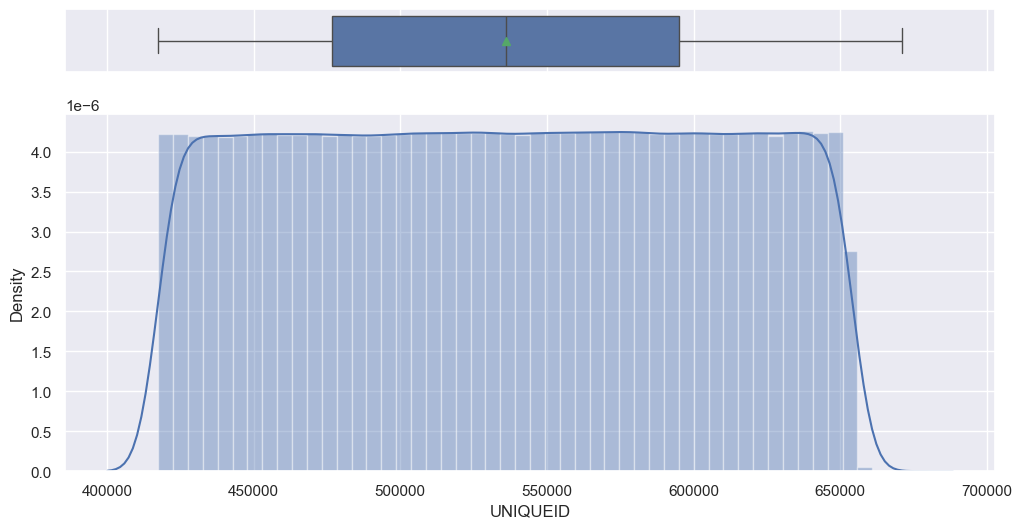

In [47]:
hist_box(df,"UNIQUEID")


- La Variable al ser un identificador para clientes no se espera que cumpla con un comportamiento lógico o que aporte a nuestra variable respuesta, sin embargo se evidencia una alta disperción entre sus datos.


# DISBURSED_AMOUNT


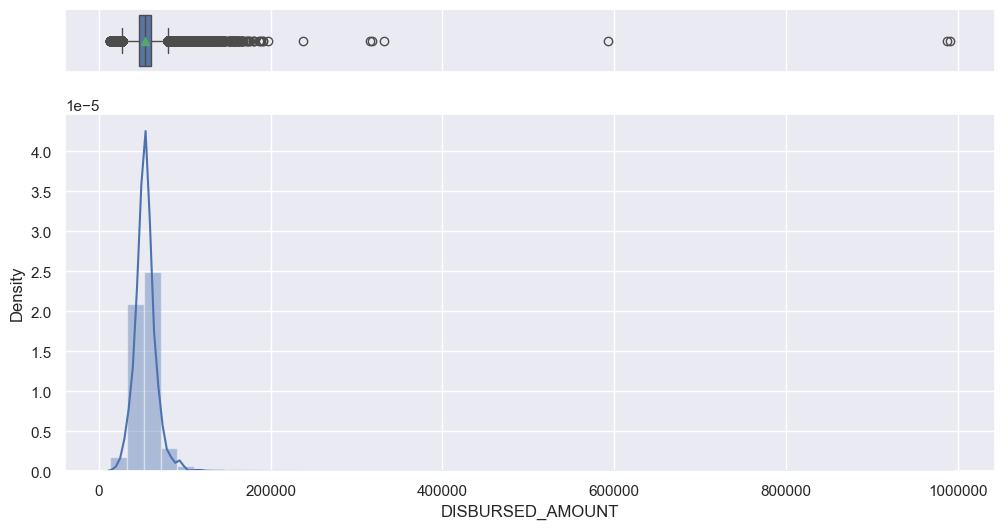

In [48]:
hist_box(df,"DISBURSED_AMOUNT")


En el gráfico se evidencia la presencia de valores atípicos y una concentración de datos menores a 200000


# ASSET_COST


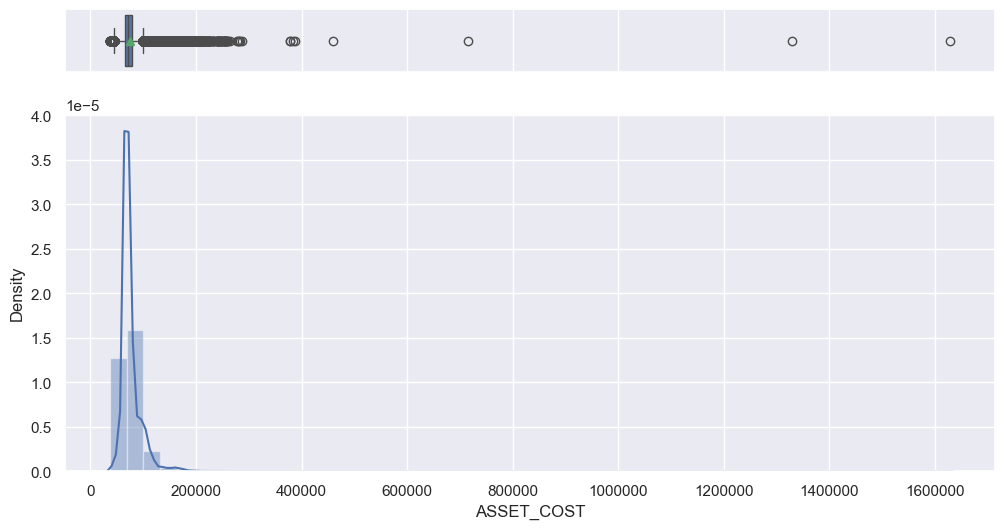

In [49]:
hist_box(df,"ASSET_COST")


En la variable se evidencia la presencia de valores atípicos y una concentración de datos menores a 200000, con alta frecuencia en un valor particular.


# LTV


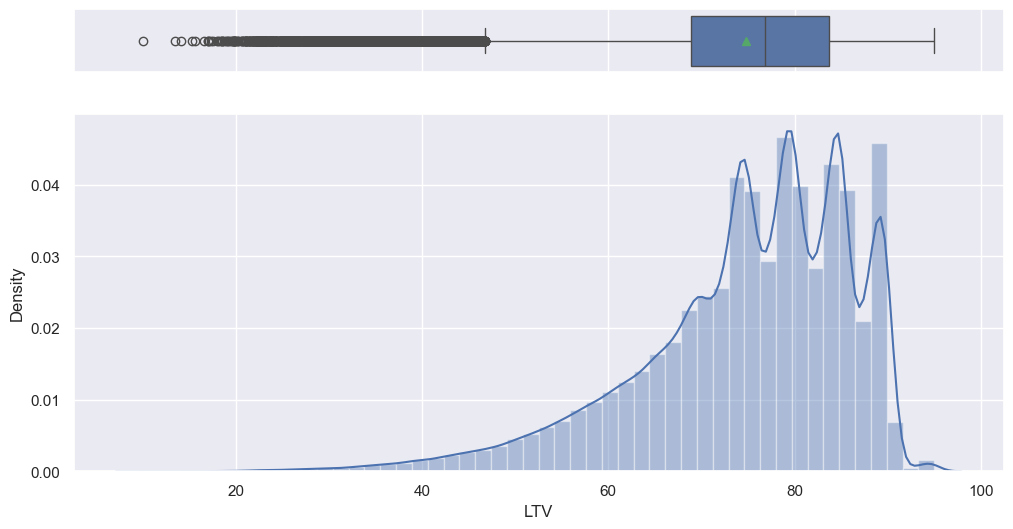

In [50]:
hist_box(df,"LTV")


En la variable se evidencia la presencia de valores atípicos tirados hacia el cero, valores fluctuantes al rededor del 80.


# BRANCH_ID


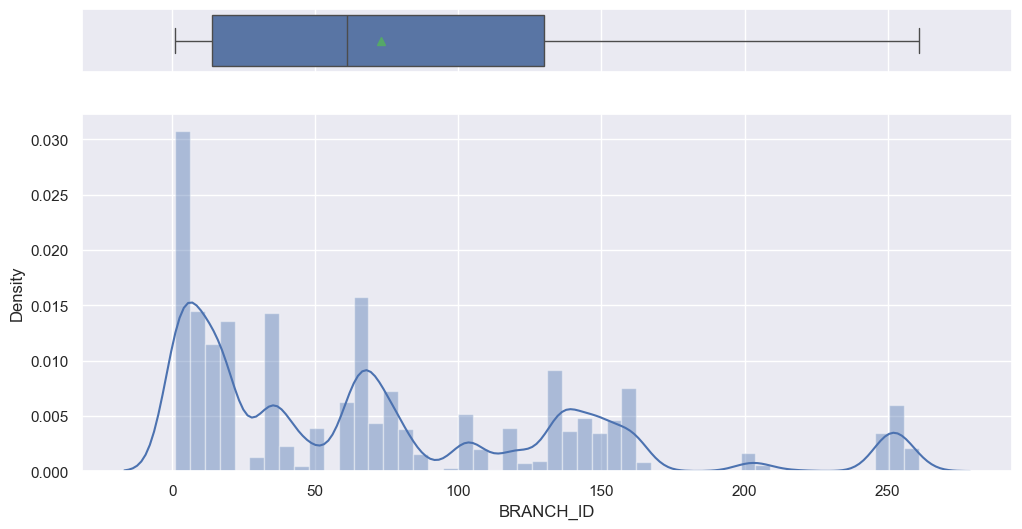

In [51]:
hist_box(df,"BRANCH_ID")


En el gráfico se evidencia valores concentrados en el cero y datos dispersos entre 0 y 250.


# SUPPLIER_ID


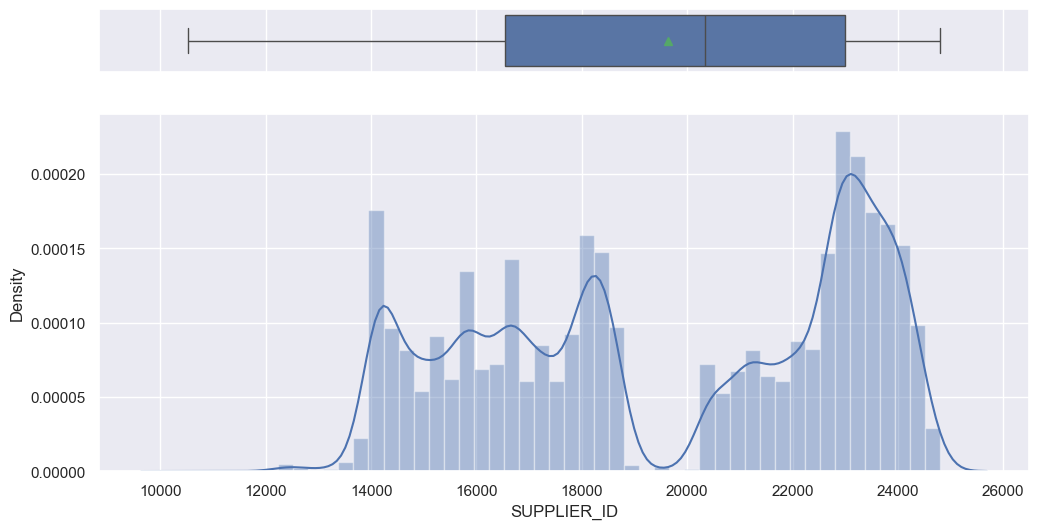

In [52]:
hist_box(df,"SUPPLIER_ID")


El gráfico representa una distribución con dos centros formados entre 14000 a 18000 y 20000 a 24000.


# MANUFACTURER_ID


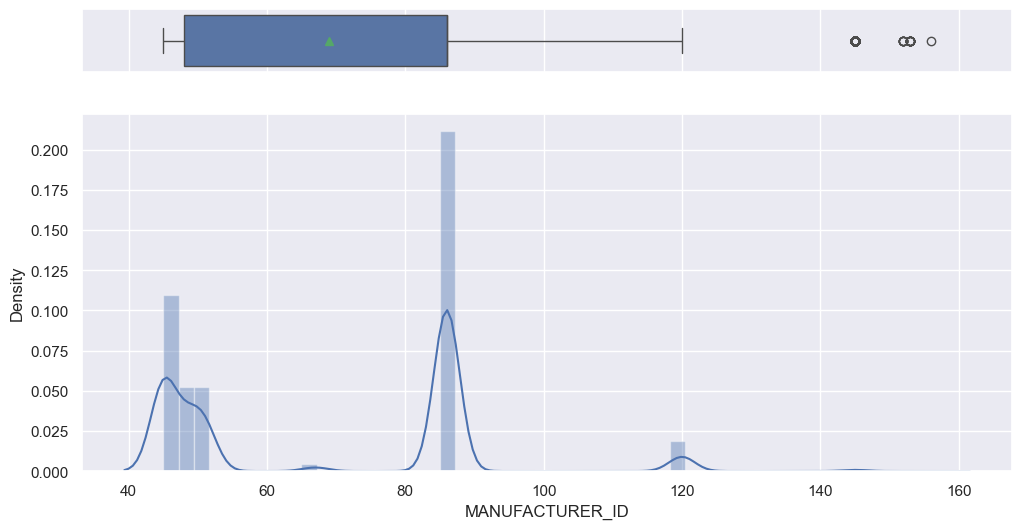

In [53]:
hist_box(df,"MANUFACTURER_ID")


Hay una alta concentración de datos entre 80 y 100. Y se evidencian algunos valores atípicos.


# CURRENT_PINCODE_ID


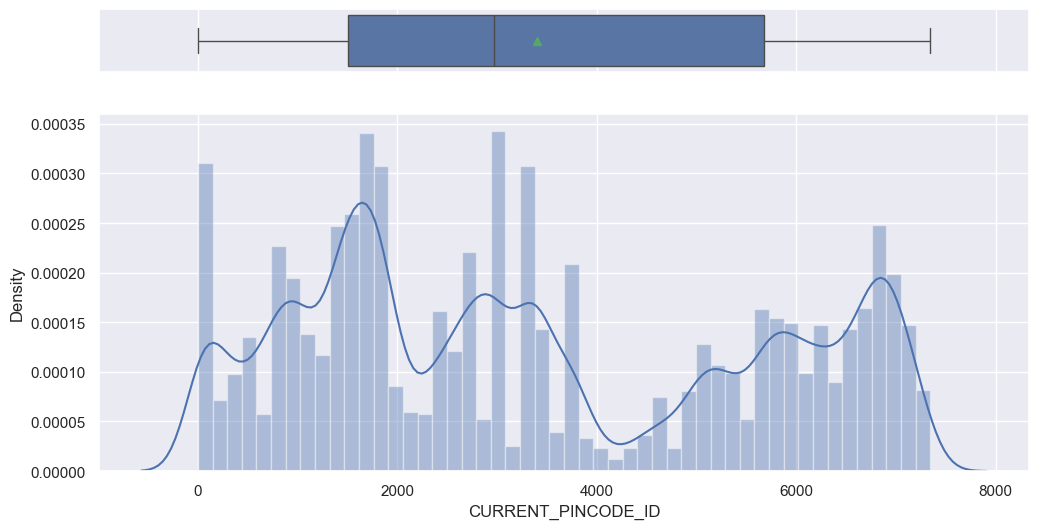

In [54]:
hist_box(df,"CURRENT_PINCODE_ID")


Se observa variabilidad en los datos y concentración de los mismos por encima de la mediana.


# STATE_ID


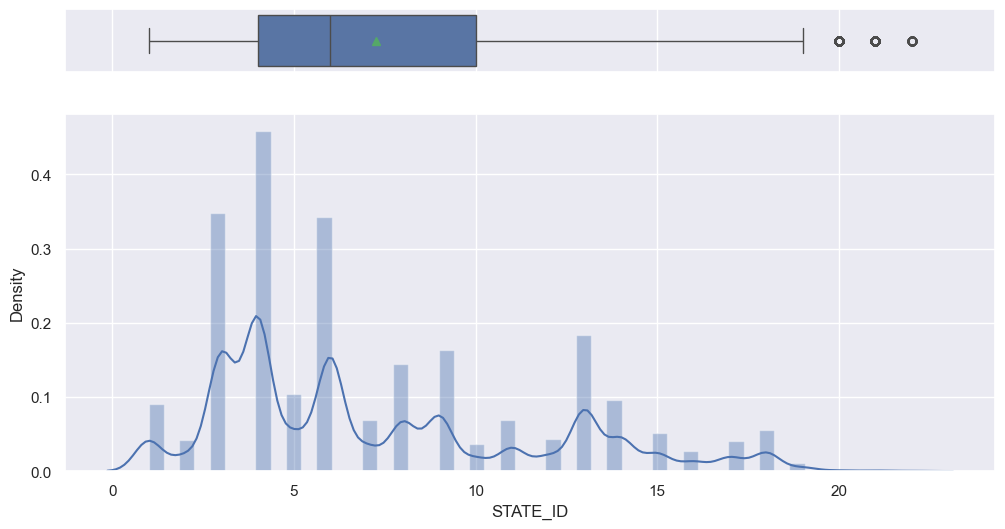

In [55]:
hist_box(df,"STATE_ID")


Se observan valores atípicos y concentración de datos en el valor 4.


# EMPLOYEE_CODE_ID


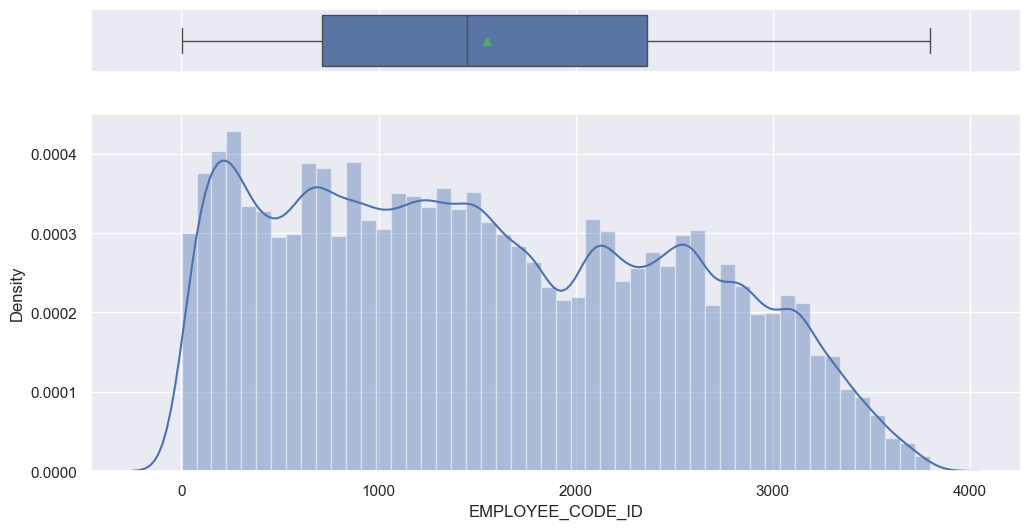

In [56]:
hist_box(df,"EMPLOYEE_CODE_ID")


Se observa variabilidad en los datos


# PERFORM_CNS_SCORE


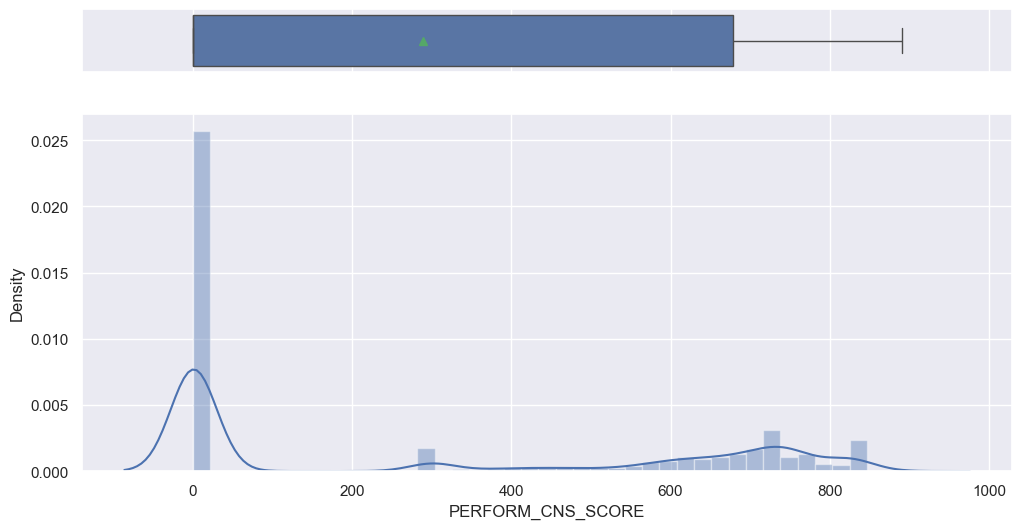

In [57]:
hist_box(df,"PERFORM_CNS_SCORE")


En el gráfico se evidencia la concentración de datos en el valor 0.


# PRI_NO_OF_ACCTS


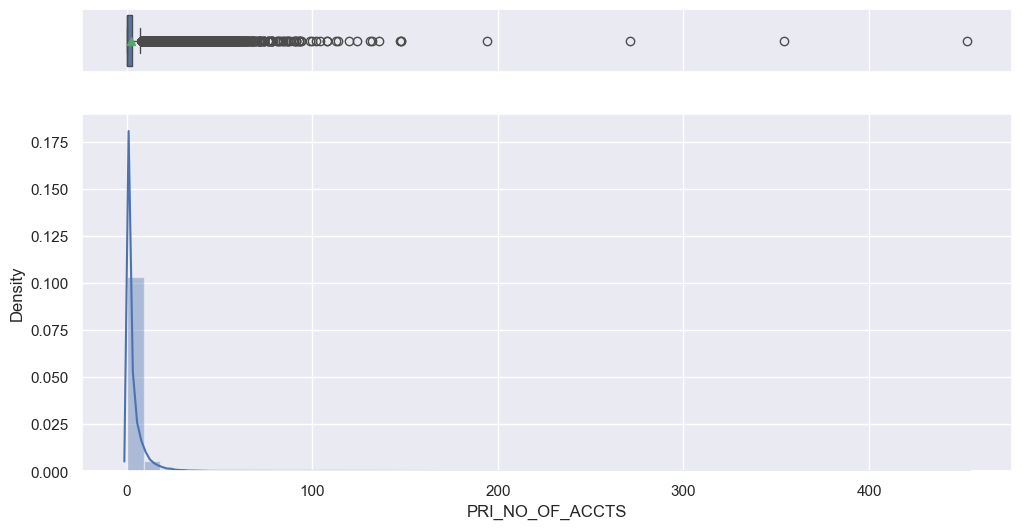

In [58]:
hist_box(df,"PRI_NO_OF_ACCTS")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# PRI_ACTIVE_ACCTS

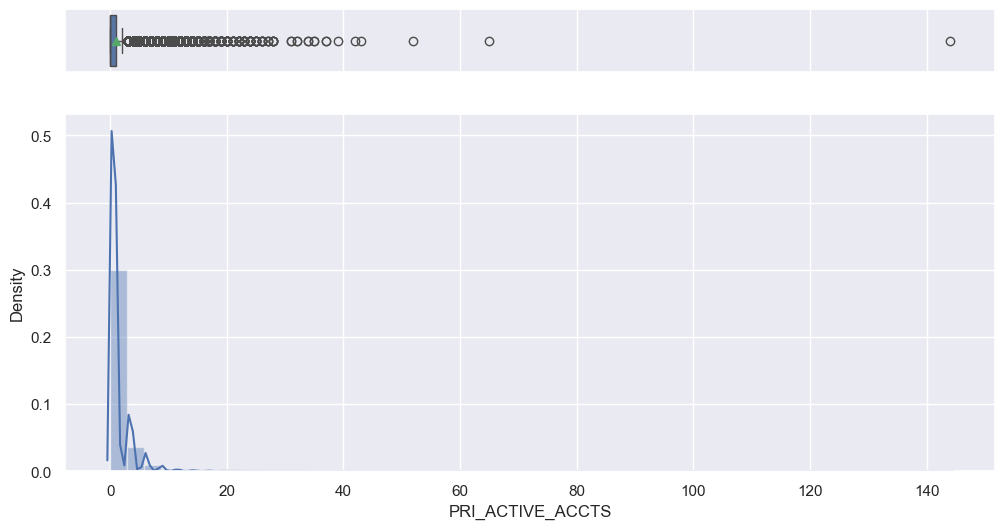

In [59]:
hist_box(df,"PRI_ACTIVE_ACCTS")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# PRI_OVERDUE_ACCTS


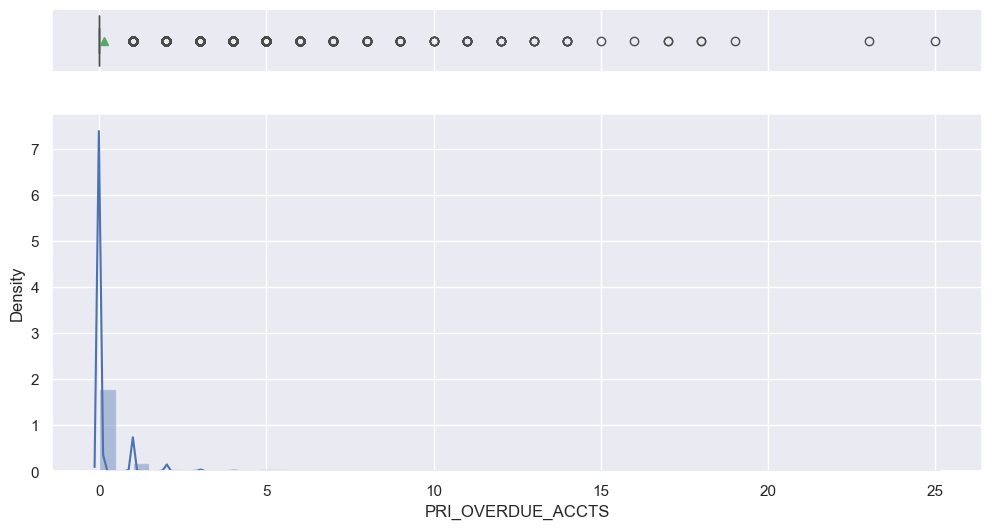

In [60]:
hist_box(df,"PRI_OVERDUE_ACCTS")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# PRI_CURRENT_BALANCE


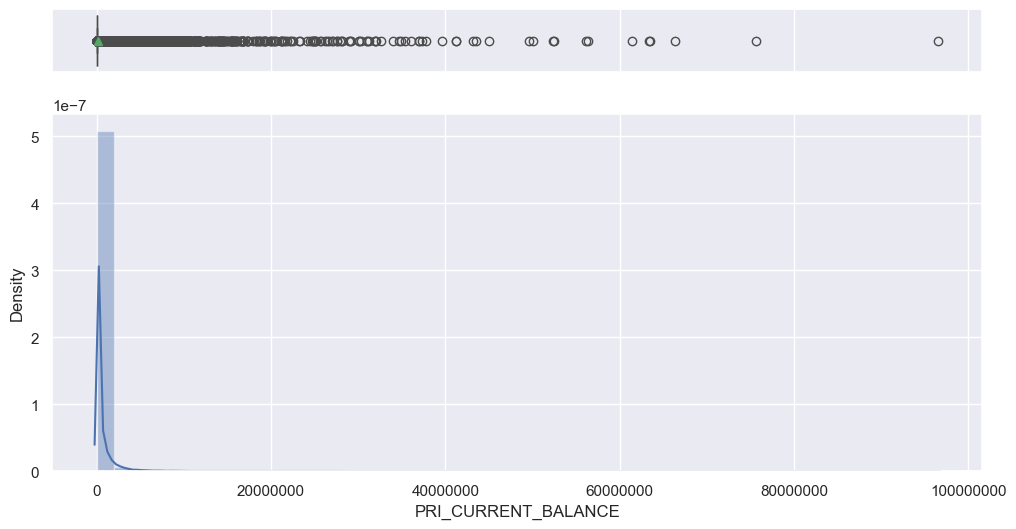

In [61]:
hist_box(df,"PRI_CURRENT_BALANCE")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# PRI_SANCTIONED_AMOUNT


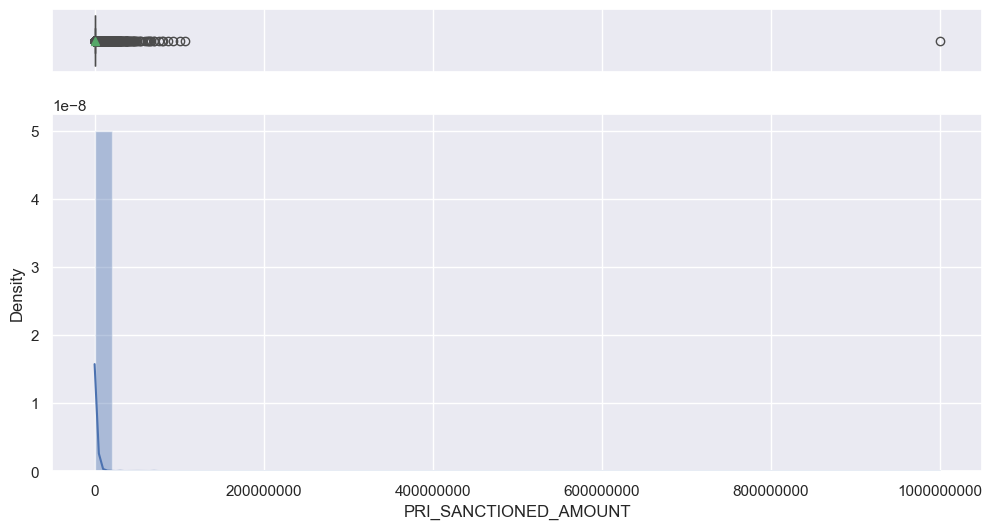

In [62]:
hist_box(df,"PRI_SANCTIONED_AMOUNT")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# PRI_DISBURSED_AMOUNT


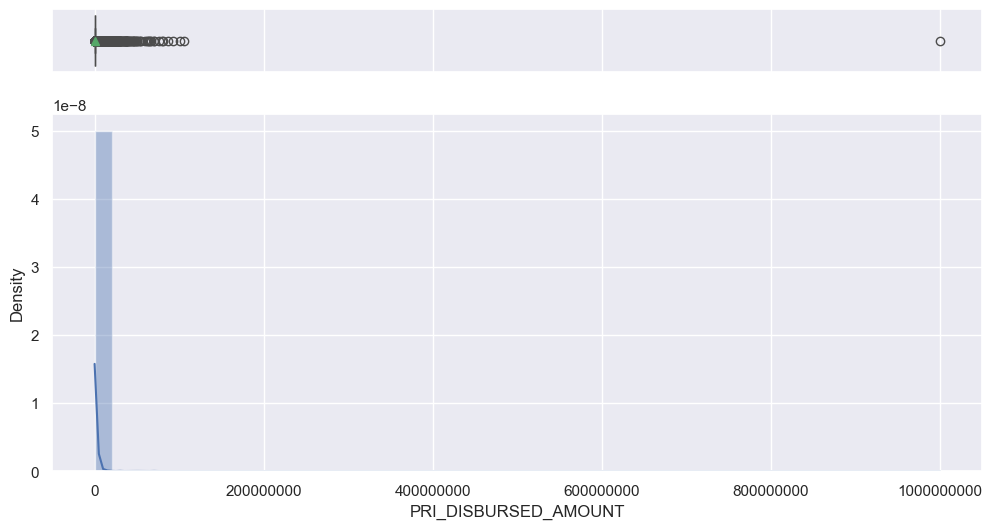

In [63]:
hist_box(df,"PRI_DISBURSED_AMOUNT")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# SEC_NO_OF_ACCTS


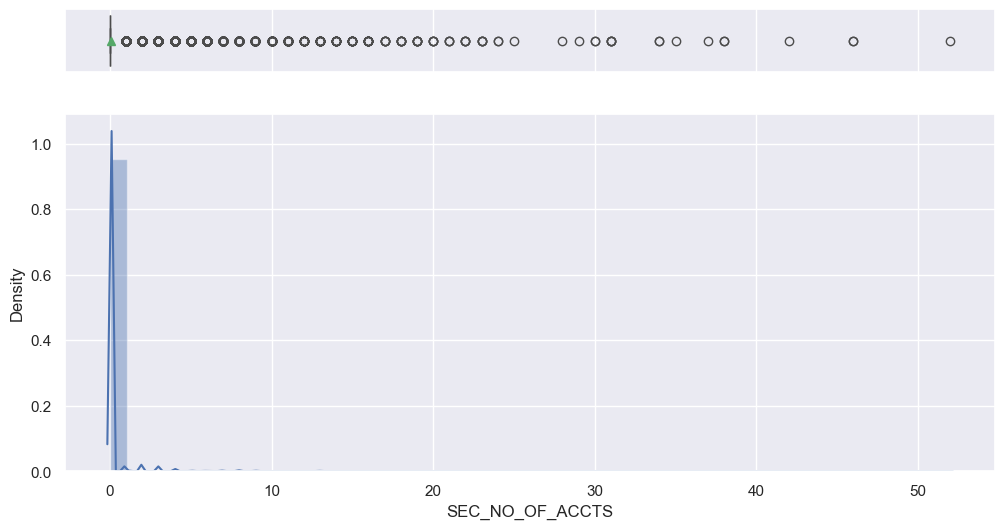

In [64]:
hist_box(df,"SEC_NO_OF_ACCTS")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# SEC_ACTIVE_ACCTS


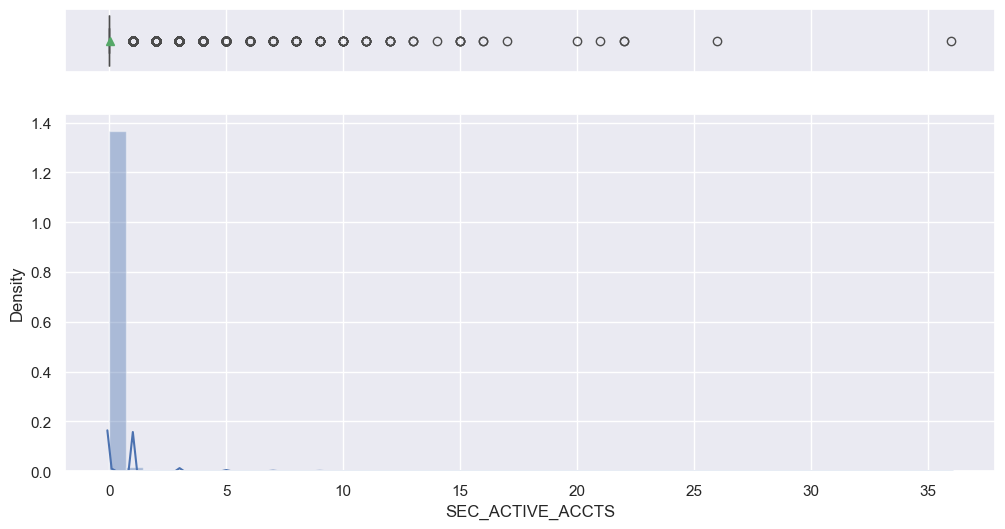

In [65]:
hist_box(df,"SEC_ACTIVE_ACCTS")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# SEC_OVERDUE_ACCTS


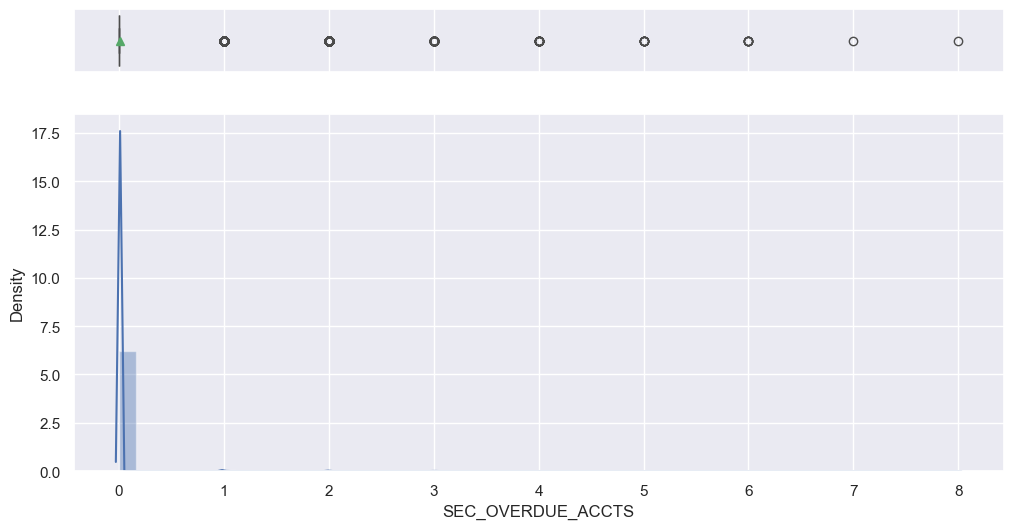

In [66]:
hist_box(df,"SEC_OVERDUE_ACCTS")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# SEC_CURRENT_BALANCE


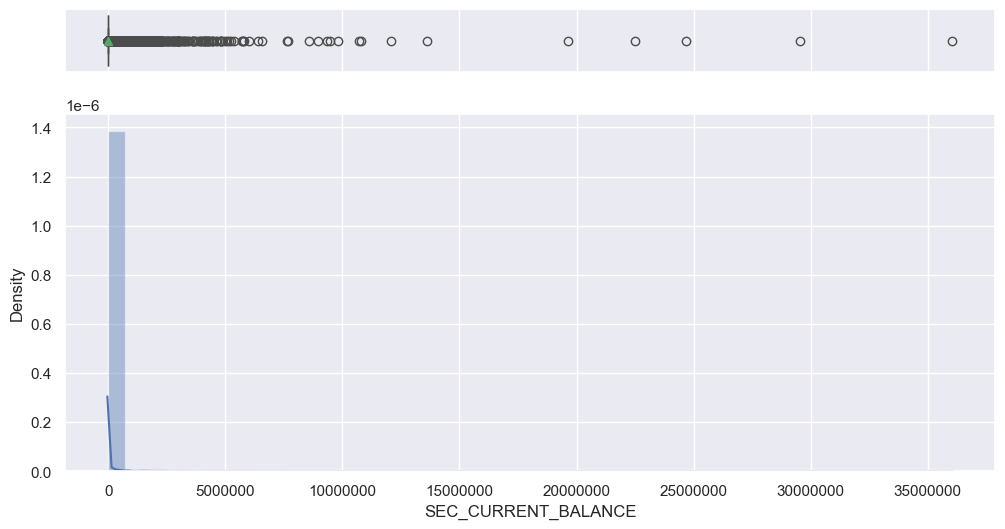

In [67]:
hist_box(df,"SEC_CURRENT_BALANCE")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# SEC_SANCTIONED_AMOUNT


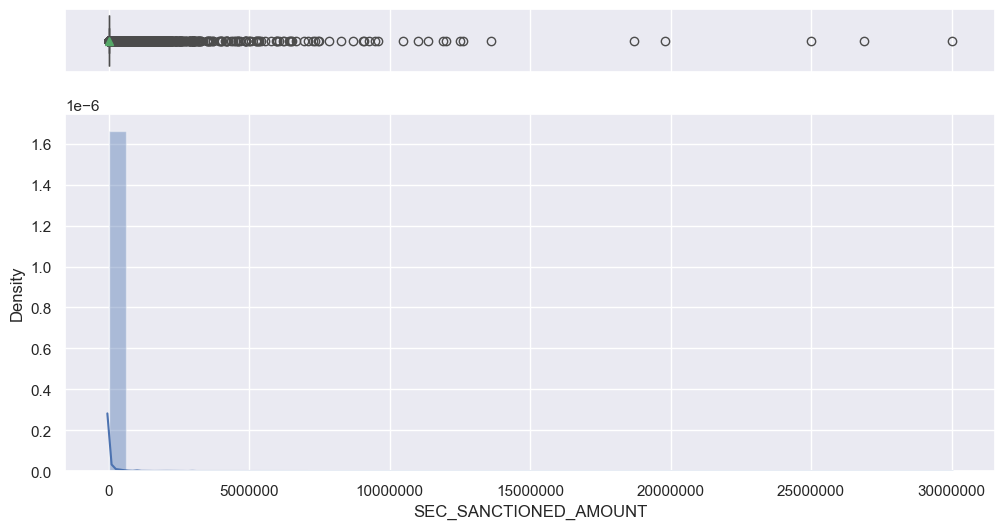

In [68]:
hist_box(df,"SEC_SANCTIONED_AMOUNT")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# SEC_DISBURSED_AMOUNT


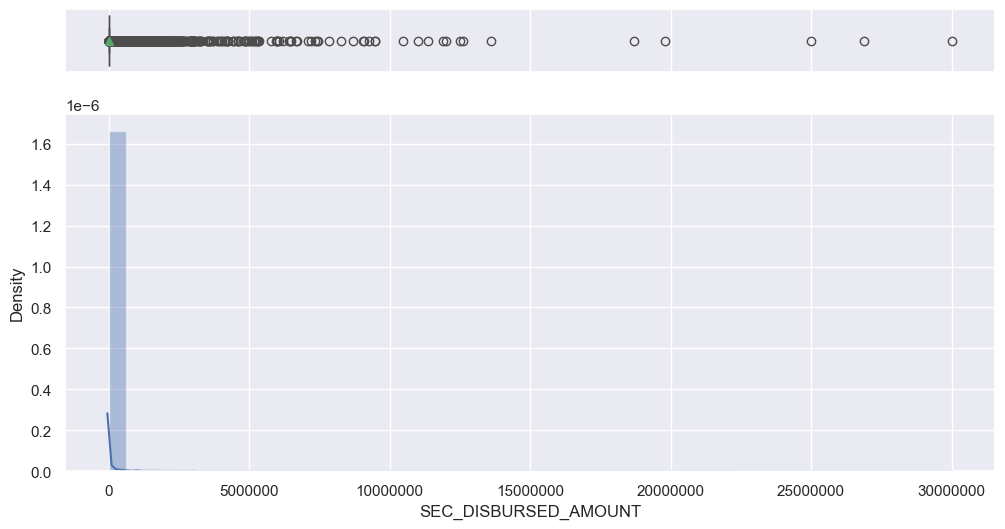

In [69]:
hist_box(df,"SEC_DISBURSED_AMOUNT")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# PRIMARY_INSTAL_AMT


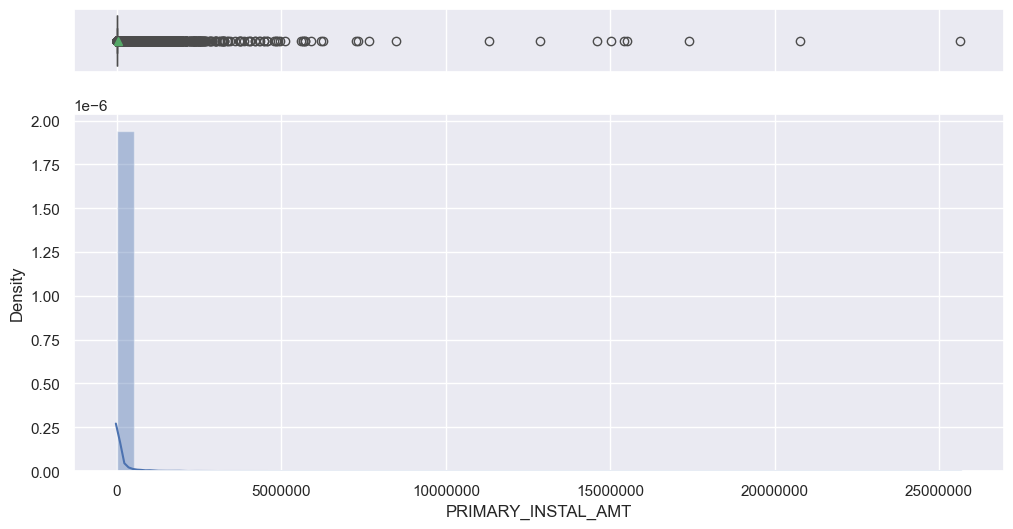

In [70]:
hist_box(df,"PRIMARY_INSTAL_AMT")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# SEC_INSTAL_AMT


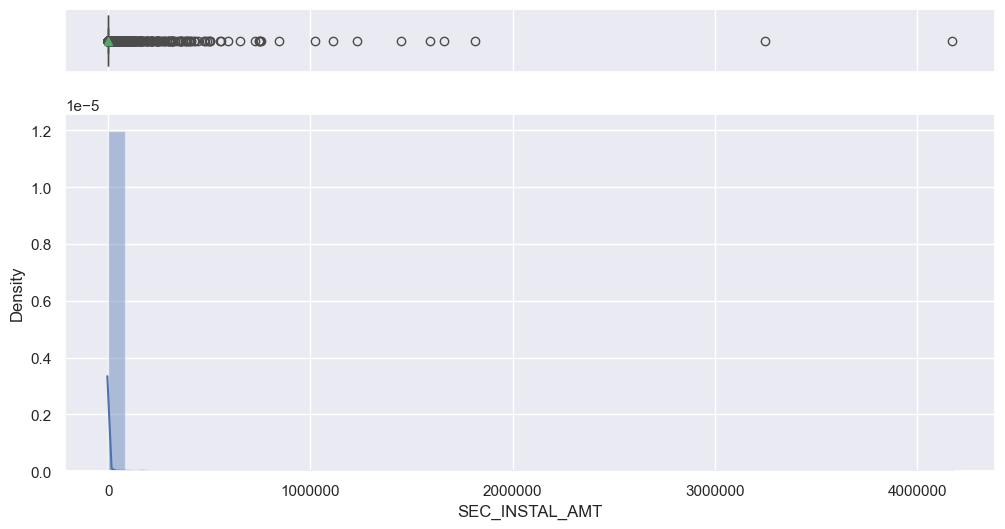

In [71]:
hist_box(df,"SEC_INSTAL_AMT")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.


# NO_OF_INQUIRIES


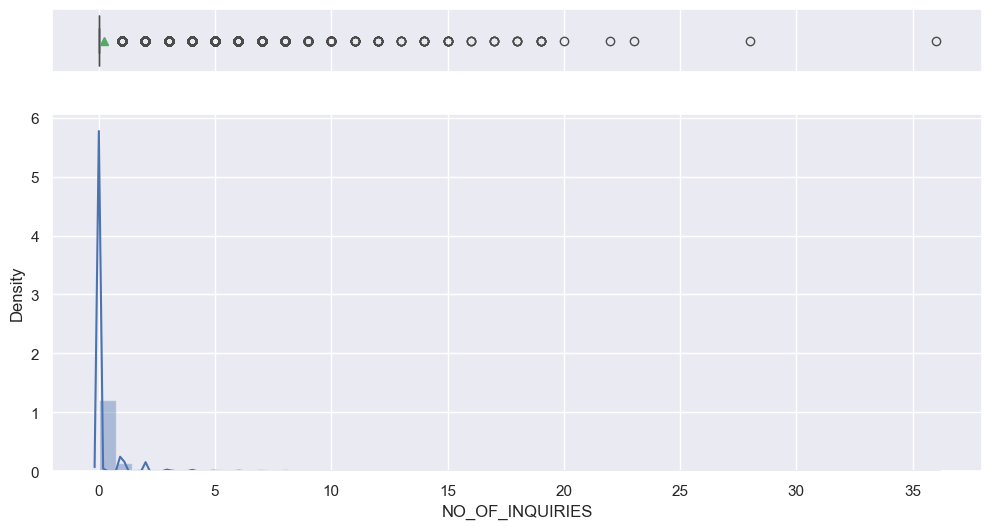

In [72]:
hist_box(df,"NO_OF_INQUIRIES")


En el gráfico se evidencia la concentración de datos en el valor 0 y la presencia de valores atípicos.

BDT2-2 - BDT2-16 https://alkemy-labs.atlassian.net/browse/BDT2-16


# Análisis exploratorio de datos (EDA) II

COMO DS DEVELOPER, QUIERO realizar un análisis exploratorio de datos PARA identificar patrones, tendencias y relaciones relevantes

Criterios de aceptación:

- Realizar un análisis univariado de las variables categoricas.
- Se deben incluir frecuencias.
- Concluciones relevantes documentadas

## DATE_OF_BIRTH


In [73]:
df.DATE_OF_BIRTH.describe()

count                  232645
unique                  15427
top       1988-01-01 00:00:00
freq                     2171
first     1949-09-15 00:00:00
last      2000-12-08 00:00:00
Name: DATE_OF_BIRTH, dtype: object

In [74]:
df.DATE_OF_BIRTH.describe()

count                  232645
unique                  15427
top       1988-01-01 00:00:00
freq                     2171
first     1949-09-15 00:00:00
last      2000-12-08 00:00:00
Name: DATE_OF_BIRTH, dtype: object

* En la variable DATE_OF_BIRTH el 75% de los datos se encuentra entre Septiembre de 1949 y Mayo de 1992


## EMPLOYMENT_TYPE


In [75]:
df.EMPLOYMENT_TYPE.describe()


count            232645
unique                3
top       Self employed
freq             127355
Name: EMPLOYMENT_TYPE, dtype: object

In [76]:
df.EMPLOYMENT_TYPE.value_counts(dropna=False,normalize=True)


Self employed   0.55
Salaried        0.42
S/I             0.03
Name: EMPLOYMENT_TYPE, dtype: float64

* En la variable EMPLOYMENT_TYPE el grupo mayor corresponde a la categoría Self employed correspondiente a un 54,7%
* El grupo Salaried (grupo menor) corresponde a un 41,9%

## AADHAR_FLAG

In [77]:
df.AADHAR_FLAG.describe()

count     232645
unique         2
top            1
freq      195465
Name: AADHAR_FLAG, dtype: int64

In [78]:
df.AADHAR_FLAG.value_counts(dropna=False,normalize=True)

1   0.84
0   0.16
Name: AADHAR_FLAG, dtype: float64

* En la variable AADHAR_FLAG el grupo mayor está representado por la categoría 1 el cual corresponde a un 84%
* El grupo menor representado por la categoría 0 corresponde al 15,9%

## PAN_FLAG

In [79]:
df.PAN_FLAG.describe()


count     232645
unique         2
top            0
freq      215071
Name: PAN_FLAG, dtype: int64

In [80]:
df.PAN_FLAG.value_counts(dropna=False,normalize=True)


0   0.92
1   0.08
Name: PAN_FLAG, dtype: float64

* En la variable PLAN_FLAG el grupo mayor está representado por la categoría 0 el cual corresponde a un 92,4%
* El grupo menor representado por la categoría 1 corresponde al 7,5%

## VOTERID_FLAG


In [81]:
df.VOTERID_FLAG.describe()

count     232645
unique         2
top            0
freq      198896
Name: VOTERID_FLAG, dtype: int64

In [82]:
df.VOTERID_FLAG.value_counts(dropna=False,normalize=True)


0   0.85
1   0.15
Name: VOTERID_FLAG, dtype: float64

* En la variable VOTERID_FLAG el grupo mayor está representado por la categoría 0 el cual corresponde a un 85,5%
* El grupo menor representado por la categoría 1 corresponde al 14,4%

## DRIVING_FLAG


In [83]:
df.DRIVING_FLAG.describe()


count     232645
unique         2
top            0
freq      227240
Name: DRIVING_FLAG, dtype: int64

In [84]:
df.DRIVING_FLAG.value_counts(dropna=False,normalize=True)


0   0.98
1   0.02
Name: DRIVING_FLAG, dtype: float64

* En la variable DRIVING_FLAG el grupo mayor está representado por la categoría 0 el cual corresponde a un 97,6%
* El grupo menor representado por la categoría 1 corresponde al 2,3%

## PASSPORT_FLAG


In [85]:
df.PASSPORT_FLAG.describe()


count     232645
unique         2
top            0
freq      232149
Name: PASSPORT_FLAG, dtype: int64

In [86]:
df.PASSPORT_FLAG.value_counts(dropna=False,normalize=True)


0   1.00
1   0.00
Name: PASSPORT_FLAG, dtype: float64

* En la variable PASSPORT_FLAG el grupo mayor está representado por la categoría 0 el cual corresponde a un 99,7%
* El grupo menor representado por la categoría 1 corresponde al 0,2%

## PERFORM_CNS_SCORE_DESCRIPTION


In [87]:
df.PERFORM_CNS_SCORE_DESCRIPTION.describe()


count                          232645
unique                             20
top       No Bureau History Available
freq                           116941
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: object

In [88]:
df.PERFORM_CNS_SCORE_DESCRIPTION.value_counts(dropna=False,normalize=True)


No Bureau History Available                               0.50
C-Very Low Risk                                           0.07
A-Very Low Risk                                           0.06
D-Very Low Risk                                           0.05
B-Very Low Risk                                           0.04
M-Very High Risk                                          0.04
F-Low Risk                                                0.04
K-High Risk                                               0.04
H-Medium Risk                                             0.03
E-Low Risk                                                0.02
I-Medium Risk                                             0.02
G-Low Risk                                                0.02
Not Scored: Sufficient History Not Available              0.02
J-High Risk                                               0.02
Not Scored: Not Enough Info available on the customer     0.02
Not Scored: No Activity seen on the customer (Inactive)

* En la variable PERFORM_CNS_SCORE_DESCRIPTION el grupo mayor está representado por la categoría "No Bureau History Available" el cual corresponde a un 50%
* El segundo grupo mayor está representada por la categoría "C-Very Low Risk" que corresponde al 6,8%

## AVERAGE_ACCT_AGE


In [89]:
df.AVERAGE_ACCT_AGE.describe()


count        232645
unique          191
top       0yrs 0mon
freq         119370
Name: AVERAGE_ACCT_AGE, dtype: object

In [90]:
df.AVERAGE_ACCT_AGE.value_counts(dropna=False,normalize=True)


0yrs 0mon     0.51
0yrs 6mon     0.03
0yrs 7mon     0.02
0yrs 11mon    0.02
0yrs 10mon    0.02
              ... 
15yrs 3mon    0.00
15yrs 11mon   0.00
14yrs 1mon    0.00
14yrs 5mon    0.00
15yrs 8mon    0.00
Name: AVERAGE_ACCT_AGE, Length: 191, dtype: float64

In [91]:
# Define una función para convertir la duración a meses
def convertir_a_meses(duracion):
        match = re.match(r'(\d+)yrs (\d+)mon', duracion)
        if match:
                anios, meses = map(int, match.groups())
                return anios * 12 + meses
        else:
                return None

# Aplica la función a la columna 'Duracion' para obtener una nueva columna 'DuracionEnMeses'
df['AVERAGE_ACCT_AGE_Meses'] = df['AVERAGE_ACCT_AGE'].apply(convertir_a_meses)
df['CREDIT_HISTORY_LENGTH_Meses'] = df['CREDIT_HISTORY_LENGTH'].apply(convertir_a_meses)

In [92]:
df['AVERAGE_ACCT_AGE_Meses'].describe()

count   232645.00
mean         8.86
std         15.03
min          0.00
25%          0.00
50%          0.00
75%         13.00
max        369.00
Name: AVERAGE_ACCT_AGE_Meses, dtype: float64

* Los datos están agrupados en los meses menores cercanos a 0
* Se puede apreciar que hay valores outliers después del valor 60
* La mayoría de los datos se encuentran entre 0 a 40 meses aproximadamente

## CREDIT_HISTORY_LENGTH


In [93]:
df.CREDIT_HISTORY_LENGTH.describe()


count        232645
unique          294
top       0yrs 0mon
freq         119124
Name: CREDIT_HISTORY_LENGTH, dtype: object

In [94]:
df.CREDIT_HISTORY_LENGTH.value_counts(dropna=False,normalize=True)


0yrs 0mon     0.51
0yrs 6mon     0.02
2yrs 1mon     0.02
0yrs 7mon     0.02
2yrs 0mon     0.02
              ... 
21yrs 8mon    0.00
30yrs 7mon    0.00
18yrs 8mon    0.00
20yrs 4mon    0.00
22yrs 10mon   0.00
Name: CREDIT_HISTORY_LENGTH, Length: 294, dtype: float64

In [95]:
df.CREDIT_HISTORY_LENGTH_Meses.value_counts(dropna=False,normalize=True)


0     0.51
6     0.02
25    0.02
7     0.02
24    0.02
      ... 
260   0.00
367   0.00
224   0.00
244   0.00
274   0.00
Name: CREDIT_HISTORY_LENGTH_Meses, Length: 294, dtype: float64

* Los datos están agrupados en los meses menores cercanos a 0
* Se puede apreciar que hay valores outliers después del valor 80
* La mayoría de los datos se encuentran entre 0 a 50 meses aproximadamente

## LOAN_DEFAULT


In [96]:
df.LOAN_DEFAULT.describe()


count     232645
unique         2
top            0
freq      182106
Name: LOAN_DEFAULT, dtype: int64

In [97]:
df.LOAN_DEFAULT.value_counts(dropna=False,normalize=True)


0   0.78
1   0.22
Name: LOAN_DEFAULT, dtype: float64

* En la variable LOAN_DEFAULT el grupo mayor está representado por la categoría 0 el cual corresponde a un 78,2%
* El grupo menor representado por la categoría 1 corresponde al 21,7%

BDT2-2 - BDT2-18 https://alkemy-labs.atlassian.net/browse/BDT2-18

## Visualización inicial de datos II

COMO DS DEVELOPER , QUIERO hacer una visualizacion de datos PARA complementar el análisis previo,

Criterios de aceptación:
- Sobre el análisis univariado de las variables categoricas
- Se deben realizar graficos de barras, Pie plots, Grafico de frecuencia, frecuencia acumulada  y otras mas graficas que consideren oportunas para apoyar la los resultados obtenidos

## DATE_OF_BIRTH


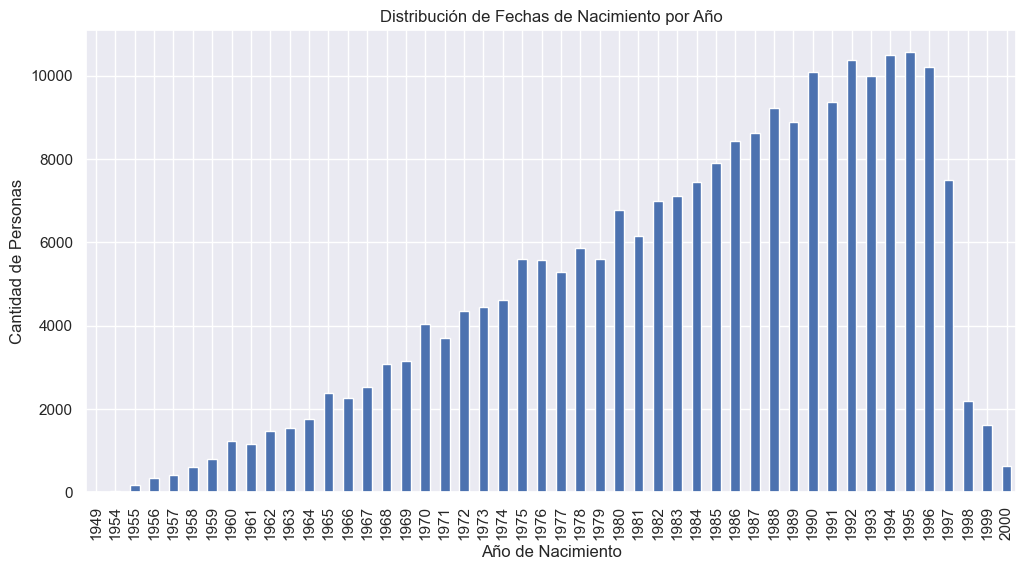

In [98]:
coso = ['DATE_OF_BIRTH', 'DISBURSAL_DATE']

for i in coso:
        df[i] = pd.to_datetime(df[i], format='%d-%m-%Y')

df['YEAR_OF_BIRTH'] = df['DATE_OF_BIRTH'].dt.year

prueba = df['YEAR_OF_BIRTH'].value_counts().sort_index()

prueba.plot(kind='bar', figsize=(12, 6))
plt.title('Distribución de Fechas de Nacimiento por Año')
plt.xlabel('Año de Nacimiento')
plt.ylabel('Cantidad de Personas')
plt.show()

## EMPLOYMENT_TYPE


<Axes: xlabel='EMPLOYMENT_TYPE', ylabel='count'>

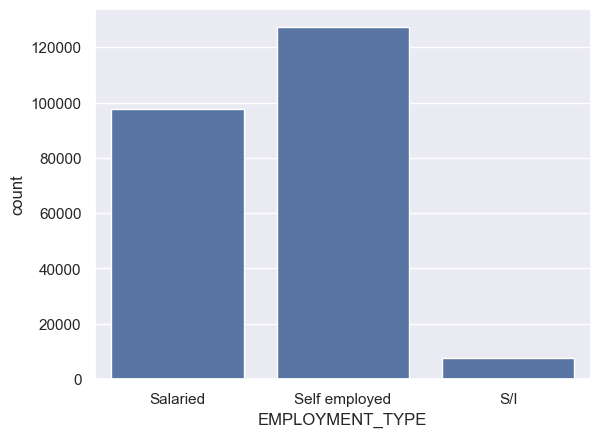

In [99]:
sns.countplot(x=df['EMPLOYMENT_TYPE'])

## AADHAR_FLAG

<Axes: xlabel='AADHAR_FLAG', ylabel='count'>

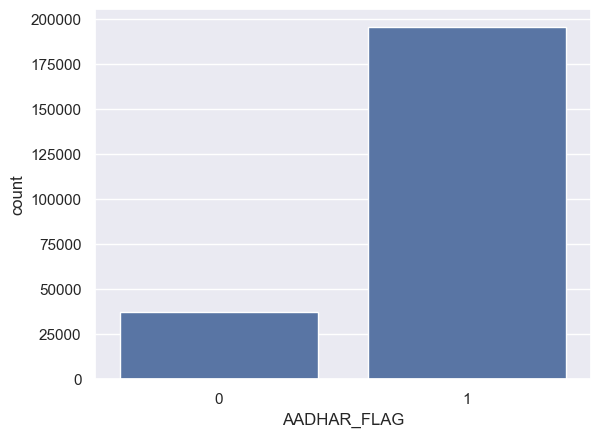

In [100]:
sns.countplot(x=df['AADHAR_FLAG'])

## PAN_FLAG


<Axes: xlabel='PAN_FLAG', ylabel='count'>

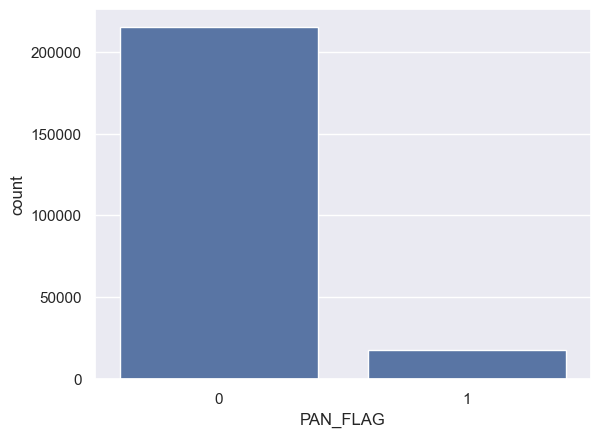

In [101]:
sns.countplot(x=df['PAN_FLAG'])

## VOTERID_FLAG


<Axes: xlabel='VOTERID_FLAG', ylabel='count'>

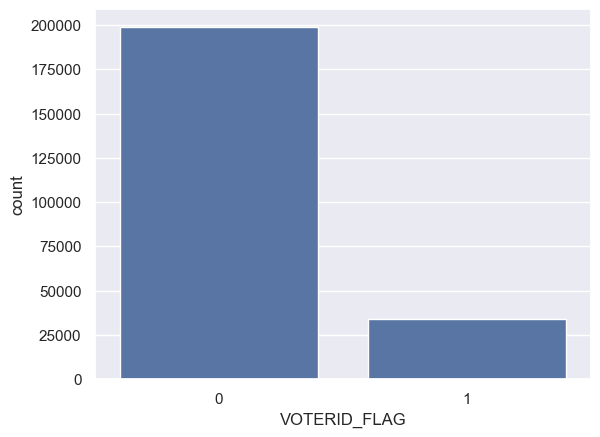

In [102]:
sns.countplot(x=df['VOTERID_FLAG'])


## DRIVING_FLAG


<Axes: xlabel='DRIVING_FLAG', ylabel='count'>

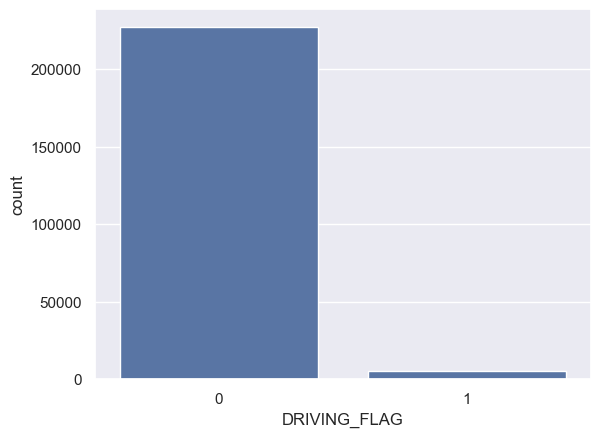

In [103]:
sns.countplot(x=df['DRIVING_FLAG'])


## PASSPORT_FLAG


<Axes: xlabel='PASSPORT_FLAG', ylabel='count'>

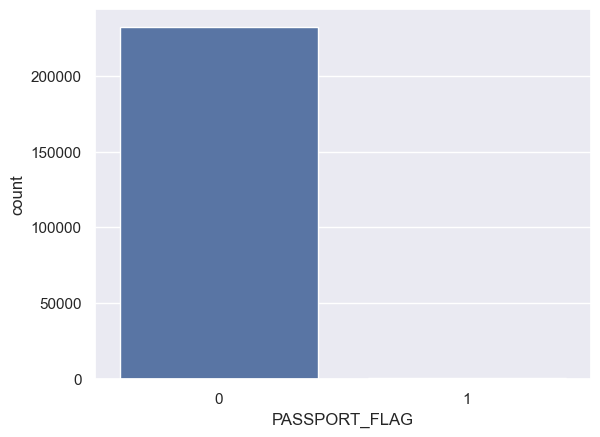

In [104]:
sns.countplot(x=df['PASSPORT_FLAG'])


## PERFORM_CNS_SCORE_DESCRIPTION


<Axes: xlabel='count', ylabel='PERFORM_CNS_SCORE_DESCRIPTION'>

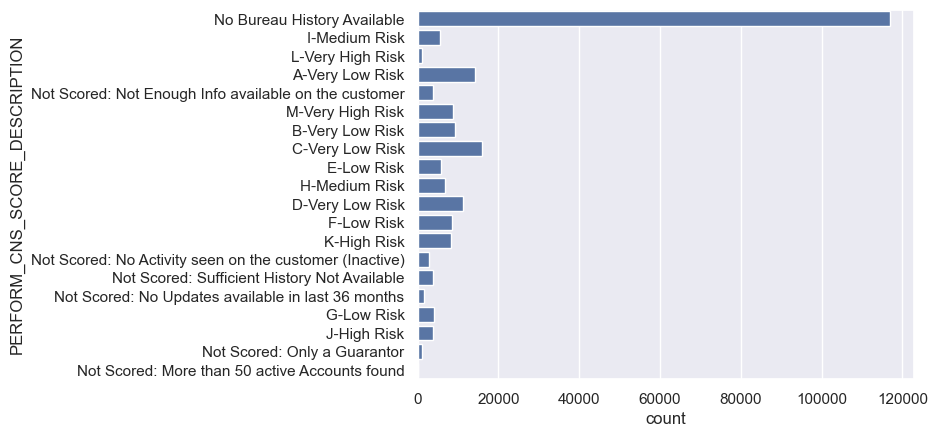

In [105]:
sns.countplot(y=df['PERFORM_CNS_SCORE_DESCRIPTION'])


## AVERAGE_ACCT_AGE


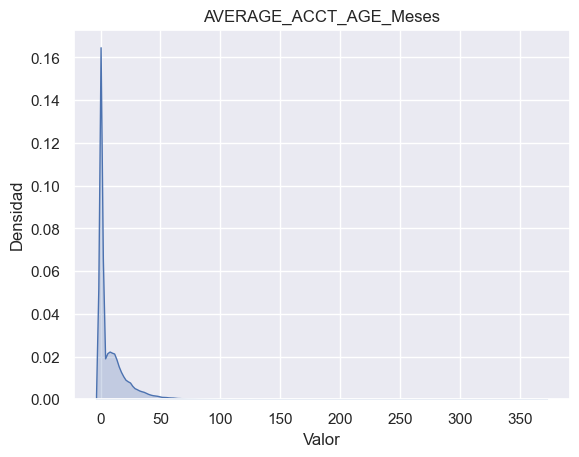

In [106]:
sns.kdeplot(df['AVERAGE_ACCT_AGE_Meses'], shade=True)
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("AVERAGE_ACCT_AGE_Meses")
plt.show()

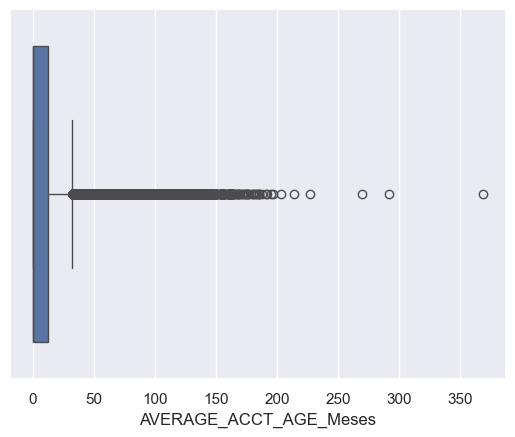

In [107]:
g = sns.boxplot(x=df["AVERAGE_ACCT_AGE_Meses"])

## CREDIT_HISTORY_LENGTH


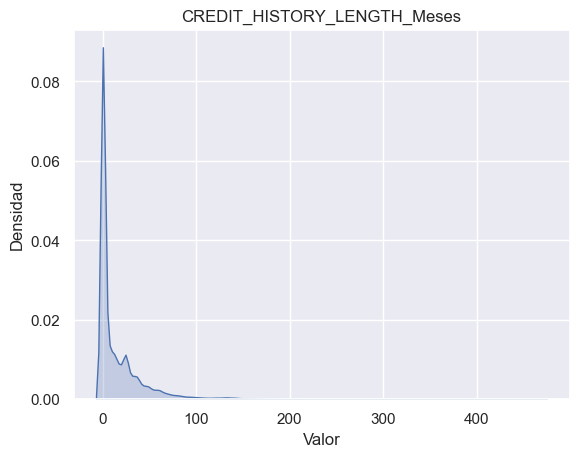

In [108]:
sns.kdeplot(df['CREDIT_HISTORY_LENGTH_Meses'], shade=True)
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("CREDIT_HISTORY_LENGTH_Meses")
plt.show()

## LOAN_DEFAULT


<Axes: xlabel='LOAN_DEFAULT', ylabel='count'>

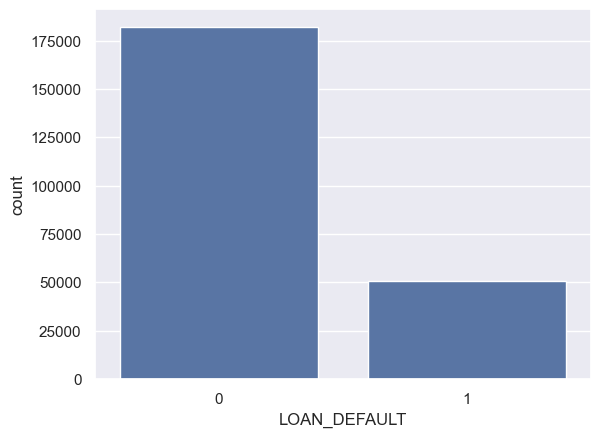

In [109]:
sns.countplot(x=df['LOAN_DEFAULT'])


# Decima Parte

BDT2-2 - BDT2-19 https://alkemy-labs.atlassian.net/browse/BDT2-19

# Análisis exploratorio de datos (EDA) III

COMO DS DEVELOPER , QUIERO hacer una exploracion de datos PARA complementar el análisis previo y seleccionar las features mas relevantes

Criterios de aceptación:
- Relizar un análisis bi-variado entre las features y el target:
        -Hacer los graficos necesarios para entender como se distribuye la variable objetivo en las diferentes variables.

- Se sugiere que se repartan un grupo de features entre A, B C y D para que analicen el comportamiento de las features con respecto al target

In [110]:
def stacked_barplot(data,predictor,target,figsize=(10,6)):
        (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
        plt.legend(loc="lower right")
        plt.ylabel('porcentaje buenos clientes %')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232645 entries, 0 to 233153
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UNIQUEID                             232645 non-null  int64         
 1   DISBURSED_AMOUNT                     232645 non-null  int64         
 2   ASSET_COST                           232645 non-null  int64         
 3   LTV                                  232645 non-null  float64       
 4   BRANCH_ID                            232645 non-null  int64         
 5   SUPPLIER_ID                          232645 non-null  int64         
 6   MANUFACTURER_ID                      232645 non-null  int64         
 7   CURRENT_PINCODE_ID                   232645 non-null  int64         
 8   DATE_OF_BIRTH                        232645 non-null  datetime64[ns]
 9   EMPLOYMENT_TYPE                      232645 non-null  object        
 

# AADHAR_FLAG

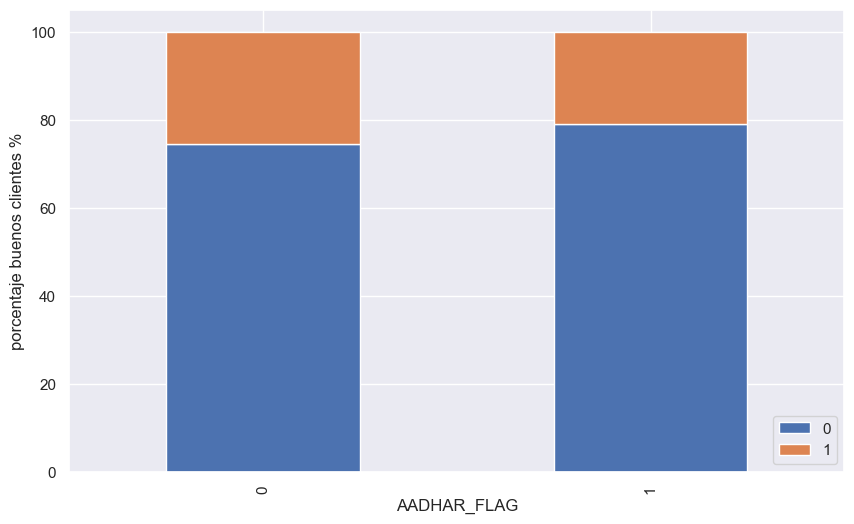

In [112]:
stacked_barplot(df, "AADHAR_FLAG", "LOAN_DEFAULT" )

- No se muestra una diferencia significativa da la variable AADHAR_FLAG con respecto a la variable objetivo

# PAN_FLAG

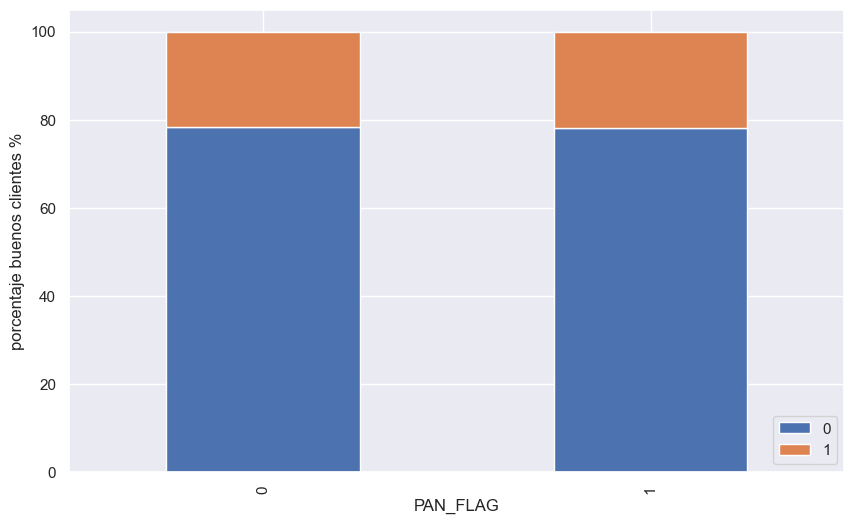

In [113]:
stacked_barplot(df, "PAN_FLAG", "LOAN_DEFAULT" )

- No se muestra una diferencia significativa da la variable PAN_FLAG con respecto a la variable objetivo

# VOTERID_FLAG

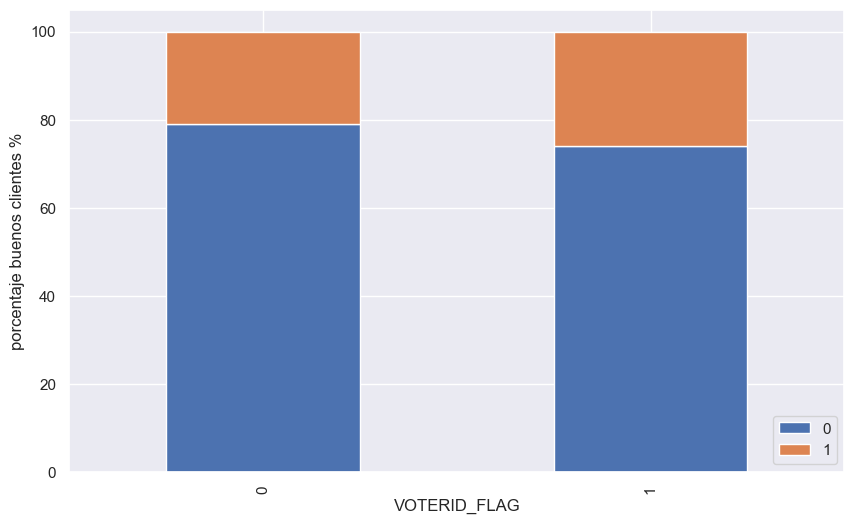

In [114]:
stacked_barplot(df, "VOTERID_FLAG", "LOAN_DEFAULT" )

- hay una leve inclinacion de que los valores 1 de la variable VOTERID_FLAG tengan mas condiciones 1 de la variable respuesta.

# DRIVING_FLAG

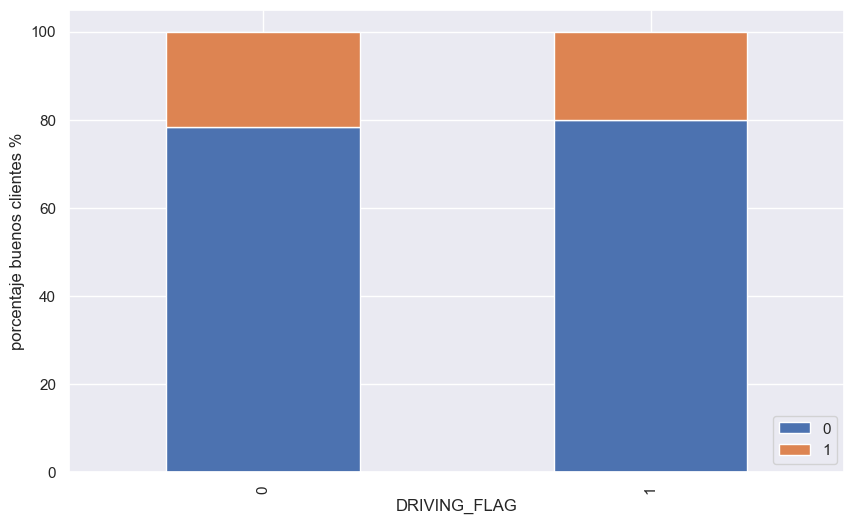

In [115]:
stacked_barplot(df, "DRIVING_FLAG", "LOAN_DEFAULT" )

- No se muestra una diferencia significativa da la variable DRIVING_FLAG con respecto a la variable objetivo


# PASSPORT_FLAG

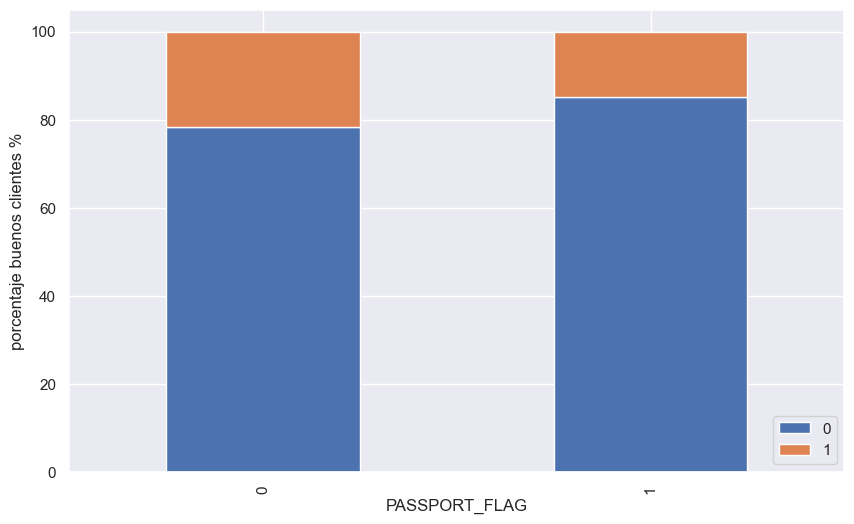

In [116]:
stacked_barplot(df, "PASSPORT_FLAG", "LOAN_DEFAULT" )

- hay una leve inclinacion de que los valores 0 de la variable PASSPORT_FLAG tengan mas condiciones 1 de la variable respuesta.

# CREDIT_HISTORY_LENGTH

In [117]:
#Separar para años y meses

df[['Años', 'Meses']] = df['CREDIT_HISTORY_LENGTH'].str.split(' ', expand=True)
df['Años'] = df['Años'].str.extract('(\d+)').astype(int)
df['Meses'] = df['Meses'].str.extract('(\d+)').astype(int)
df

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST   LTV  BRANCH_ID  SUPPLIER_ID  \
0         420825             50578       58400 89.55         67        22807   
1         537409             47145       65550 73.23         67        22807   
2         417566             53278       61360 89.63         67        22807   
3         624493             57513       66113 88.48         67        22807   
4         539055             52378       60300 88.39         67        22807   
...          ...               ...         ...   ...        ...          ...   
233149    626432             63213      105405 60.72         34        20700   
233150    606141             73651      100600 74.95         34        23775   
233151    613658             33484       71212 48.45         77        22186   
233152    548084             34259       73286 49.10         77        22186   
233153    630213             75751      116009 66.81         77        22186   

        MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0                    45                1441    1984-01-01        Salaried   
1                    45                1502    1985-07-31   Self employed   
2                    45                1497    1985-08-24   Self employed   
3                    45                1501    1993-12-30   Self employed   
4                    45                1495    1977-09-12   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050    1988-01-08        Salaried   
233150               51                 990    1988-05-12   Self employed   
233151               86                2299    1976-01-06        Salaried   
233152               86                2299    1994-03-26        Salaried   
233153               86                2299    1984-02-18        Salaried   

        ... DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  AVERAGE_ACCT_AGE  \
0       ...                                   0         0yrs 0mon   
1       ...                                   1        1yrs 11mon   
2       ...                                   0         0yrs 0mon   
3       ...                                   0         0yrs 8mon   
4       ...                                   0         0yrs 0mon   
...     ...                                 ...               ...   
233149  ...                                   0         1yrs 9mon   
233150  ...                                   0         0yrs 6mon   
233151  ...                                   0         0yrs 0mon   
233152  ...                                   0         0yrs 0mon   
233153  ...                                   0         0yrs 0mon   

        CREDIT_HISTORY_LENGTH NO_OF_INQUIRIES LOAN_DEFAULT  \
0                   0yrs 0mon               0            0   
1                  1yrs 11mon               0            1   
2                   0yrs 0mon               0            0   
3                   1yrs 3mon               1            1   
4                   0yrs 0mon               1            1   
...                       ...             ...          ...   
233149              3yrs 3mon               0            0   
233150              0yrs 6mon               0            0   
233151              0yrs 0mon               0            0   
233152              0yrs 0mon               0            0   
233153              0yrs 0mon               0            0   

       AVERAGE_ACCT_AGE_Meses CREDIT_HISTORY_LENGTH_Meses YEAR_OF_BIRTH  Años  \
0                           0                           0          1984     0   
1                          23                          23          1985     1   
2                           0                           0          1985     0   
3                           8                          15          1993     1   
4                           0                           0          1977     0   
...                       ...                         ...     

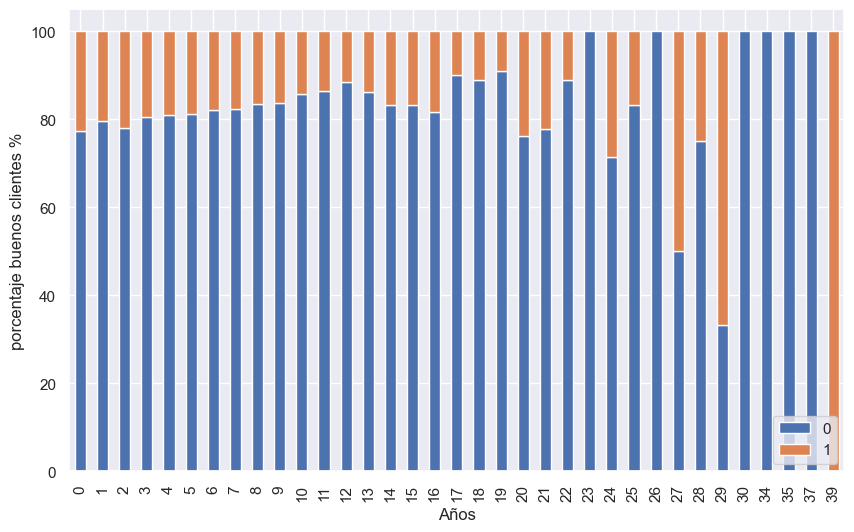

In [118]:
stacked_barplot(df, "Años", "LOAN_DEFAULT" )

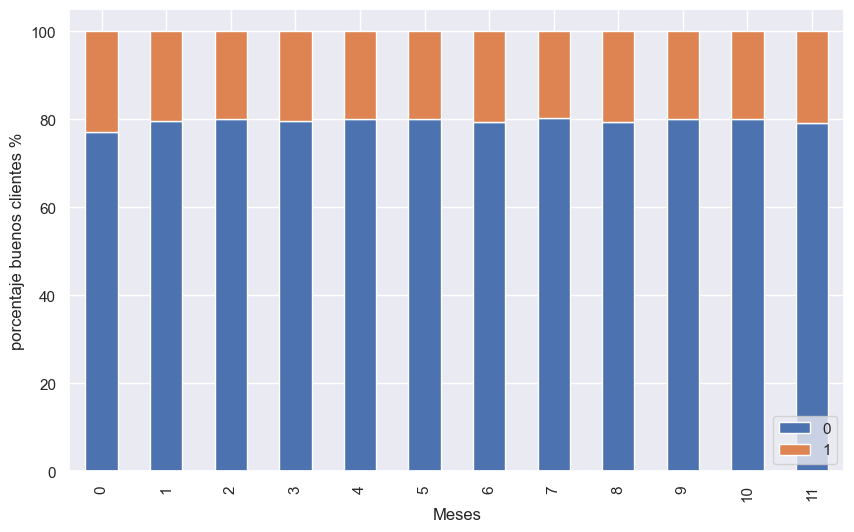

In [119]:
stacked_barplot(df, "Meses", "LOAN_DEFAULT" )

- La variable CREDIT_HISTORY_LENGTH entre los años 30 al 37 solo presenta valores 0 pero para el año 39 pasa lo contrario mostrando solo valores 1
- En el año 29 tenemos la segunda mayor cantidad de valores 1 siguiendolo el año 27
- desde el año 0 al 12 hay una tendencia a disminuir de los valores 1.

# AVERAGE_ACCT_AGE

In [120]:
#Separar para años y meses

df[['Años_av', 'Meses_av']] = df['AVERAGE_ACCT_AGE'].str.split(' ', expand=True)
df['Años_av'] = df['Años_av'].str.extract('(\d+)').astype(int)
df['Meses_av'] = df['Meses_av'].str.extract('(\d+)').astype(int)
df

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST   LTV  BRANCH_ID  SUPPLIER_ID  \
0         420825             50578       58400 89.55         67        22807   
1         537409             47145       65550 73.23         67        22807   
2         417566             53278       61360 89.63         67        22807   
3         624493             57513       66113 88.48         67        22807   
4         539055             52378       60300 88.39         67        22807   
...          ...               ...         ...   ...        ...          ...   
233149    626432             63213      105405 60.72         34        20700   
233150    606141             73651      100600 74.95         34        23775   
233151    613658             33484       71212 48.45         77        22186   
233152    548084             34259       73286 49.10         77        22186   
233153    630213             75751      116009 66.81         77        22186   

        MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0                    45                1441    1984-01-01        Salaried   
1                    45                1502    1985-07-31   Self employed   
2                    45                1497    1985-08-24   Self employed   
3                    45                1501    1993-12-30   Self employed   
4                    45                1495    1977-09-12   Self employed   
...                 ...                 ...           ...             ...   
233149               48                1050    1988-01-08        Salaried   
233150               51                 990    1988-05-12   Self employed   
233151               86                2299    1976-01-06        Salaried   
233152               86                2299    1994-03-26        Salaried   
233153               86                2299    1984-02-18        Salaried   

        ... CREDIT_HISTORY_LENGTH  NO_OF_INQUIRIES  LOAN_DEFAULT  \
0       ...             0yrs 0mon                0             0   
1       ...            1yrs 11mon                0             1   
2       ...             0yrs 0mon                0             0   
3       ...             1yrs 3mon                1             1   
4       ...             0yrs 0mon                1             1   
...     ...                   ...              ...           ...   
233149  ...             3yrs 3mon                0             0   
233150  ...             0yrs 6mon                0             0   
233151  ...             0yrs 0mon                0             0   
233152  ...             0yrs 0mon                0             0   
233153  ...             0yrs 0mon                0             0   

       AVERAGE_ACCT_AGE_Meses CREDIT_HISTORY_LENGTH_Meses YEAR_OF_BIRTH Años  \
0                           0                           0          1984    0   
1                          23                          23          1985    1   
2                           0                           0          1985    0   
3                           8                          15          1993    1   
4                           0                           0          1977    0   
...                       ...                         ...           ...  ...   
233149                     21                          39          1988    3   
233150                      6                           6          1988    0   
233151                      0                           0          1976    0   
233152                      0                           0          1994    0   
233153                      0                           0          1984    0   

       Meses  Años_av Meses_av  
0          0        0        0  
1         11        1       11  
2          0        0        0  
3          3        0        8  
4          0        0        0  
...      ...      ...      ...  
233149     3        1        9  
233150     6        0        6  
233151     0        0        0  
233152     0  

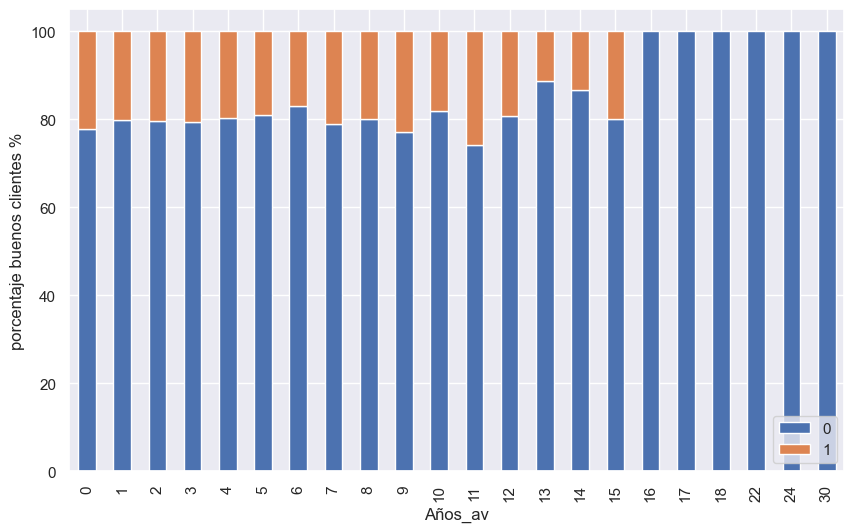

In [121]:
stacked_barplot(df, "Años_av", "LOAN_DEFAULT" )

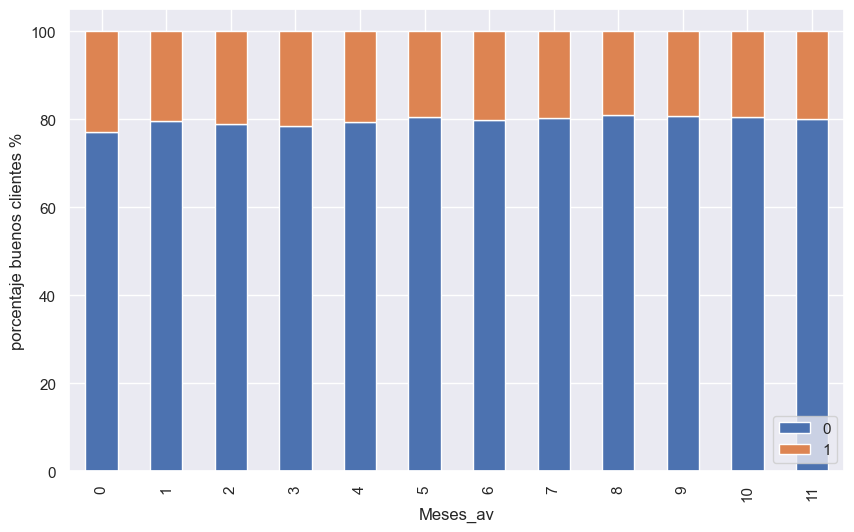

In [122]:
stacked_barplot(df, "Meses_av", "LOAN_DEFAULT" )

- la variable AVERAGE_ACCT_AGE al separarla por solo los años muestra que a partir del año 16 en adelante solo marca valores de categoria 0
- en cuanto a solo los meses no presenta mayor diferencia manteniendo la misma tendencia

# PERFORM_CNS_SCORE_DESCRIPTION

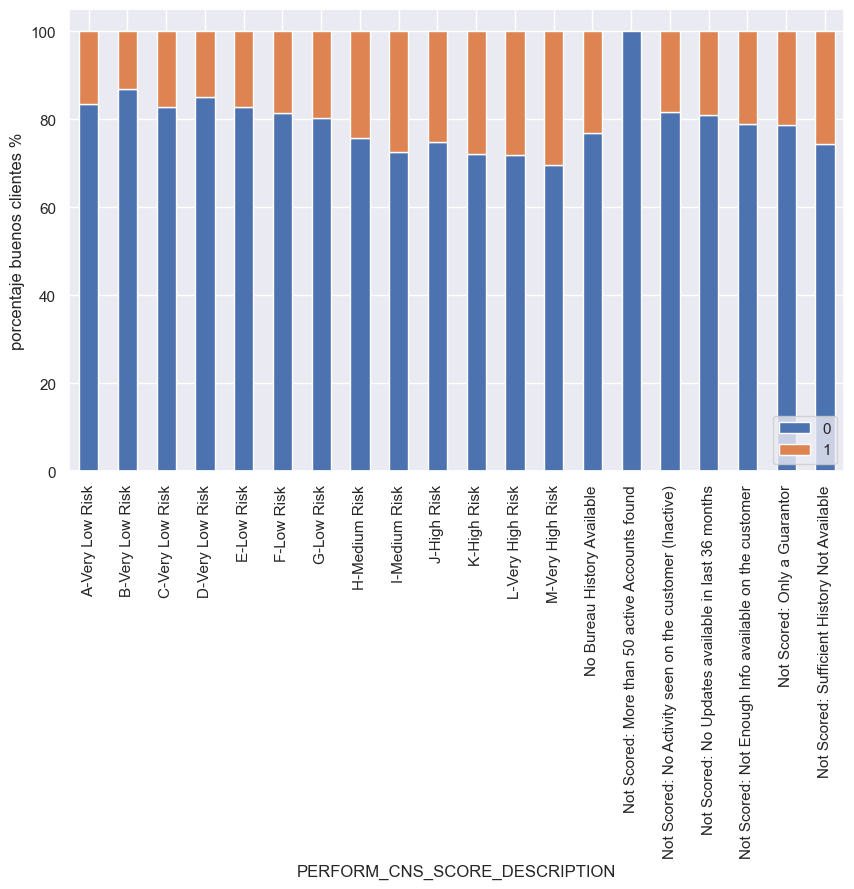

In [123]:
stacked_barplot(df, "PERFORM_CNS_SCORE_DESCRIPTION", "LOAN_DEFAULT" )


- La Variable PERFORM_CNS_SCORE_DESCRIPTION presenta solo valores 0 en la categoria "Not Scored: More than 50 active Accounts found"
- La Categoria con mas valores 1 es "M-Very Hight Risk", esto a su vez que la tendencia es que todas las "Very Hight Risk" tienen mas 1 que el resto de categorias.
- Caso contrario las "Very Low Risk" donde se ve una disminucion de los valores 1

# EMPLOYMENT_TYPE

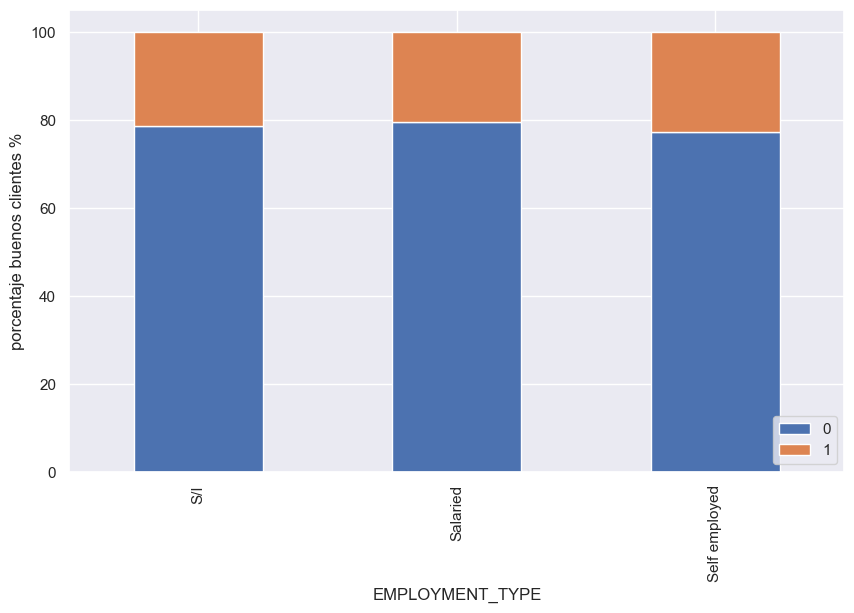

In [124]:
stacked_barplot(df, "EMPLOYMENT_TYPE", "LOAN_DEFAULT" )

In [125]:
#Histograma de 0 y 1 para realizar en las distintas variables

def meee(data, column_name):
        plt.figure(figsize=(12, 6))
        sns.distplot(data[data['LOAN_DEFAULT'] == 0][column_name], label='LOAN_DEFAULT = 0')
        sns.distplot(data[data['LOAN_DEFAULT'] == 1][column_name], label='LOAN_DEFAULT = 1')

        plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        plt.gca().ticklabel_format(style='plain', axis='x')

        plt.legend()
        plt.show()

# ASSET_COST

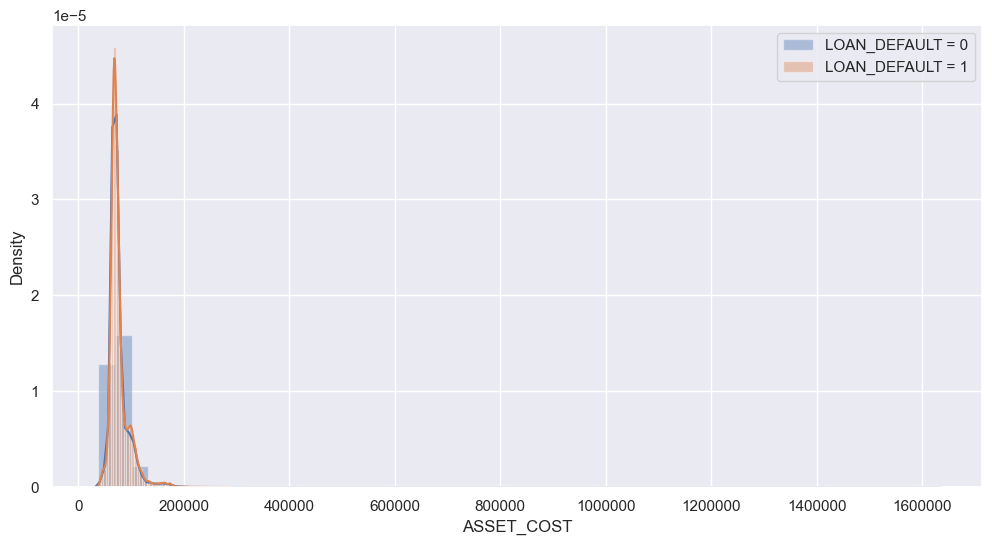

In [126]:
meee(df,'ASSET_COST')

- Se ve una distribucion similar entre las dos categorias para la variable "ASSET_COST"

# DISBURSED_AMOUNT

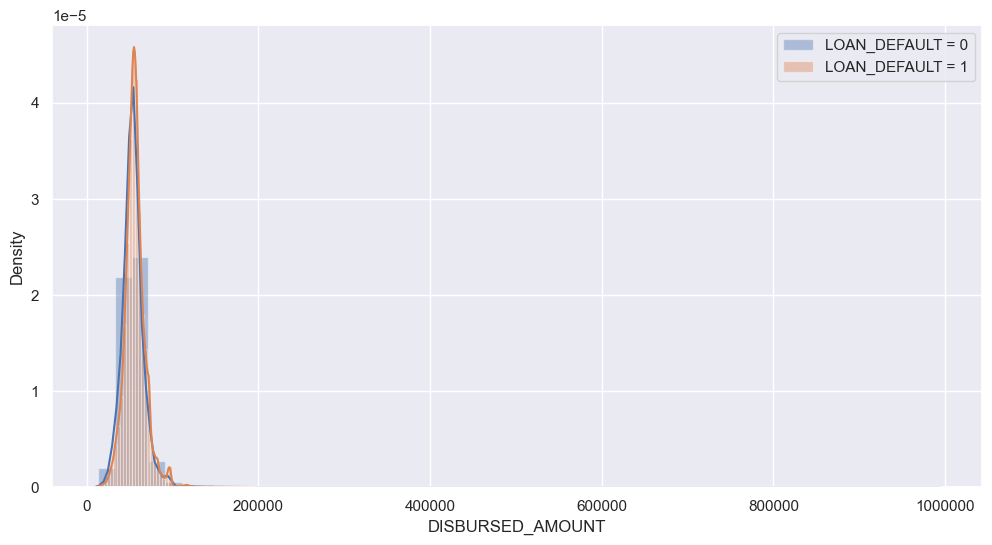

In [127]:
meee(df,'DISBURSED_AMOUNT')

- Se ve una distribucion similar entre las dos categorias para la variable "DISBURSED_AMOUNT"


# LTV

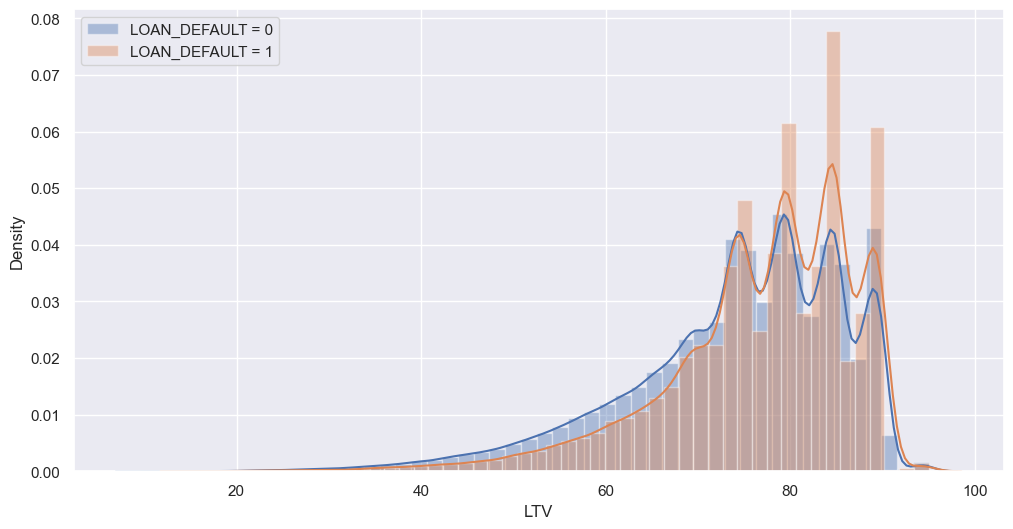

In [128]:
meee(df,'LTV')

- Se ve una distribucion similar entre las dos categorias para la variable “LTV”

# BRANCH_ID

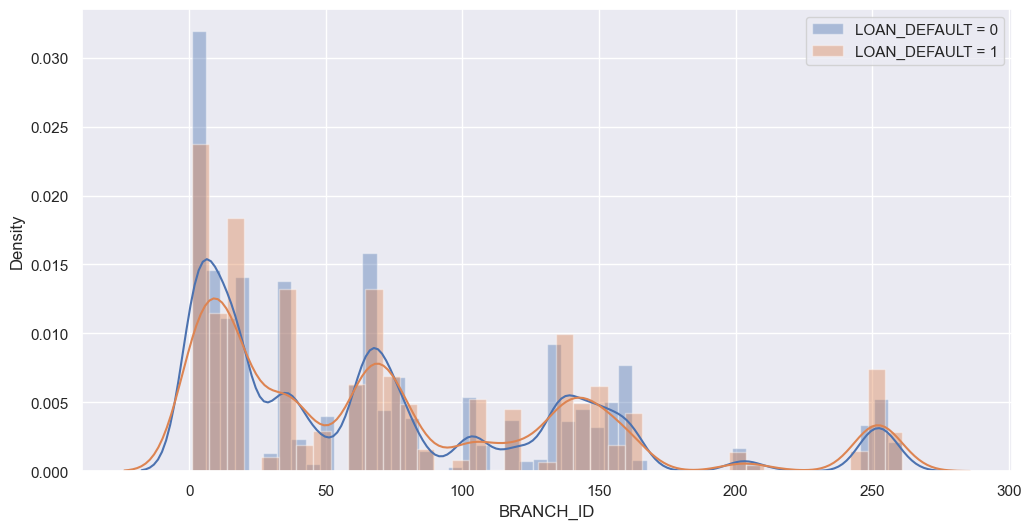

In [129]:
meee(df,'BRANCH_ID')

- Se ve una distribucion similar entre las dos categorias para la variable “BRANCH_ID”

# SUPPLIER_ID

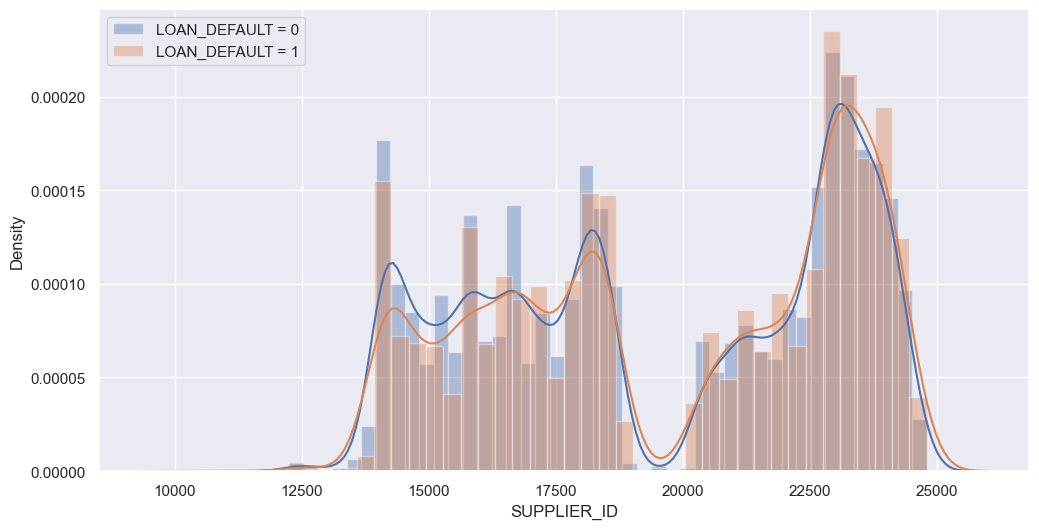

In [130]:
meee(df,'SUPPLIER_ID')

- Se ve una distribucion similar entre las dos categorias para la variable “SUPPLIER_ID”

# MANUFACTURER_ID

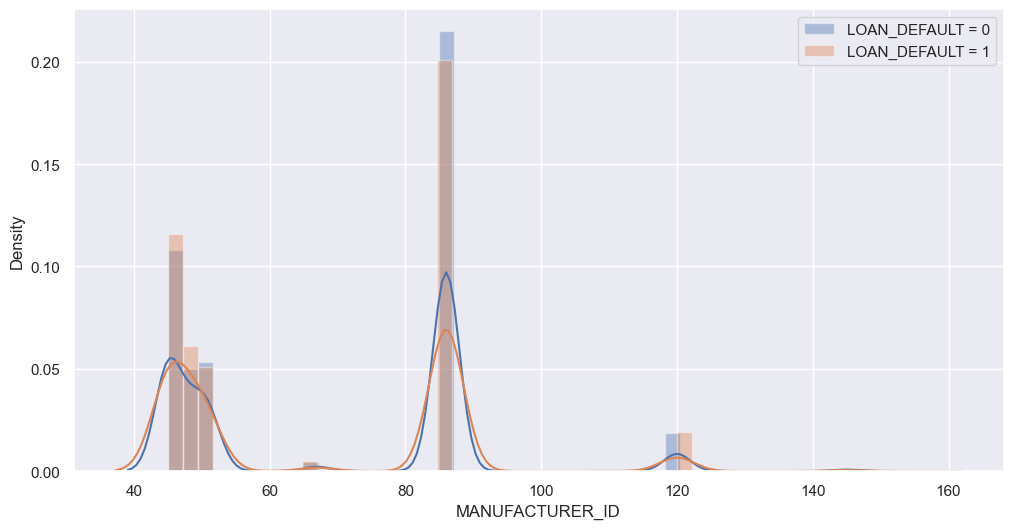

In [131]:
meee(df,'MANUFACTURER_ID')

- Se ve una distribucion similar entre las dos categorias para la variable “MANUFACTURER_ID”

# CURRENT_PINCODE_ID

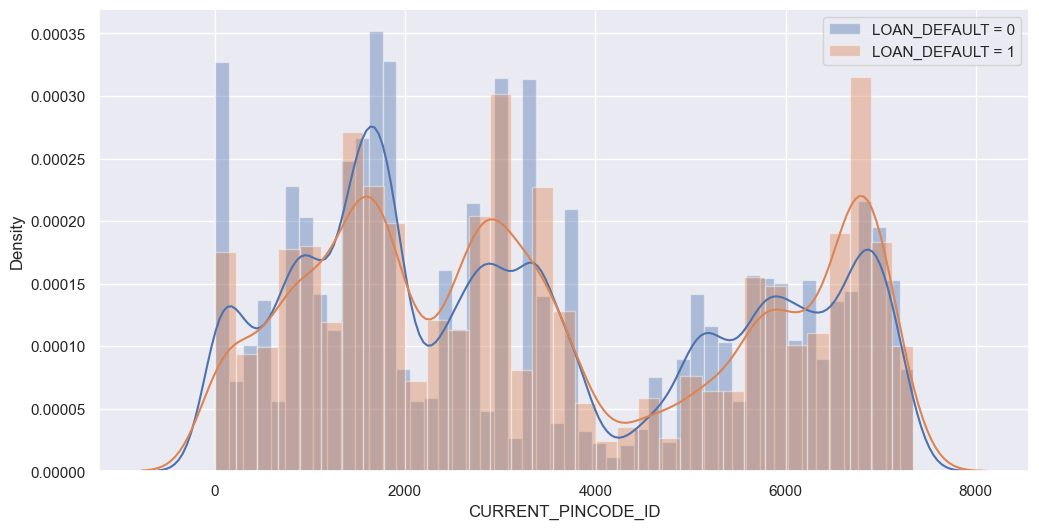

In [132]:
meee(df,'CURRENT_PINCODE_ID')

- Se ve una diferencia para la categoria 0 en donde tiende a tomar mas valores bajos mientras que la categoria 1 toma relevancia en valores altos.
- A pesar de esto no es relevante para ver la diferencia propiamente tal de las dos categorias ya que distribuyen de la misma forma

# STATE_ID

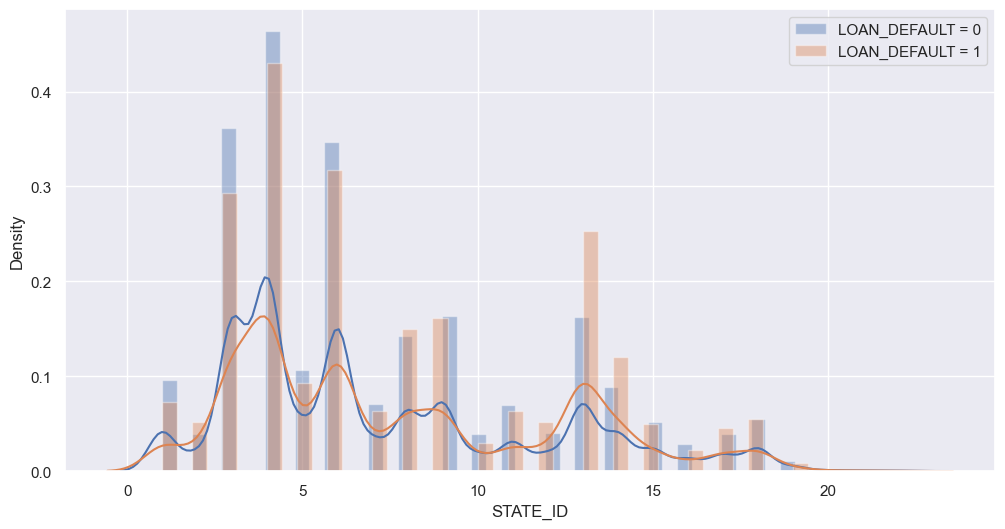

In [133]:
meee(df,'STATE_ID')

- Se ve una distribucion similar entre las dos categorias para la variable “STATE_ID"

# EMPLOYEE_CODE_ID

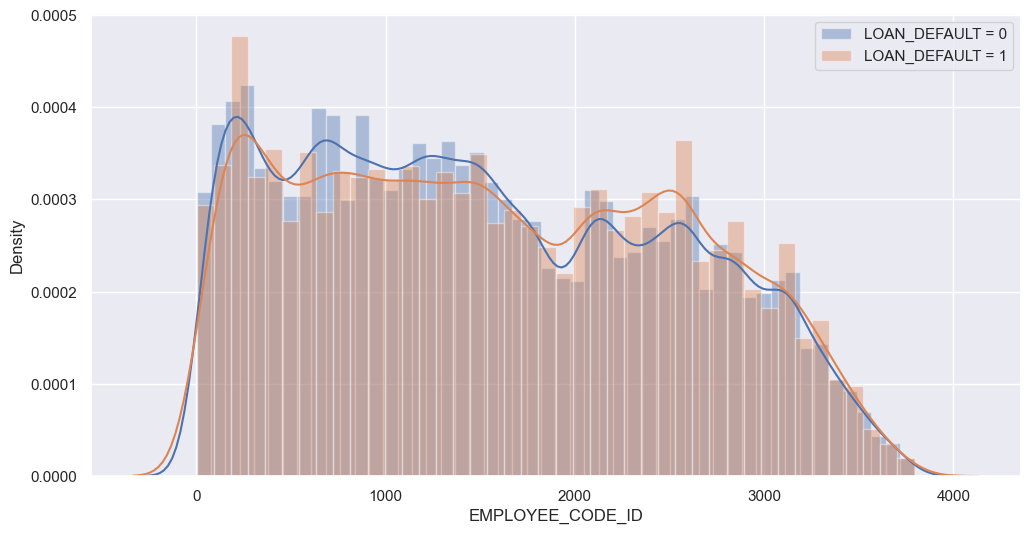

In [134]:
meee(df,'EMPLOYEE_CODE_ID')

- Se ve una distribucion similar entre las dos categorias para la variable “EMPLOYEE_CODE_ID"

# PERFORM_CNS_SCORE

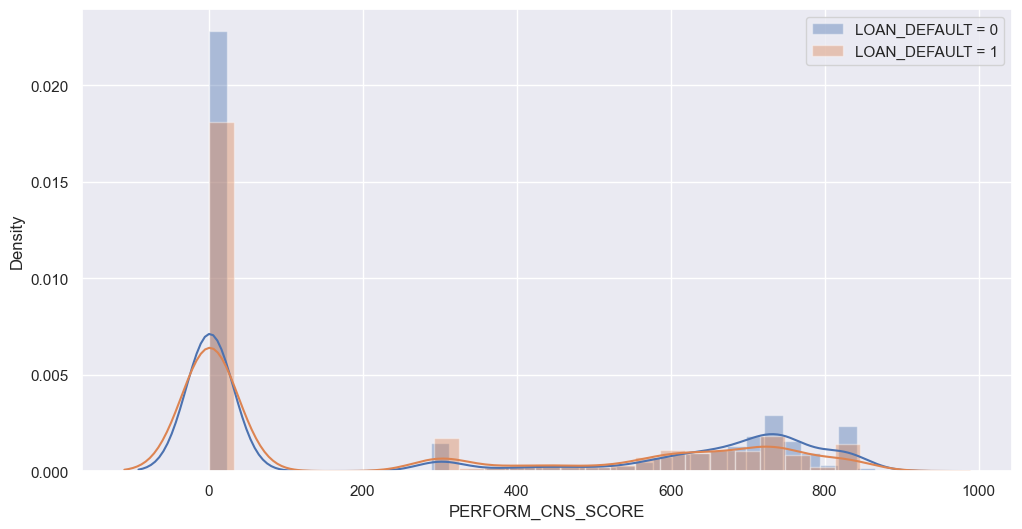

In [135]:
meee(df,'PERFORM_CNS_SCORE')

- Se ve una distribucion similar entre las dos categorias para la variable “PERFORM_CNS_SCORE"

# PRI_NO_OF_ACCTS

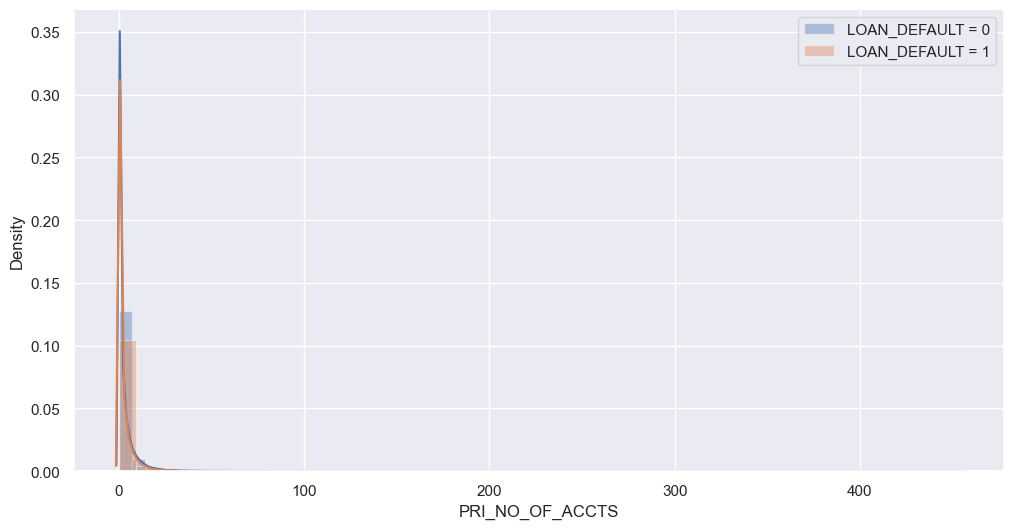

In [136]:
meee(df,'PRI_NO_OF_ACCTS')

- Se ve una distribucion similar entre las dos categorias para la variable “PRI_NO_OF_ACCTS"

# PRI_ACTIVE_ACCTS

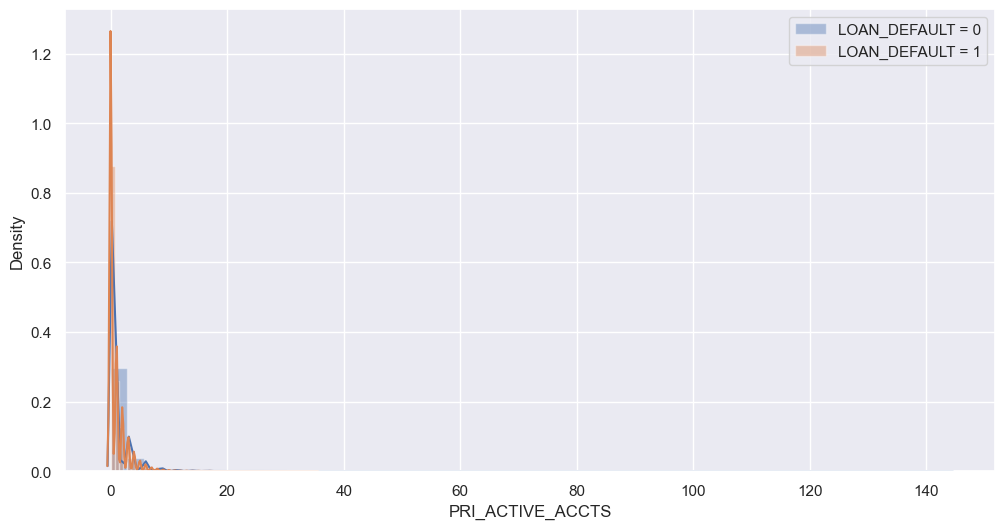

In [137]:
meee(df,'PRI_ACTIVE_ACCTS')

- Se ve una distribucion similar entre las dos categorias para la variable “PRI_ACTIVE_ACCTS"


# PRI_OVERDUE_ACCTS

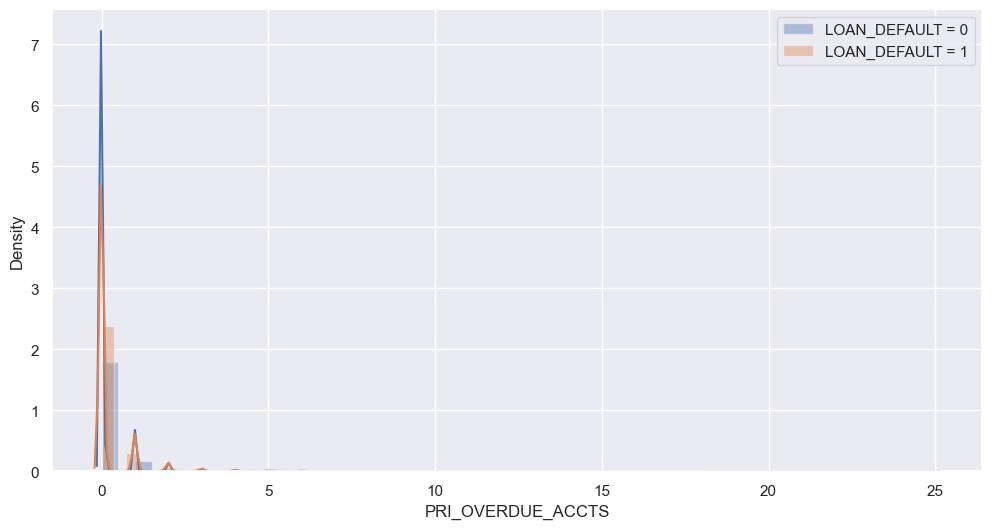

In [138]:
meee(df,'PRI_OVERDUE_ACCTS')

- Se ve una distribucion similar entre las dos categorias para la variable “PRI_OVERDUE_ACCTS"

# PRI_CURRENT_BALANCE

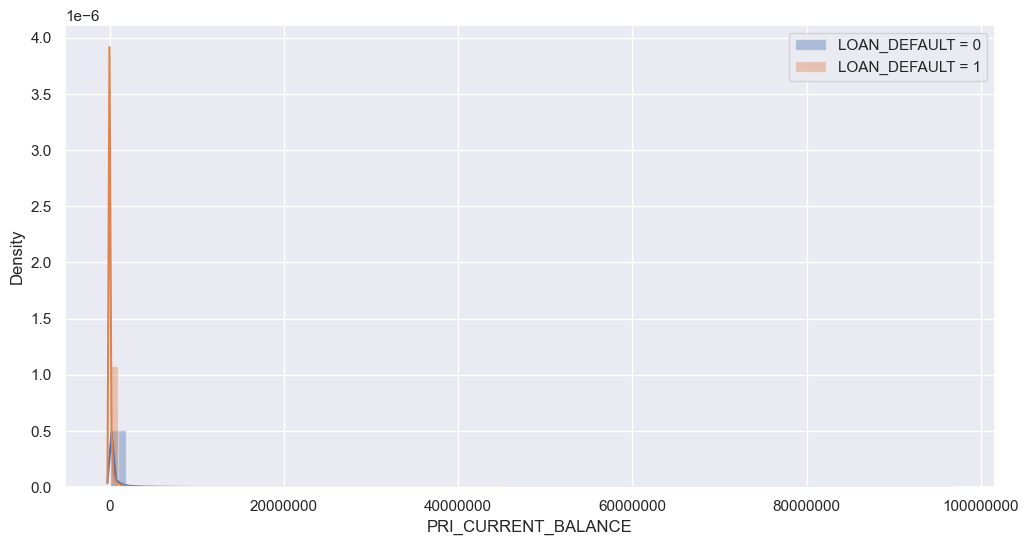

In [139]:
meee(df,'PRI_CURRENT_BALANCE')

- Se ve una distribucion similar entre las dos categorias para la variable “PRI_CURRENT_BALANCE"

# PRI_SANCTIONED_AMOUNT

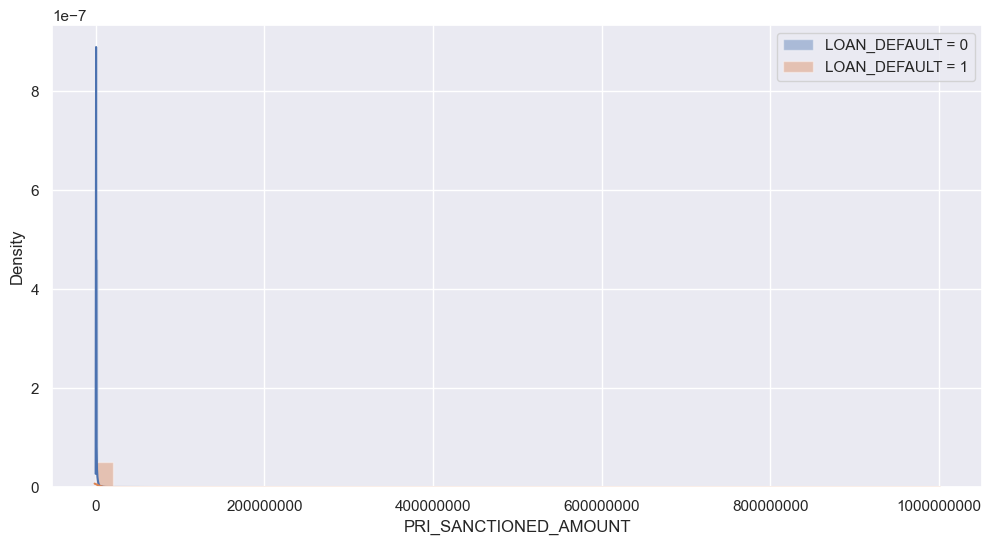

In [140]:
meee(df,'PRI_SANCTIONED_AMOUNT')

- Se ve una distribucion similar entre las dos categorias para la variable “PRI_SANCTIONED_AMOUNT"
- existe tendencia de que ambas categorias esten con tendencia al 0

# PRI_DISBURSED_AMOUNT

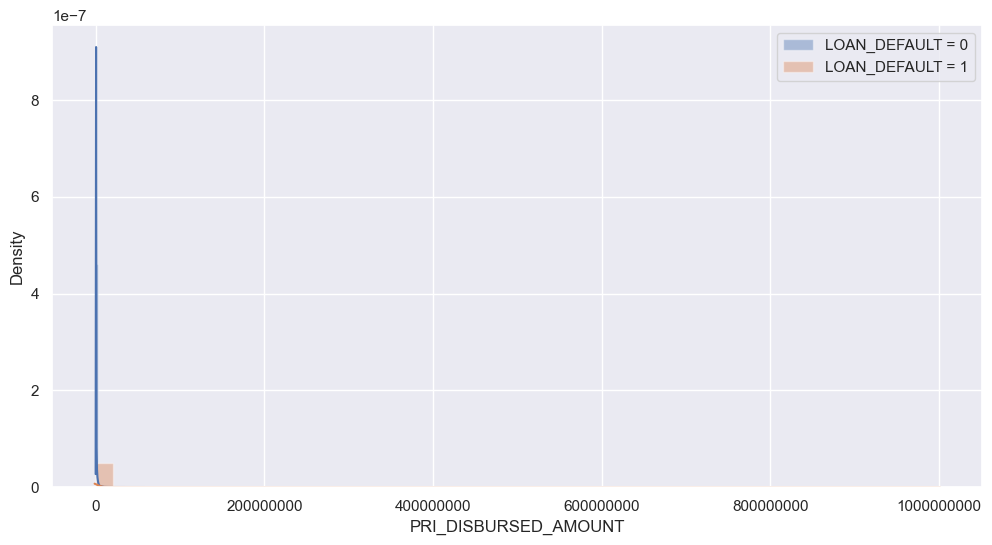

In [141]:
meee(df,'PRI_DISBURSED_AMOUNT')

- Se ve una distribucion similar entre las dos categorias para la variable “PRI_DISBURSED_AMOUNT"
- existe tendencia de que ambas categorias esten con tendencia al 0

# SEC_NO_OF_ACCTS

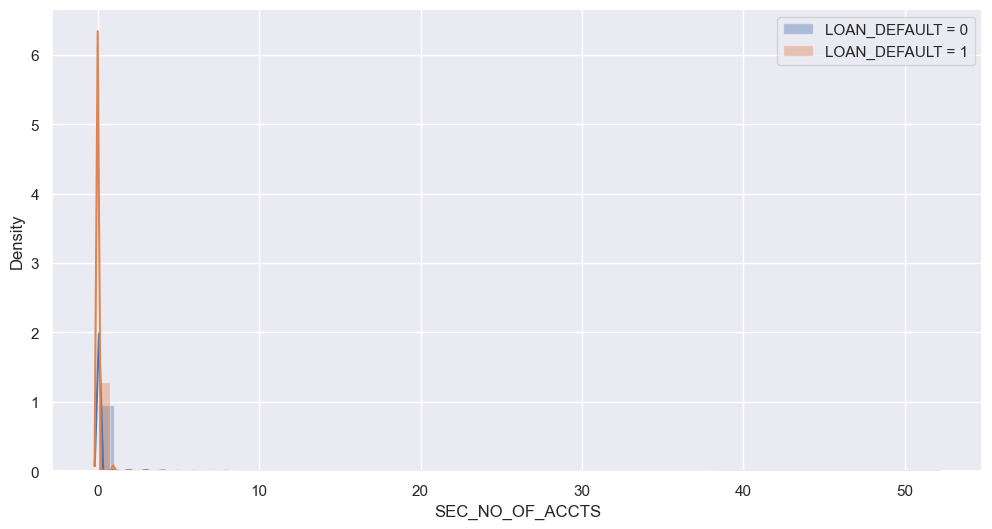

In [142]:
meee(df,'SEC_NO_OF_ACCTS')

Se ve una distribucion similar entre las dos categorias para la variable “SEC_NO_OF_ACCTS"
existe tendencia de que ambas categorias esten con tendencia al 0

# SEC_ACTIVE_ACCTS

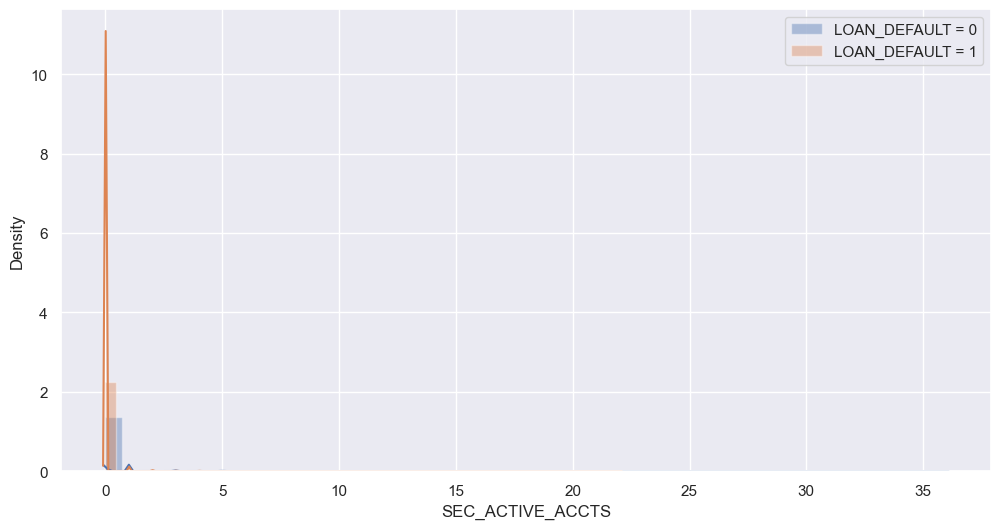

In [143]:
meee(df,'SEC_ACTIVE_ACCTS')

- Se ve una distribucion similar entre las dos categorias para la variable “SEC_ACTIVE_ACCTS"
- existe tendencia de que ambas categorias esten con tendencia al 0

# SEC_OVERDUE_ACCTS

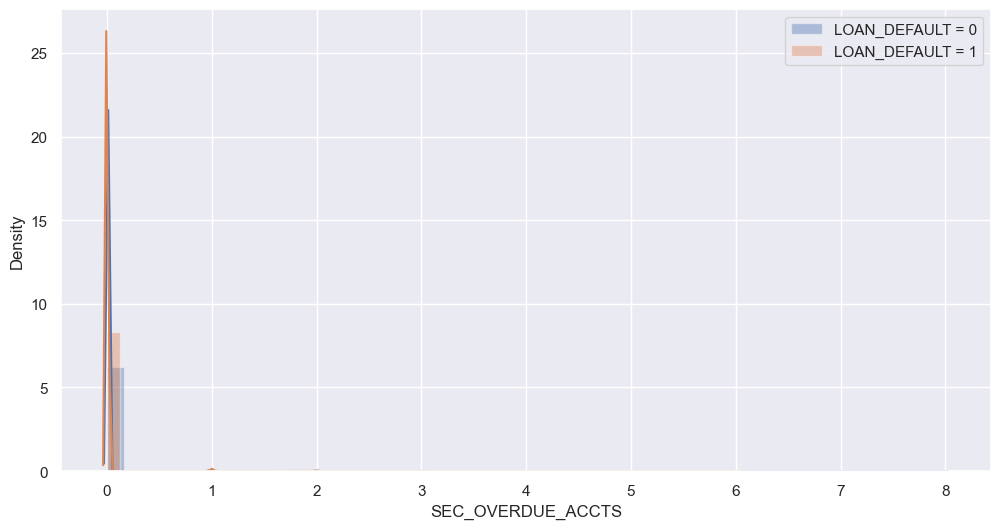

In [144]:
meee(df,'SEC_OVERDUE_ACCTS')

- Se ve una distribucion similar entre las dos categorias para la variable “SEC_OVERDUE_ACCTS"
- existe tendencia de que ambas categorias esten con tendencia al 0

# SEC_CURRENT_BALANCE

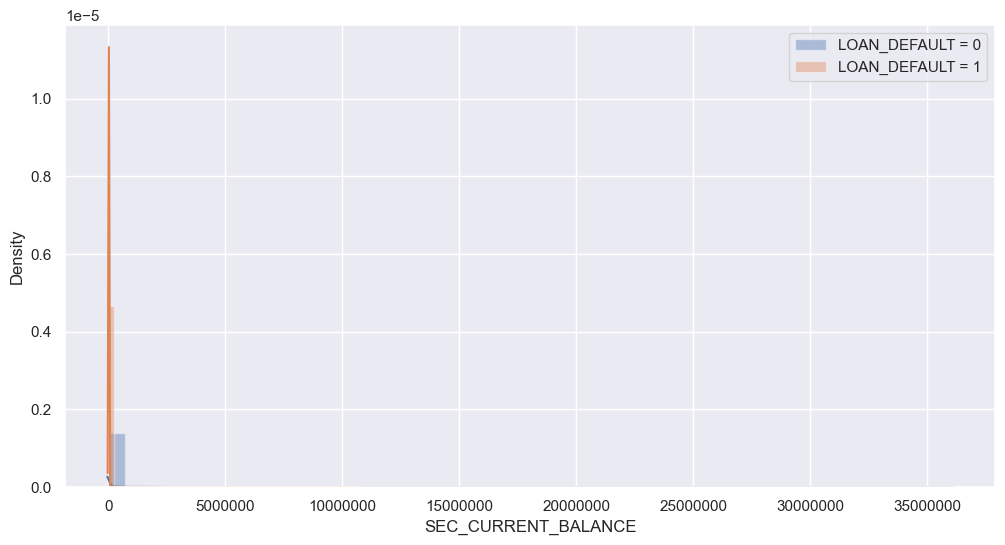

In [145]:
meee(df,'SEC_CURRENT_BALANCE')

- Se ve una distribucion similar entre las dos categorias para la variable “SEC_CURRENT_BALANCE"
- existe tendencia de que ambas categorias esten con tendencia al 0

# SEC_SANCTIONED_AMOUNT

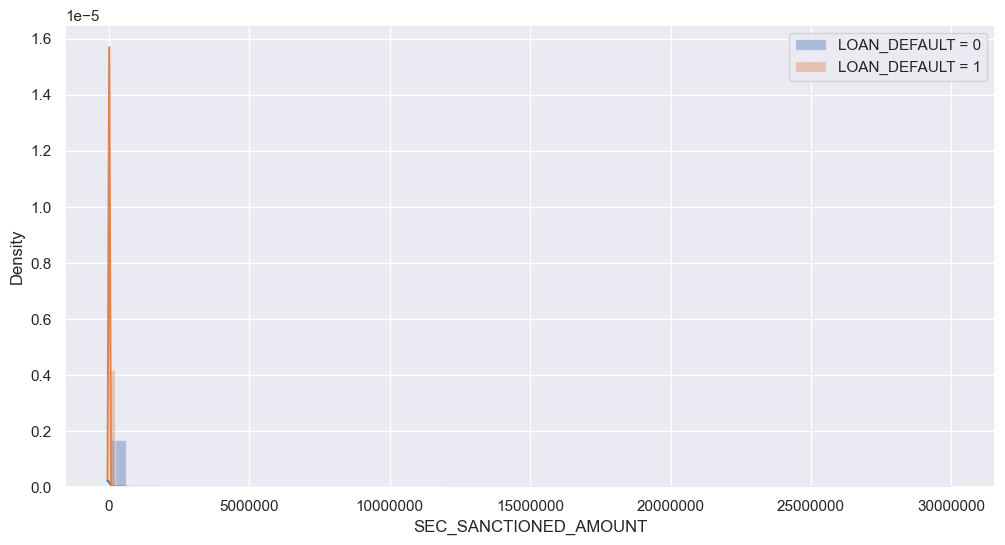

In [146]:
meee(df,'SEC_SANCTIONED_AMOUNT')

- Se ve una distribucion similar entre las dos categorias para la variable “SEC_SANCTIONED_AMOUNT"
- existe tendencia de que ambas categorias esten con tendencia al 0

# SEC_DISBURSED_AMOUNT

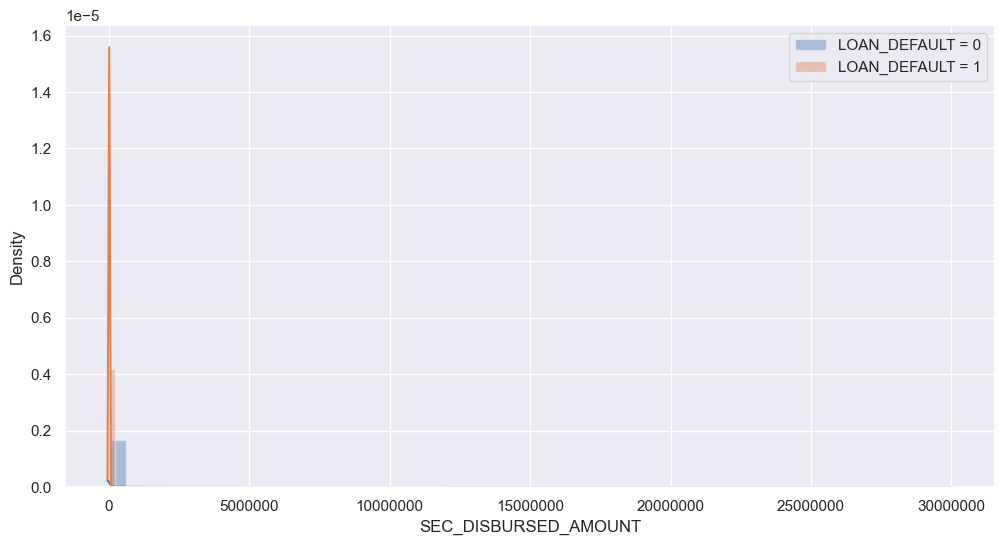

In [147]:
meee(df,'SEC_DISBURSED_AMOUNT')

- Se ve una distribucion similar entre las dos categorias para la variable “SEC_DISBURSED_AMOUNT"
- existe tendencia de que ambas categorias esten con tendencia al 0

# PRIMARY_INSTAL_AMT

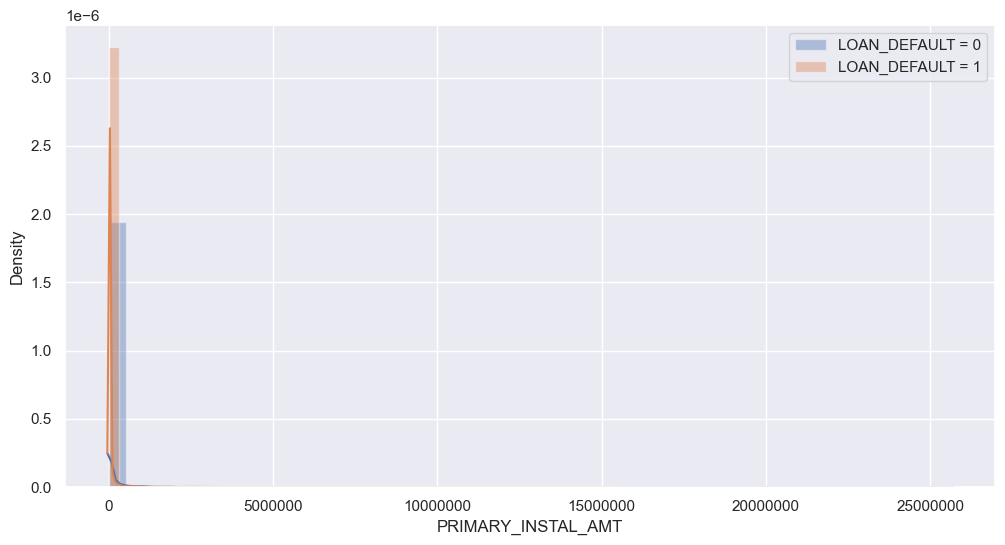

In [148]:
meee(df,'PRIMARY_INSTAL_AMT')

- Se ve una distribucion similar entre las dos categorias para la variable “PRIMARY_INSTAL_AMT"
- existe tendencia de que ambas categorias esten con tendencia al 0

# SEC_INSTAL_AMT

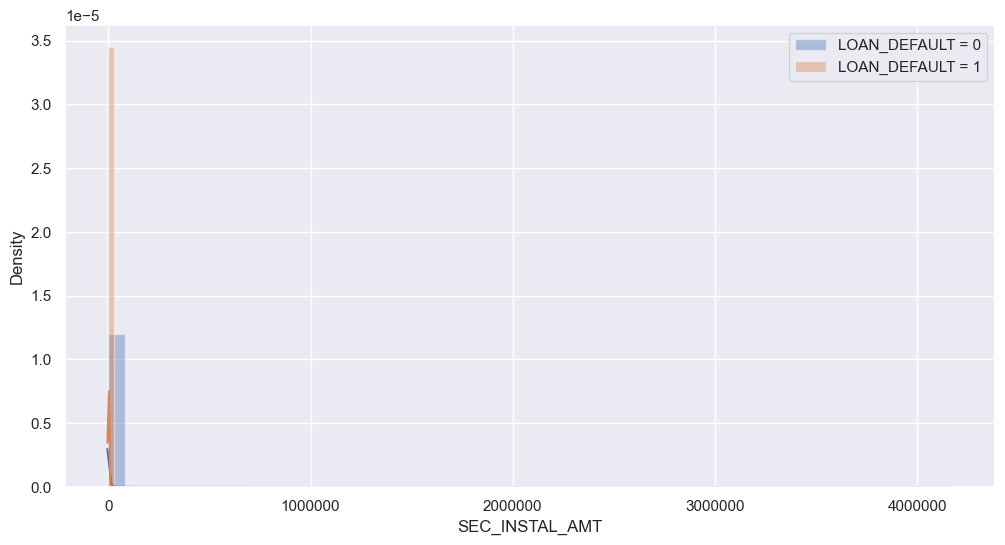

In [149]:
meee(df,'SEC_INSTAL_AMT')

- Se ve una distribucion similar entre las dos categorias para la variable “SEC_INSTAL_AMT"
- existe tendencia de que ambas categorias esten con tendencia al 0

# NEW_ACCTS_IN_LAST_SIX_MONTHS

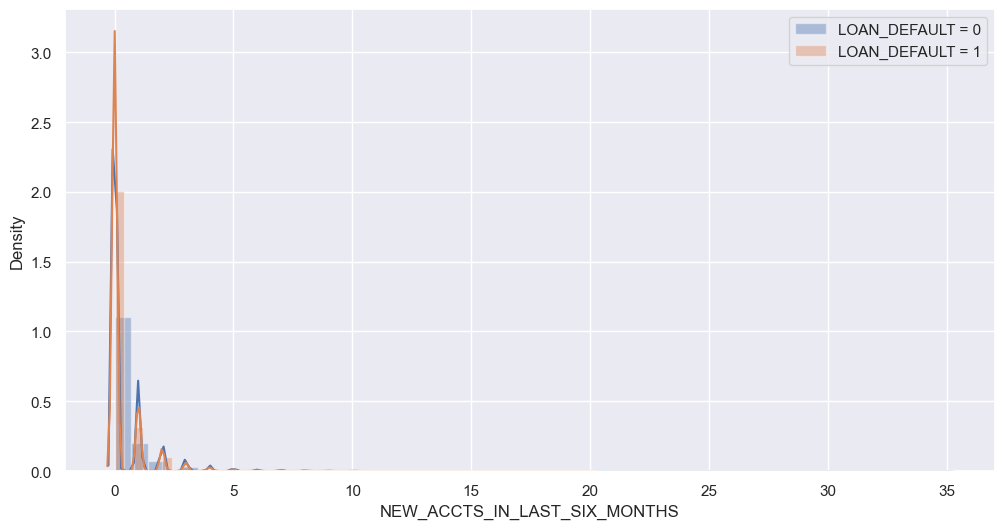

In [150]:
meee(df,'NEW_ACCTS_IN_LAST_SIX_MONTHS')

- Se ve una distribucion similar entre las dos categorias para la variable “NEW_ACCTS_IN_LAST_SIX_MONTHS"
- existe tendencia de que ambas categorias esten con tendencia al 0

# DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS

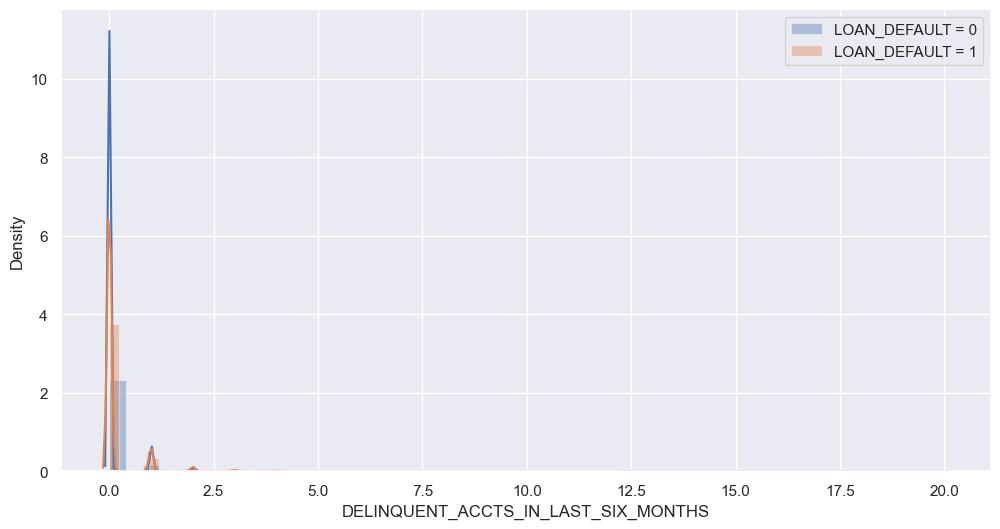

In [151]:
meee(df,'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS')

- Se ve una distribucion similar entre las dos categorias para la variable “DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS"
- existe tendencia de que ambas categorias esten con tendencia al 0

# NO_OF_INQUIRIES

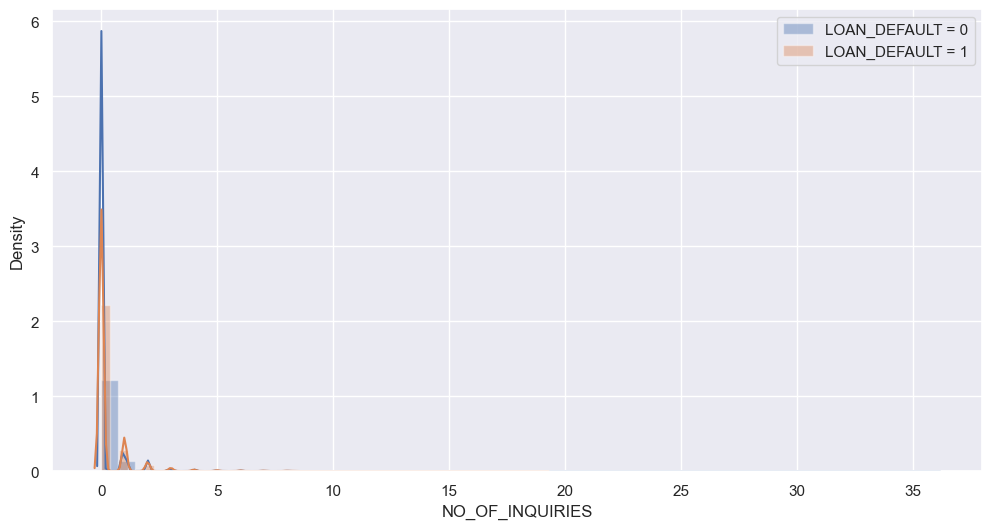

In [152]:
meee(df,'NO_OF_INQUIRIES')

- Se ve una distribucion similar entre las dos categorias para la variable “NO_OF_INQUIRIES"
- existe tendencia de que ambas categorias esten con tendencia al 0

BDT2-3 - BDT2-20 https://alkemy-labs.atlassian.net/browse/BDT2-20

# Selección y extracción de características relevantes.

Descripción

COMO DS DEVELOPER, QUIERO hacer una seleccion de variables PARA comenzar a trabajar en el proceso de modelado.

Criterios de aceptación:

- Realizar una matriz de correlacion para determinar que variables son las mas relavantes.
- Documentar que variables van a formar parte del modelo.
- Justificar la seleccion de las features

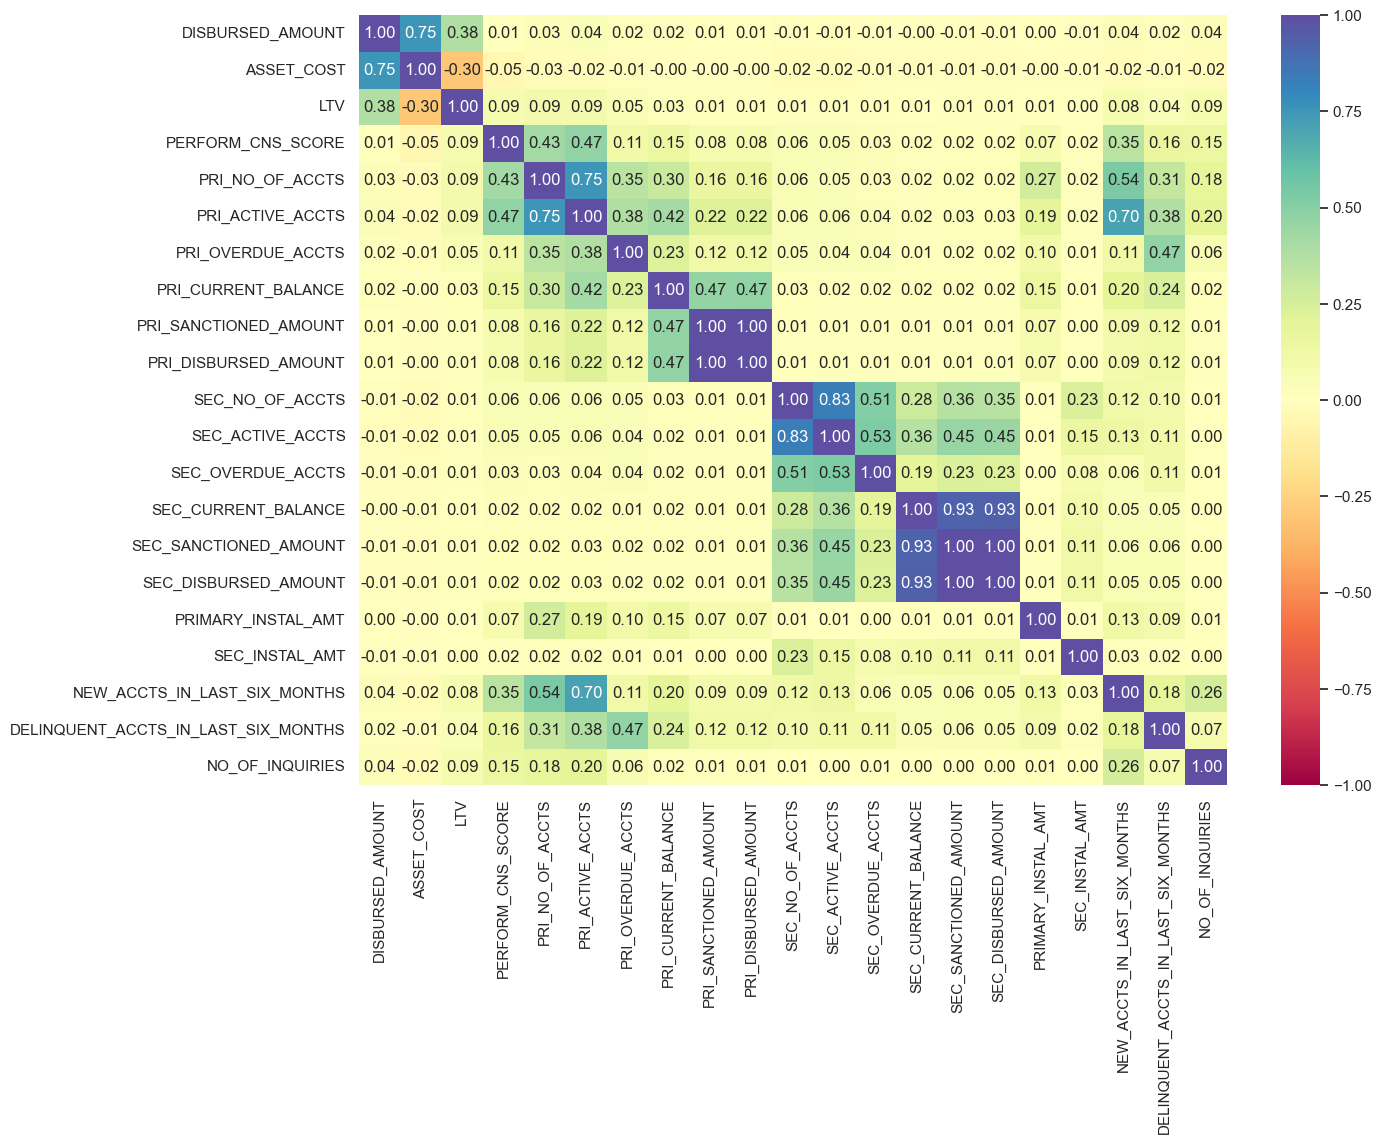

In [153]:
coso = ['DISBURSED_AMOUNT',
        'ASSET_COST',
        'LTV',
        'PERFORM_CNS_SCORE',
        'PRI_NO_OF_ACCTS',
        'PRI_ACTIVE_ACCTS',
        'PRI_OVERDUE_ACCTS',
        'PRI_CURRENT_BALANCE',
        'PRI_SANCTIONED_AMOUNT',
        'PRI_DISBURSED_AMOUNT',
        'SEC_NO_OF_ACCTS',
        'SEC_ACTIVE_ACCTS',
        'SEC_OVERDUE_ACCTS',
        'SEC_CURRENT_BALANCE',
        'SEC_SANCTIONED_AMOUNT',
        'SEC_DISBURSED_AMOUNT',
        'PRIMARY_INSTAL_AMT',
        'SEC_INSTAL_AMT',
        'NEW_ACCTS_IN_LAST_SIX_MONTHS',
        'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
        'NO_OF_INQUIRIES']

plt.figure(figsize=(14, 10))
sns.heatmap(df[coso].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- La variable DISBURSED_AMOUNT posee una fuerte correlacion positiva (0.75) con ASSET_COST y tambien posee correlacion con la variable LTV (0.38).
- La variable PRI_ACTIVE_ACCTS tiene una fuerte correlacion positiva (0.75) con PRI_NO_OF_ACCTS y con la variable PERFORM_CNS_SCORE (0.47).
- La variable PRI_DISBURSED_AMOUNT tiene una fuerte correlacion positiva (1.00) con PRI_SANCTIONED_AMOUNT y con la variable PRI_CURRENT_BALANCE (0.47).
- La variable SEC_DISBURSED_AMOUNT tiene una fuerte correlacion positiva (1.00) con SEC_SANCTIONED_AMOUNT, con la variable SEC_CURRENT_BALANCE (0.93), con la variable SEC_ACTIVE_ACCTS (0.45) y con la variable SEC_NO_OF_ACCTS (0.35)
- La variable SEC_SANCTIONED_AMOUNT tiene una fuerte correlacion positiva (0.93) con SEC_CURRENT_BALANCE, con la variable SEC_ACTIVE_ACCTS (0.45) y con la variable SEC_NO_OF_ACCTS (0.35).
- La variable SEC_NO_OF_ACCTS tiene una fuerte correlacion positiva (0.83) con SEC_ACTIVE_ACCTS, con la variable SEC_OVERDUE_ACCTS (0.51), con la variable SEC_SANCTIONED_AMOUNT (0.36) y con la variable SEC_DISBURSED_AMOUNT (0.35).
- La variable NEW_ACCTS_IN_LAST_SIX_MONTHS tiene una fuerte correlacion positiva (0.70) con PRI_ACTIVE_ACCTS, con la variable PRI_NO_OF_ACCTS (0.54) y con la variable PERFORM_CNS_SCORE (0.35).
- La variable SEC_ACTIVE_ACCTS tiene correlacion positiva (0.53) con SEC_OVERDUE_ACCTS y con la variable SEC_CURRENT_BALANCE (0.36).
- La variable PRI_SANCTIONED_AMOUNT posee correlacion positiva (0.47) con PRI_CURRENT_BALANCE.
- La variable DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS tiene correlacion positiva (0.47) con PRI_OVERDUE_ACCTS y con la variable PRI_NO_OF_ACCTS (0.31).
- La variable PRI_NO_OF_ACCTS tiene correlacion positiva (0.43) con PERFORM_CNS_SCORE y con la variable PRI_OVERDUE_ACCTS (0.35).

Variables a eliminar
- DISBURSED_AMOUNT
- PRI_ACTIVE_ACCTS
- PRI_DISBURSED_AMOUNT
- SEC_DISBURSED_AMOUNT
- SEC_SANCTIONED_AMOUNT
- SEC_NO_OF_ACCTS
- NEW_ACCTS_IN_LAST_SIX_MONTHS
- SEC_ACTIVE_ACCTS
- PRI_SANCTIONED_AMOUNT
- DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
- PRI_NO_OF_ACCTS

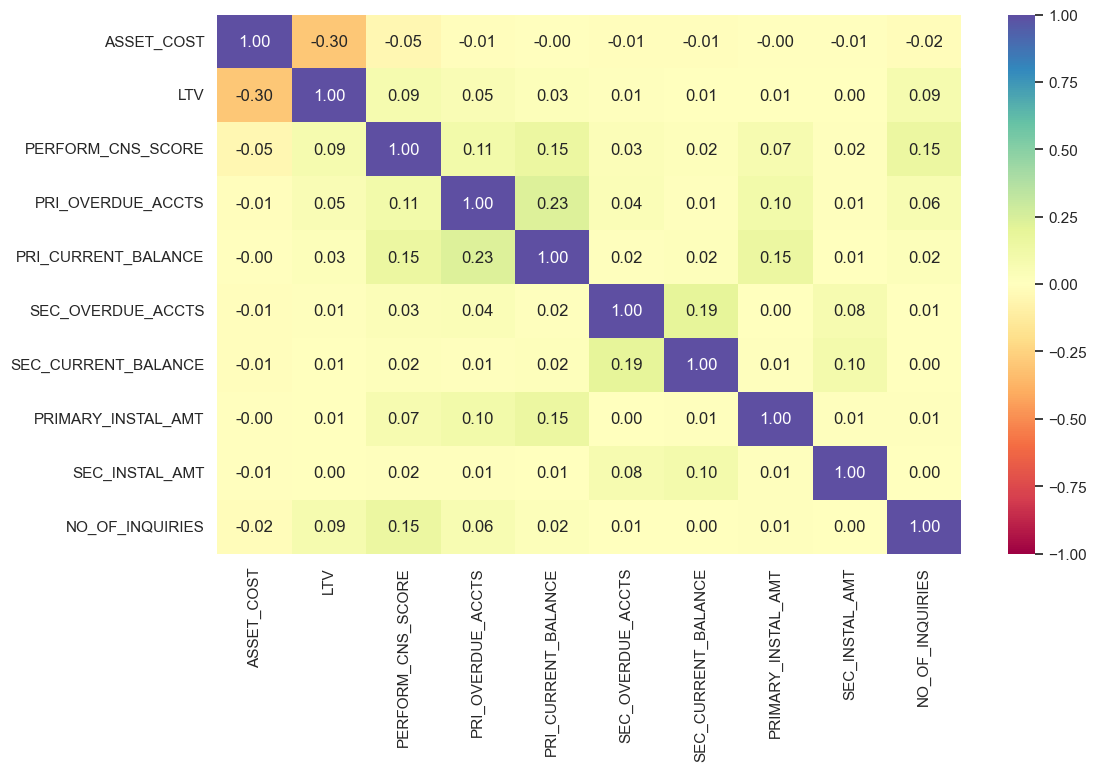

In [154]:
coso = ['ASSET_COST',
        'LTV',
        'PERFORM_CNS_SCORE',
        'PRI_OVERDUE_ACCTS',
        'PRI_CURRENT_BALANCE',
        'SEC_OVERDUE_ACCTS',
        'SEC_CURRENT_BALANCE',
        'PRIMARY_INSTAL_AMT',
        'SEC_INSTAL_AMT',
        'NO_OF_INQUIRIES']

plt.figure(figsize=(12, 7))
sns.heatmap(df[coso].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Las variables que entrarian a formar parte del modelo son las siguientes:

- 'ASSET_COST',
- 'LTV',
- 'DATE_OF_BIRTH',
- 'PERFORM_CNS_SCORE',
- 'PERFORM_CNS_SCORE_DESCRIPTION',
- 'PRI_OVERDUE_ACCTS',
- 'PRI_CURRENT_BALANCE',
- 'SEC_OVERDUE_ACCTS',
- 'SEC_CURRENT_BALANCE',
- 'PRIMARY_INSTAL_AMT',
- 'SEC_INSTAL_AMT',
- 'AVERAGE_ACCT_AGE',
- 'CREDIT_HISTORY_LENGTH',
- 'NO_OF_INQUIRIES',
- 'LOAN_DEFAULT'

Esto debido a que en los analisis anteriores son los que han mostrado por un lado, un comportamiento distinto entre las distintas categorias de la variable respuesta y que a su vez tambien representan un conjunto de datos que no impone problemas de intercolinealidad.

BDT2-4 - BDT2-21 https://alkemy-labs.atlassian.net/browse/BDT2-21

# Construcción de conjuntos de entrenamiento y prueba.
Descripción

COMO DS DEVELOPER, QUIERO hacer un split (70-30 o 80-20) PARA comenzar a realizar un preprocesamiento sobre el dataset de train

Criterios de aceptación:

- Utilizar la libreria scikit learn para hacer el split de datos
- Describir como es la distribucion del target
- Definir y documentar si se va utilizar el split stratified = True
- Utilizar un numero random fijo, para que los resultados sean reproducibles

In [155]:
meee =['ASSET_COST',
        'LTV',
        'DATE_OF_BIRTH',
        'PERFORM_CNS_SCORE',
        'PERFORM_CNS_SCORE_DESCRIPTION',
        'PRI_OVERDUE_ACCTS',
        'PRI_CURRENT_BALANCE',
        'SEC_OVERDUE_ACCTS',
        'SEC_CURRENT_BALANCE',
        'PRIMARY_INSTAL_AMT',
        'SEC_INSTAL_AMT',
        'AVERAGE_ACCT_AGE',
        'CREDIT_HISTORY_LENGTH',
        'NO_OF_INQUIRIES',
        'LOAN_DEFAULT']

df_final = df[meee]
df_final

ASSET_COST   LTV DATE_OF_BIRTH  PERFORM_CNS_SCORE  \
0            58400 89.55    1984-01-01                  0   
1            65550 73.23    1985-07-31                598   
2            61360 89.63    1985-08-24                  0   
3            66113 88.48    1993-12-30                305   
4            60300 88.39    1977-09-12                  0   
...            ...   ...           ...                ...   
233149      105405 60.72    1988-01-08                735   
233150      100600 74.95    1988-05-12                825   
233151       71212 48.45    1976-01-06                  0   
233152       73286 49.10    1994-03-26                  0   
233153      116009 66.81    1984-02-18                  0   

       PERFORM_CNS_SCORE_DESCRIPTION  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  \
0        No Bureau History Available                  0                    0   
1                      I-Medium Risk                  1                27600   
2        No Bureau History Available                  0                    0   
3                   L-Very High Risk                  0                    0   
4        No Bureau History Available                  0                    0   
...                              ...                ...                  ...   
233149               D-Very Low Risk                  0               390443   
233150               A-Very Low Risk                  0                    0   
233151   No Bureau History Available                  0                    0   
233152   No Bureau History Available                  0                    0   
233153   No Bureau History Available                  0                    0   

        SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  PRIMARY_INSTAL_AMT  \
0                       0                    0                   0   
1                       0                    0                1991   
2                       0                    0                   0   
3                       0                    0                  31   
4                       0                    0                   0   
...                   ...                  ...                 ...   
233149                  0                    0                4084   
233150                  0                    0                1565   
233151                  0                    0                   0   
233152                  0                    0                   0   
233153                  0                    0                   0   

        SEC_INSTAL_AMT AVERAGE_ACCT_AGE CREDIT_HISTORY_LENGTH  \
0                    0        0yrs 0mon             0yrs 0mon   
1                    0       1yrs 11mon            1yrs 11mon   
2                    0        0yrs 0mon             0yrs 0mon   
3                    0        0yrs 8mon             1yrs 3mon   
4                    0        0yrs 0mon             0yrs 0mon   
...                ...              ...                   ...   
233149               0        1yrs 9mon             3yrs 3mon   
233150               0        0yrs 6mon             0yrs 6mon   
233151               0        0yrs 0mon             0yrs 0mon   
233152               0        0yrs 0mon             0yrs 0mon   
233153               0        0yrs 0mon             0yrs 0mon   

        NO_OF_INQUIRIES LOAN_DEFAULT  
0                     0            0  
1                     0            1  
2                     0            0  
3                     1            1  
4                     1            1  
...                 ...          ...  
233149                0            0  
233150                0            0  
233151                0            0  
233152                0            0  
233153                0            0  

[232645 rows x 15 columns]

In [156]:
X = df_final.drop(["LOAN_DEFAULT"], axis=1)
Y = df_final["LOAN_DEFAULT"]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)


In [158]:
print("Training set : ", X_train.shape)
print("test set : ", X_test.shape)
print("Porcentaje de las clases en training set:")
print(y_train.value_counts(normalize=True))
print("Porcentaje de las clases en test set:")
print(y_test.value_counts(normalize=True))

Training set :  (162851, 14)
test set :  (69794, 14)
Porcentaje de las clases en training set:
0   0.78
1   0.22
Name: LOAN_DEFAULT, dtype: float64
Porcentaje de las clases en test set:
0   0.78
1   0.22
Name: LOAN_DEFAULT, dtype: float64


- La distribucion de la variable target no esta balanceada, tomando una fuerte tendencia a tener mayores valores 0 que 1.

BDT2-4 - BDT2-22 https://alkemy-labs.atlassian.net/browse/BDT2-22

# Normalización de datos. I

Descripción

COMO DS DEVELOPER, QUIERO normalizar o estandarizar los datos PARA prepararlos adecuadamente para el proceso de modelado.

Criterios de aceptación:

- Documentar los métodos de normalización utilizado y justificar por qué se eligió esa técnica en particular.
- Aplicar esos metodos en el conjunto de train

- Tenemos valores muy distintos en rangos por ejemplo LTV tiene tiene valores que van hasta 95, mientras que PRI_CURRENT_BALANCE tiene montos que superan los 50.000.000 por lo que se opta por una estandarizacion que permita medir estas variables en una misma escala.
- Para la estandarizacion se utilizara la formula para trasformar los valores en una distribucion normal estandar.

In [159]:
columnas_a_normalizar = ['ASSET_COST',
                         'LTV',
                         'PERFORM_CNS_SCORE',
                         'PRI_CURRENT_BALANCE',
                         'SEC_CURRENT_BALANCE',
                         'PRIMARY_INSTAL_AMT',
                         'SEC_INSTAL_AMT',
                         'NO_OF_INQUIRIES']

df_final[columnas_a_normalizar] = (df_final[columnas_a_normalizar] - df_final[columnas_a_normalizar].mean()) / df_final[columnas_a_normalizar].std()

BDT2-4 - BDT2-23https://alkemy-labs.atlassian.net/browse/BDT2-23

# Normalización de datos. II
Descripción

COMO DS DEVELOPER, QUIERO normalizar o estandarizar los datos PARA prepararlos adecuadamente para el proceso de modelado.

Criterios de aceptación:

- Realizar un pipeline que incluya todos los pasos de normalizacion durante el procesamiento de los datos.
- Utilizar la alternativa que nos provee la libreria scikit learn

In [160]:
pipeline = Pipeline([
        ('scaler', StandardScaler())
])
X_train[columnas_a_normalizar] = pipeline.fit_transform(X_train[columnas_a_normalizar])